# **Import các thư viện**

In [ ]:
import numpy as np
from IPython import display
import math
import matplotlib
import matplotlib.pyplot as plt
import seaborn
import random
from matplotlib import cm 
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from time import sleep
import plotly.graph_objects as go

# **Khai báo hàm**
- Chi tiết các hàm optimization: https://www.sfu.ca/~ssurjano/optimization.html

In [ ]:
# Sphere
def Sphere_f(x):
    f = 0
    for i in x:
        f += i**2
    return f

# Rastrigin
def Rastrigin_f(x):
  f = 10 * len(x)
  for i in x:
    f += i**2 - 10 * np.cos(2 * np.pi * i)
  return f

# Rosenbrock
def Rosenbrock_f(x):
    f = 0
    for i in range(len(x) - 1):
        f += (100*((x[i + 1] - x[i]**2)**2) + (1 -x[i])**2)
    return f

# Griewank
def Griewank_f(x):
    f1 = 0
    for i in x:
        f1 += (i*i)/4000
    f2 = 1
    for i in range(len(x)):
        f2 *= np.cos(x[i]/math.sqrt(i+1))
    return f1 - f2 + 1

# Ackley
def Ackley_f(x):
    a = 20
    b = 0.2
    c = 2 * np.pi
    f1 = 0
    f2 = 0
    for i in range(len(x)):
        f1 += x[i] ** 2
        f2 += np.cos(c * x[i])
    p1 = -a * np.exp(-b * np.sqrt(f1 / len(x)))
    p2 = -np.exp(f2 / len(x))

    return p1 + p2 + a + np.exp(1)

# **Differential Evolution (DE)**

In [ ]:
def DE(fobj, dimension, bounds, F_scale, cross_prob, popsize, max_evals):

    lower_bound, upper_bound = np.asarray(bounds).T

    eps = 0.00001

    diff = np.fabs(lower_bound - upper_bound)

    pop = lower_bound + diff * np.random.rand(popsize, dimension)

    fitness = np.asarray([fobj(ind) for ind in pop])
    num_eval = 1
    
    best_idx = np.argmin(fitness)
    best = pop[best_idx]

    results = []
    all_pops = []
    results.append((np.copy(best), fitness[best_idx], num_eval))
    all_pops.append(np.copy(pop))
    generation_count = 0
    
    while True:
        if num_eval > max_evals:
            break
        for i in range(popsize):

            idxes = [idx for idx in range(popsize) if idx != i]
            a, b, c = pop[np.random.choice(idxes, 3, replace=False)]
            mutant = np.clip(F_scale*(b - c) + a, lower_bound, upper_bound)

            cross_points = np.random.rand(dimension) < cross_prob
            if not np.any(cross_points):
                cross_points[np.random.randint(0, dimension)] = True
            
            trial = np.where(cross_points, mutant, pop[i])

            f = fobj(trial)
            num_eval += 1

            if f < fitness[i]:
                pop[i] = trial
                fitness[i] = f 
                if f < fitness[best_idx]:
                    best = trial
                    best_idx = i

        results.append((np.copy(best), fitness[best_idx], num_eval))
        all_pops.append(np.copy(pop))

        if fobj(best) < eps:
            num_eval += 1
            break

        generation_count += 1

    return results, all_pops, generation_count

In [ ]:
F_scale=0.8 # hệ số scale F (0,1)
cross_prob=0.7 # xác suất hai cá thể đem đi lai ghép

# **Test**

## **Hàm Sphere**

### **dimensions (d=2)**

#### **popsize = 32**

In [ ]:
all_results = []

dimension = 2
max_evals = 1e5
fobj = Sphere_f
seed_number = 18520186
popsize = 32 # kích thước quần thể
lower_bound = -6
upper_bound = 6

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([-0.00013808, -0.00066416]), 4.6017471666543954e-07, 961),
 (array([-0.00186555,  0.00195324]), 7.295419053955385e-06, 929),
 (array([-0.00068232, -0.00102182]), 1.5096760243497293e-06, 929),
 (array([-0.00064442,  0.0003602 ]), 5.450289292373942e-07, 801),
 (array([-0.00040764, -0.00290922]), 8.629738358067944e-06, 865),
 (array([ 0.00024483, -0.00050041]), 3.1035243192260147e-07, 897),
 (array([0.0006802 , 0.00272828]), 7.906199007542689e-06, 865),
 (array([-0.00179503,  0.00201719]), 7.291204443247526e-06, 897),
 (array([-0.00053932, -0.00131369]), 2.016656225766411e-06, 737),
 (array([ 0.00098328, -0.0006613 ]), 1.40415372790019e-06, 801)]

In [ ]:
print(f"Giá trị trung bình (mean) của Sphere (d=2, n=32) trong DE: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Sphere (d=2, n=32) trong DE: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Sphere (d=2, n=32) trong DE: 3.7368602918655307e-06
Độ lệch chuẩn (std) của Sphere (d=2, n=32) trong DE: 3.3562885384151856e-06


#### **popsize = 64**

In [ ]:
all_results = []

dimension = 2
max_evals = 1e5
fobj = Sphere_f
seed_number = 18520186
popsize = 64 # kích thước quần thể
lower_bound = -6
upper_bound = 6

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([-0.0011279 ,  0.00151176]), 3.5575772015146134e-06, 1793),
 (array([ 0.00182405, -0.00036262]), 3.4586665250141116e-06, 1729),
 (array([0.00097777, 0.00260554]), 7.744896312742487e-06, 1729),
 (array([-0.00259286,  0.00033133]), 6.832724942924115e-06, 1857),
 (array([-0.00060255, -0.00167075]), 3.154464245248991e-06, 1409),
 (array([-0.00092846,  0.00099015]), 1.8424299069984712e-06, 1473),
 (array([ 0.00258728, -0.00161382]), 9.298437995789597e-06, 1601),
 (array([-0.00076413, -0.00010027]), 5.939533248176275e-07, 1537),
 (array([ 0.00050291, -0.00122509]), 1.753761830809947e-06, 1217),
 (array([-0.00234716, -0.00127698]), 7.139836251175801e-06, 1409)]

In [ ]:
print(f"Giá trị trung bình (mean) của Sphere (d=2, n=64) trong DE: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Sphere (d=2, n=64) trong DE: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Sphere (d=2, n=64) trong DE: 4.537674853703576e-06
Độ lệch chuẩn (std) của Sphere (d=2, n=64) trong DE: 2.8212623511579665e-06


#### **popsize = 128**

In [ ]:
all_results = []

dimension = 2
max_evals = 1e5
fobj = Sphere_f
seed_number = 18520186
popsize = 128 # kích thước quần thể
lower_bound = -6
upper_bound = 6

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([-0.00117948,  0.00170662]), 4.303732231366768e-06, 2561),
 (array([0.00131669, 0.00096606]), 2.6669485115578124e-06, 2177),
 (array([0.00014856, 0.00021365]), 6.771772748785838e-08, 3073),
 (array([-0.00138975, -0.00245967]), 7.981377617184673e-06, 2049),
 (array([-0.00188083,  0.00150599]), 5.80553829462627e-06, 2433),
 (array([0.00246702, 0.00031918]), 6.188042818334598e-06, 3201),
 (array([-3.52427407e-05, -9.59570551e-04]), 9.220176921891985e-07, 3329),
 (array([ 7.52059941e-05, -6.39922570e-04]), 4.1515683666021864e-07, 3073),
 (array([-0.00124608, -0.00265168]), 8.584136518959085e-06, 2817),
 (array([ 0.00068377, -0.00258292]), 7.139012904040008e-06, 3201)]

In [ ]:
print(f"Giá trị trung bình (mean) của Sphere (d=2, n=128) trong DE: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Sphere (d=2, n=128) trong DE: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Sphere (d=2, n=128) trong DE: 4.407368115240649e-06
Độ lệch chuẩn (std) của Sphere (d=2, n=128) trong DE: 3.0457230416560524e-06


#### **popsize = 256**

In [ ]:
all_results = []

dimension = 2
max_evals = 1e5
fobj = Sphere_f
seed_number = 18520186
popsize = 256 # kích thước quần thể
lower_bound = -6
upper_bound = 6

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([ 0.00127116, -0.00087608]), 2.383348861632425e-06, 5889),
 (array([-0.00139487,  0.00270939]), 9.286446153533977e-06, 4353),
 (array([-0.00051413, -0.00297701]), 9.126939163303662e-06, 6145),
 (array([-0.00236755, -0.0020196 ]), 9.68409011241847e-06, 6657),
 (array([-0.00142401,  0.00178457]), 5.212498083855485e-06, 5633),
 (array([-0.00153174, -0.00128486]), 3.9970760327259315e-06, 5633),
 (array([ 0.00041204, -0.00120259]), 1.6159962723930782e-06, 5633),
 (array([-0.00106419,  0.00222308]), 6.074566986406215e-06, 6145),
 (array([-0.00158779,  0.00221408]), 7.4232325503171665e-06, 5377),
 (array([0.00071887, 0.00084724]), 1.2345875958337358e-06, 5377)]

In [ ]:
print(f"Giá trị trung bình (mean) của Sphere (d=2, n=256) trong DE: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Sphere (d=2, n=256) trong DE: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Sphere (d=2, n=256) trong DE: 5.6038781812420144e-06
Độ lệch chuẩn (std) của Sphere (d=2, n=256) trong DE: 3.070076484242753e-06


#### **popsize = 512**

In [ ]:
all_results = []

dimension = 2
max_evals = 1e5
fobj = Sphere_f
seed_number = 18520186
popsize = 512 # kích thước quần thể
lower_bound = -6
upper_bound = 6

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([-0.00130194,  0.00226092]), 6.80678200904191e-06, 10241),
 (array([ 0.00114275, -0.00015453]), 1.329748862622215e-06, 12289),
 (array([1.15231442e-03, 8.11401538e-05]), 1.3344122516349888e-06, 8705),
 (array([-0.00017015,  0.000605  ]), 3.9497174127273403e-07, 9729),
 (array([0.00061793, 0.00189044]), 3.955602015324891e-06, 12801),
 (array([-0.0016372 , -0.00131032]), 4.397352340934295e-06, 10753),
 (array([ 0.00181847, -0.00068954]), 3.782298971613089e-06, 10753),
 (array([0.00040129, 0.00072919]), 6.927551534236612e-07, 11265),
 (array([ 0.00241663, -0.00177635]), 8.995508934919816e-06, 10241),
 (array([0.0024127 , 0.00201691]), 9.889061936638872e-06, 11265)]

In [ ]:
print(f"Giá trị trung bình (mean) của Sphere (d=2, n=512) trong DE: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Sphere (d=2, n=512) trong DE: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Sphere (d=2, n=512) trong DE: 4.157849421742646e-06
Độ lệch chuẩn (std) của Sphere (d=2, n=512) trong DE: 3.250261082793931e-06


#### **popsize = 1024**

In [ ]:
all_results = []

dimension = 2
max_evals = 1e5
fobj = Sphere_f
seed_number = 18520186
popsize = 1024 # kích thước quần thể
lower_bound = -6
upper_bound = 6

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([ 0.00060232, -0.00298763]), 9.28874515740287e-06, 21505),
 (array([-0.00118853, -0.00216007]), 6.078505390929283e-06, 17409),
 (array([ 0.0020498, -0.0003263]), 4.3081343084962095e-06, 19457),
 (array([-0.00122364, -0.00075478]), 2.0669759586172754e-06, 19457),
 (array([ 0.00136913, -0.00127783]), 3.5073859952312817e-06, 18433),
 (array([-0.00069714,  0.00150322]), 2.745690938537461e-06, 21505),
 (array([0.00115277, 0.00061639]), 1.7088180965654312e-06, 20481),
 (array([-0.00152722, -0.00088206]), 3.1104330088206375e-06, 23553),
 (array([0.00238205, 0.00028829]), 5.757285607365951e-06, 18433),
 (array([ 0.00292889, -0.0003045 ]), 8.671103750042995e-06, 18433)]

In [ ]:
print(f"Giá trị trung bình (mean) của Sphere (d=2, n=1024) trong DE: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Sphere (d=2, n=1024) trong DE: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Sphere (d=2, n=1024) trong DE: 4.724307821200939e-06
Độ lệch chuẩn (std) của Sphere (d=2, n=1024) trong DE: 2.5227046433042144e-06


### **dimensions (d=10)**

#### **popsize = 32**

In [ ]:
all_results = []

dimension = 10
max_evals = 1e6
fobj = Sphere_f
seed_number = 18520186
popsize = 32 # kích thước quần thể
lower_bound = -6
upper_bound = 6

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([-1.75463886e-04,  1.15720002e-03,  8.84948773e-04,  8.30614270e-04,
         -2.74760222e-04,  7.90545623e-04,  1.67935391e-03, -9.03700535e-04,
          6.59722953e-04, -5.25554588e-05]), 7.618310095983359e-06, 10305),
 (array([-0.00036059,  0.00053234, -0.00119776, -0.00038299,  0.00023403,
         -0.00030103,  0.0022459 ,  0.00022305, -0.00076609, -0.00010487]),
  7.831838654135873e-06,
  12193),
 (array([ 0.0001803 , -0.00087869, -0.00110639,  0.00045104, -0.00038249,
          0.00192596,  0.0002597 ,  0.00049252, -0.00044087,  0.00166861]),
  9.376392005768869e-06,
  10529),
 (array([-6.04803876e-04,  7.53790139e-06,  1.52266934e-04, -3.22285444e-06,
          1.14914329e-03,  7.86097036e-04,  2.73604433e-05, -1.16052458e-04,
         -9.95501232e-04,  2.10439803e-03]), 7.761249559464317e-06, 9697),
 (array([-0.0003647 , -0.00098334,  0.00102875,  0.00090456, -0.00090067,
          0.00131354, -0.0007316 ,  0.0005533 ,  0.00107782, -0.00108553]),
  8.694604285329827e-

In [ ]:
print(f"Giá trị trung bình (mean) của Sphere (d=10, n=32) trong DE: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Sphere (d=10, n=32) trong DE: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Sphere (d=10, n=32) trong DE: 8.551299689861538e-06
Độ lệch chuẩn (std) của Sphere (d=10, n=32) trong DE: 8.108721301403751e-07


#### **popsize = 64**

In [ ]:
all_results = []

dimension = 10
max_evals = 1e6
fobj = Sphere_f
seed_number = 18520186
popsize = 64 # kích thước quần thể
lower_bound = -6
upper_bound = 6

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([ 1.61319172e-03, -8.75098727e-04,  3.55586212e-04,  1.28607032e-03,
          6.70219378e-04,  1.30413421e-03, -8.64393831e-04, -9.04848510e-04,
          9.04847690e-04, -7.38650064e-05]), 9.688696678524838e-06, 21633),
 (array([ 6.34327244e-04,  2.12712193e-04,  1.36736804e-03, -1.69327018e-04,
          3.34250538e-05,  1.52059777e-03, -1.34208483e-03, -3.93083345e-05,
         -1.29331754e-03,  3.06520454e-04]), 8.22868122091163e-06, 21377),
 (array([-3.87798023e-04,  2.83304875e-04,  7.68373453e-04,  1.03269416e-03,
         -1.05575086e-03, -3.40674044e-04, -1.65348371e-03, -1.54828328e-03,
         -1.01797447e-03, -7.43389220e-05]), 9.29116041899865e-06, 22465),
 (array([ 1.44056239e-03, -9.98279282e-04, -4.57696282e-05, -9.03676634e-04,
          6.06068950e-04,  1.24846389e-04, -9.37963941e-05,  1.84670277e-04,
         -1.13126452e-03, -8.98104704e-04]), 6.402666383311089e-06, 21761),
 (array([ 0.00126811, -0.00166456, -0.00087775, -0.0001296 , -0.00066722,
        

In [ ]:
print(f"Giá trị trung bình (mean) của Sphere (d=10, n=64) trong DE: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Sphere (d=10, n=64) trong DE: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Sphere (d=10, n=64) trong DE: 7.884578682053185e-06
Độ lệch chuẩn (std) của Sphere (d=10, n=64) trong DE: 1.845588752661791e-06


#### **popsize = 128**

In [ ]:
all_results = []

dimension = 10
max_evals = 1e6
fobj = Sphere_f
seed_number = 18520186
popsize = 128 # kích thước quần thể
lower_bound = -6
upper_bound = 6

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([-0.00108575,  0.00059889,  0.00071829,  0.00071112, -0.00131664,
          0.00067247, -0.00067767, -0.00105316,  0.00080254,  0.00069543]),
  7.441031022384299e-06,
  44929),
 (array([ 0.0001797 , -0.00052033, -0.00039269,  0.00154442,  0.000663  ,
         -0.00080781, -0.00029606, -0.00056127,  0.00184011,  0.00102343]),
  8.770664844744597e-06,
  44033),
 (array([-0.00087816,  0.0012553 , -0.00075962, -0.00060477, -0.00079742,
         -0.00048264, -0.00029752,  0.00047482, -0.00112755, -0.00073903]),
  6.290040702418438e-06,
  43905),
 (array([-1.08254694e-03,  1.93781340e-03,  8.21213098e-04,  1.08691233e-03,
         -5.01349652e-04, -7.23473898e-04, -7.66655694e-04,  1.11586570e-03,
         -7.33563508e-04,  2.67441446e-05]), 9.929311861363093e-06, 43521),
 (array([ 0.00033289, -0.00080347,  0.0008643 , -0.00186981,  0.00122194,
         -0.00050388, -0.00056562,  0.00086925,  0.00031316,  0.0009572 ]),
  8.83644158896173e-06,
  42753),
 (array([ 1.88211100e-03, -1.05

In [ ]:
print(f"Giá trị trung bình (mean) của Sphere (d=10, n=128) trong DE: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Sphere (d=10, n=128) trong DE: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Sphere (d=10, n=128) trong DE: 8.452122304634337e-06
Độ lệch chuẩn (std) của Sphere (d=10, n=128) trong DE: 1.209614498328075e-06


#### **popsize = 256**

In [ ]:
all_results = []

dimension = 10
max_evals = 1e6
fobj = Sphere_f
seed_number = 18520186
popsize = 256 # kích thước quần thể
lower_bound = -6
upper_bound = 6

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([ 1.91738007e-03, -7.84873780e-05,  6.33592020e-04, -2.66476319e-04,
          5.90790240e-05, -3.03930004e-04, -5.05566207e-04, -7.62091661e-04,
         -4.50283298e-04,  8.05013700e-04]), 5.938001836798977e-06, 90113),
 (array([ 0.00020491,  0.0007626 ,  0.00053161,  0.00169243, -0.0014217 ,
          0.00090259, -0.00134437,  0.00051749,  0.00069027,  0.00038477]),
  9.30605597055727e-06,
  87041),
 (array([ 7.87164922e-04, -1.97946182e-03,  1.56361496e-05,  1.04321901e-03,
          1.61263738e-04, -1.97252360e-04, -4.97318545e-04,  4.28709709e-04,
         -9.93965938e-04, -3.05460945e-04]), 7.2037550048249536e-06, 88577),
 (array([-6.61476174e-04,  5.07750307e-04,  2.17814667e-03,  9.02641879e-04,
          2.77618988e-04,  9.63115435e-04, -7.84327562e-04,  1.32181467e-03,
          1.49415870e-04,  9.09169903e-05]), 9.652064774883613e-06, 87553),
 (array([ 0.00012037, -0.00064409, -0.00108026, -0.00068978,  0.00127064,
         -0.00086828, -0.00075286,  0.00199014,  0.

In [ ]:
print(f"Giá trị trung bình (mean) của Sphere (d=10, n=256) trong DE: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Sphere (d=10, n=256) trong DE: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Sphere (d=10, n=256) trong DE: 7.893176878517804e-06
Độ lệch chuẩn (std) của Sphere (d=10, n=256) trong DE: 1.2850191966869343e-06


#### **popsize = 512**

In [ ]:
all_results = []

dimension = 10
max_evals = 1e6
fobj = Sphere_f
seed_number = 18520186
popsize = 512 # kích thước quần thể
lower_bound = -6
upper_bound = 6

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([ 0.00048968,  0.00062657,  0.00117564, -0.00034238, -0.00060773,
          0.00092712,  0.00102068,  0.00104478, -0.00070253, -0.0001665 ]),
  6.015242018231662e-06,
  173569),
 (array([-7.57984266e-05,  4.78802486e-04, -8.22908997e-04,  1.27537225e-03,
         -4.54226941e-04, -3.19431644e-04, -6.90710067e-04, -3.30322205e-04,
         -2.54594891e-07, -1.63595167e-04]), 3.4600660969405394e-06, 173569),
 (array([ 8.80976750e-05, -7.92480047e-04,  1.02946356e-03,  7.71156712e-05,
          1.66426419e-03,  1.04122199e-03,  1.53358798e-03, -8.09735659e-04,
         -6.84501797e-04,  4.58750800e-04]), 9.242005328004753e-06, 175105),
 (array([-9.66381249e-04, -7.81548543e-05,  1.03808131e-03, -1.66135379e-03,
          1.44758041e-03,  7.51958097e-04,  6.85172291e-04, -4.94499080e-04,
          9.97836917e-05, -5.40649613e-04]), 8.45488930881805e-06, 179201),
 (array([ 1.70204619e-03,  3.78060184e-04, -5.82451602e-04,  7.62310057e-04,
         -1.48568894e-03, -1.45260067e-03,  

In [ ]:
print(f"Giá trị trung bình (mean) của Sphere (d=10, n=512) trong DE: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Sphere (d=10, n=512) trong DE: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Sphere (d=10, n=512) trong DE: 8.038808630348821e-06
Độ lệch chuẩn (std) của Sphere (d=10, n=512) trong DE: 1.954021876044505e-06


#### **popsize = 1024**

In [ ]:
all_results = []

dimension = 10
max_evals = 1e6
fobj = Sphere_f
seed_number = 18520186
popsize = 1024 # kích thước quần thể
lower_bound = -6
upper_bound = 6

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([ 0.0006271 , -0.00191494,  0.00021683, -0.00113617,  0.00079087,
          0.00071223,  0.00127382,  0.00096574, -0.00019112, -0.00031414]),
  9.221408827352692e-06,
  346113),
 (array([ 0.00169161, -0.00013266, -0.00067896,  0.00075045, -0.00165144,
         -0.00040439, -0.0001277 , -0.00015511,  0.00073001,  0.00082714]),
  8.051568111991254e-06,
  338945),
 (array([ 0.00055741, -0.00026296, -0.00015683, -0.00044639, -0.00045271,
         -0.0009315 ,  0.00054515, -0.00249494, -0.00063345,  0.00069079]),
  9.076726302583347e-06,
  349185),
 (array([ 1.01445799e-03, -1.48569931e-03, -7.43005149e-04, -1.40385241e-03,
          1.30350604e-03,  2.16079776e-05,  2.14756774e-04,  1.12678941e-03,
          6.45072726e-04,  6.61594149e-04]), 9.628481102548559e-06, 353281),
 (array([-0.00074637, -0.00141767,  0.00075811, -0.00144621,  0.00138375,
          0.00034477,  0.00018714, -0.0007671 , -0.00042808,  0.00086819]),
  8.827212555862441e-06,
  350209),
 (array([-0.00016321, -0.

In [ ]:
print(f"Giá trị trung bình (mean) của Sphere (d=10, n=1024) trong DE: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Sphere (d=10, n=1024) trong DE: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Sphere (d=10, n=1024) trong DE: 8.388223518778837e-06
Độ lệch chuẩn (std) của Sphere (d=10, n=1024) trong DE: 1.5018290495087242e-06


## **Hàm Rastrigin**

### **dimensions (d=2)**

#### **popsize = 32**

In [ ]:
all_results = []

dimension = 2
max_evals = 1e5
fobj = Rastrigin_f
seed_number = 18520186
popsize = 32 # kích thước quần thể
lower_bound = -6
upper_bound = 6

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([2.35320585e-05, 2.87841590e-05]), 2.7423452308994456e-07, 1793),
 (array([-1.10578559e-04, -6.93471888e-05]), 3.3799365333209153e-06, 1793),
 (array([9.92615738e-06, 4.18103594e-05]), 3.6635772282522794e-07, 1697),
 (array([1.10196544e-05, 1.14953900e-04]), 2.6457234056920242e-06, 1857),
 (array([-5.83838151e-05, -2.05138087e-04]), 9.024915391009358e-06, 1665),
 (array([-1.96439455e-04, -9.62870238e-05]), 9.494974960944091e-06, 1697),
 (array([-4.79571878e-05, -1.72228531e-04]), 6.341118220731801e-06, 1697),
 (array([-7.61277864e-05,  3.02349428e-05]), 1.331129872994552e-06, 2209),
 (array([ 1.13827225e-04, -8.71721761e-05]), 4.0780732994960545e-06, 1505),
 (array([-3.28142501e-05,  1.19584765e-04]), 3.0507327295481446e-06, 1697)]

In [ ]:
print(f"Giá trị trung bình (mean) của Rastrigin (d=2, n=32) trong DE: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rastrigin (d=2, n=32) trong DE: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rastrigin (d=2, n=32) trong DE: 3.998719665965211e-06
Độ lệch chuẩn (std) của Rastrigin (d=2, n=32) trong DE: 3.1346234633328743e-06


#### **popsize = 64**

In [ ]:
all_results = []

dimension = 2
max_evals = 1e5
fobj = Rastrigin_f
seed_number = 18520186
popsize = 64 # kích thước quần thể
lower_bound = -6
upper_bound = 6

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([3.79695777e-05, 1.60011365e-04]), 5.365578221727674e-06, 3585),
 (array([ 1.38786694e-04, -2.93891466e-05]), 3.9927334327671815e-06, 3585),
 (array([ 0.00011667, -0.00011373]), 5.266839266937495e-06, 3777),
 (array([-3.96059825e-05, -1.71549098e-04]), 6.149703169811005e-06, 3841),
 (array([-6.39543755e-05,  2.63455362e-05]), 9.491572221520528e-07, 3969),
 (array([4.77170560e-05, 1.78407738e-04]), 6.766407222968951e-06, 4097),
 (array([-6.39453219e-05,  1.50711899e-04]), 5.317518795067144e-06, 3905),
 (array([-0.00016533, -0.00011682]), 8.130181480936471e-06, 3585),
 (array([6.8591856e-05, 3.2354632e-05]), 1.1410847999826501e-06, 4097),
 (array([ 1.18037566e-05, -2.04613060e-04]), 8.333623739531504e-06, 3329)]

In [ ]:
print(f"Giá trị trung bình (mean) của Rastrigin (d=2, n=64) trong DE: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rastrigin (d=2, n=64) trong DE: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rastrigin (d=2, n=64) trong DE: 5.141282735188213e-06
Độ lệch chuẩn (std) của Rastrigin (d=2, n=64) trong DE: 2.4036284148929588e-06


#### **popsize = 128**

In [ ]:
all_results = []

dimension = 2
max_evals = 1e5
fobj = Rastrigin_f
seed_number = 18520186
popsize = 128 # kích thước quần thể
lower_bound = -6
upper_bound = 6

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([-5.1712392e-05, -6.2288006e-07]), 5.306114321257382e-07, 7425),
 (array([-9.95630946e-05,  1.66365244e-04]), 7.4575985511415865e-06, 6913),
 (array([7.19964169e-05, 5.14592785e-05]), 1.553715827995461e-06, 7297),
 (array([-2.02122368e-04,  8.28098716e-05]), 9.46546919244895e-06, 7297),
 (array([ 1.02296124e-04, -4.44209504e-05]), 2.467544728546045e-06, 6401),
 (array([5.75034675e-05, 9.39142782e-05]), 2.405809617300747e-06, 6657),
 (array([-3.19086859e-05,  1.85039019e-04]), 6.9948286576249075e-06, 7297),
 (array([-8.25206151e-05, -8.68996499e-05]), 2.8491485988269005e-06, 7681),
 (array([-1.47199235e-04, -6.05622251e-05]), 5.026342149605512e-06, 6657),
 (array([3.56215267e-05, 1.26960502e-04]), 3.4496141054773943e-06, 7041)]

In [ ]:
print(f"Giá trị trung bình (mean) của Rastrigin (d=2, n=128) trong DE: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rastrigin (d=2, n=128) trong DE: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rastrigin (d=2, n=128) trong DE: 4.220068286109324e-06
Độ lệch chuẩn (std) của Rastrigin (d=2, n=128) trong DE: 2.7550431326280204e-06


#### **popsize = 256**

In [ ]:
all_results = []

dimension = 2
max_evals = 1e5
fobj = Rastrigin_f
seed_number = 18520186
popsize = 256 # kích thước quần thể
lower_bound = -6
upper_bound = 6

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([1.94479221e-05, 1.36173735e-04]), 3.753877201972955e-06, 14337),
 (array([-1.00247914e-05,  1.63675168e-04]), 5.3347740696096935e-06, 13569),
 (array([-5.95005982e-05,  4.68152947e-05]), 1.1371820516359321e-06, 14593),
 (array([-1.80232782e-05, -5.91292004e-05]), 7.580761796077695e-07, 13825),
 (array([-1.41959499e-04,  8.34183016e-06]), 4.011901488354397e-06, 14849),
 (array([-4.11505181e-05,  9.74394695e-05]), 2.2195739894925737e-06, 15105),
 (array([-1.68067808e-05, -1.13507125e-04]), 2.6120966261089507e-06, 14849),
 (array([6.67029260e-05, 1.06550555e-04]), 3.135051395375399e-06, 13313),
 (array([ 6.32138739e-05, -4.42994840e-05]), 1.182106972308361e-06, 14337),
 (array([6.99438146e-05, 6.52958350e-05]), 1.816415093003343e-06, 13057)]

In [ ]:
print(f"Giá trị trung bình (mean) của Rastrigin (d=2, n=256) trong DE: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rastrigin (d=2, n=256) trong DE: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rastrigin (d=2, n=256) trong DE: 2.5961055067469372e-06
Độ lệch chuẩn (std) của Rastrigin (d=2, n=256) trong DE: 1.3925455784010718e-06


#### **popsize = 512**

In [ ]:
all_results = []

dimension = 2
max_evals = 1e5
fobj = Rastrigin_f
seed_number = 18520186
popsize = 512 # kích thước quần thể
lower_bound = -6
upper_bound = 6

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([7.26701448e-05, 1.35013781e-04]), 4.664132513099162e-06, 27137),
 (array([-1.06497458e-04,  3.92937346e-05]), 2.5564220464957543e-06, 26625),
 (array([ 1.24810910e-04, -5.75659047e-05]), 3.747943141618748e-06, 26625),
 (array([-4.03369716e-05,  1.42674081e-04]), 4.361245999007224e-06, 25089),
 (array([2.03930992e-04, 8.07766250e-05]), 9.545180407855014e-06, 28673),
 (array([ 6.34376199e-05, -4.91584639e-05]), 1.277820846468103e-06, 27649),
 (array([-7.23378654e-05,  1.61065401e-04]), 6.184839218548177e-06, 26625),
 (array([-1.65131355e-04,  4.73413259e-05]), 5.854463809740196e-06, 23041),
 (array([ 4.67298852e-05, -4.42935952e-05]), 8.224551777402667e-07, 25089),
 (array([-2.02608658e-04,  7.31176185e-05]), 9.204688350195056e-06, 24065)]

In [ ]:
print(f"Giá trị trung bình (mean) của Rastrigin (d=2, n=512) trong DE: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rastrigin (d=2, n=512) trong DE: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rastrigin (d=2, n=512) trong DE: 4.82191915107677e-06
Độ lệch chuẩn (std) của Rastrigin (d=2, n=512) trong DE: 2.819945481346012e-06


#### **popsize = 1024**

In [ ]:
all_results = []

dimension = 2
max_evals = 1e5
fobj = Rastrigin_f
seed_number = 18520186
popsize = 1024 # kích thước quần thể
lower_bound = -6
upper_bound = 6

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([8.00046769e-05, 1.28326132e-04]), 4.536898412510482e-06, 55297),
 (array([-6.42744710e-05, -1.14665283e-04]), 3.4280831542332635e-06, 49153),
 (array([1.99817379e-04, 3.57284355e-05]), 8.174448554498781e-06, 47105),
 (array([ 2.02703120e-05, -2.18485346e-04]), 9.5519291782864e-06, 53249),
 (array([1.22191886e-05, 7.69314877e-05]), 1.2037960228639122e-06, 56321),
 (array([-0.00011501,  0.00012324]), 5.637347383569136e-06, 57345),
 (array([-1.60628683e-04,  3.14166659e-06]), 5.120785823820029e-06, 49153),
 (array([-1.00539413e-04, -3.15397603e-05]), 2.2027333965723983e-06, 53249),
 (array([-2.45241596e-05, -4.28912178e-05]), 4.842931335957701e-07, 50177),
 (array([-4.75060768e-05,  1.38932464e-04]), 4.2771460719848164e-06, 53249)]

In [ ]:
print(f"Giá trị trung bình (mean) của Rastrigin (d=2, n=1024) trong DE: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rastrigin (d=2, n=1024) trong DE: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rastrigin (d=2, n=1024) trong DE: 4.461746113193499e-06
Độ lệch chuẩn (std) của Rastrigin (d=2, n=1024) trong DE: 2.7231633874375373e-06


### **dimensions (d=10)**

#### **popsize = 32**

In [ ]:
all_results = []

dimension = 10
max_evals = 1e6
fobj = Rastrigin_f
seed_number = 18520186
popsize = 32 # kích thước quần thể
lower_bound = -6
upper_bound = 6

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([-7.35175614e-06,  5.02836881e-05, -9.89018383e-06,  8.07543132e-05,
         -6.91661225e-05, -1.24152500e-04, -4.77834284e-05,  2.02564492e-05,
         -7.24917126e-05, -6.05002192e-05]), 8.13571668345503e-06, 85697),
 (array([-1.85880726e-05,  6.45468256e-06, -1.19249956e-04,  3.91895860e-06,
         -1.16860790e-04, -2.32770211e-05, -1.06168261e-04, -6.46521489e-05,
         -6.57831460e-05,  1.77545469e-06]), 9.642555115263463e-06, 89665),
 (array([ 9.17460634e-06, -9.53101487e-06, -1.10230740e-04, -6.52913154e-05,
          1.29380275e-04, -1.67205440e-06,  1.97778797e-05,  1.72164810e-05,
         -6.09728576e-05,  5.37784499e-06]), 7.492280726495437e-06, 97441),
 (array([ 3.59829632e-05, -9.38357914e-05, -9.15488949e-05,  3.55590712e-06,
          1.59280823e-04,  2.48876677e-05, -6.44298242e-07, -3.10174446e-05,
         -2.03593985e-05, -3.69991345e-05]), 9.369956343263652e-06, 73089),
 (array([ 6.86126626e-05,  5.29002241e-05,  7.40520941e-05,  5.40003875e-05,
    

In [ ]:
print(f"Giá trị trung bình (mean) của Rastrigin (d=10, n=32) trong DE: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rastrigin (d=10, n=32) trong DE: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rastrigin (d=10, n=32) trong DE: 7.84463475351771e-06
Độ lệch chuẩn (std) của Rastrigin (d=10, n=32) trong DE: 1.409083912133124e-06


#### **popsize = 64**

In [ ]:
all_results = []

dimension = 10
max_evals = 1e6
fobj = Rastrigin_f
seed_number = 18520186
popsize = 64 # kích thước quần thể
lower_bound = -6
upper_bound = 6

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([-9.36162572e-05, -1.35677088e-05, -8.59995003e-07, -1.44029279e-04,
          5.52434984e-05,  7.90186151e-05,  4.92100602e-05, -3.46788027e-05,
         -2.96624490e-07, -3.78887014e-05]), 8.738959994758488e-06, 238081),
 (array([ 1.25157994e-04, -6.63162278e-05, -2.82386743e-05, -2.18468568e-05,
         -6.88414388e-05, -6.06076694e-06,  4.05041075e-05, -6.20112255e-05,
          5.73003050e-05,  1.27369217e-05]), 6.9525471282361195e-06, 208769),
 (array([-2.86811483e-05,  7.45188446e-05,  2.84883760e-05, -4.11773384e-05,
          2.05174131e-05,  8.98699487e-05,  4.57069857e-05, -1.30511136e-04,
          4.18754505e-05,  9.23568042e-05]), 9.28197529859176e-06, 157825),
 (array([-6.95733688e-05, -2.31628780e-05,  1.65549894e-05,  8.73636922e-05,
          5.47668476e-05, -8.89212007e-05,  3.48206931e-05, -5.05294434e-05,
          5.50430494e-05,  5.45165329e-06]), 6.153131602459894e-06, 194561),
 (array([-7.74002231e-05, -1.28639276e-04, -2.96854119e-05,  3.76576290e-05,

In [ ]:
print(f"Giá trị trung bình (mean) của Rastrigin (d=10, n=64) trong DE: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rastrigin (d=10, n=64) trong DE: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rastrigin (d=10, n=64) trong DE: 8.380048463507705e-06
Độ lệch chuẩn (std) của Rastrigin (d=10, n=64) trong DE: 1.4539007834046708e-06


#### **popsize = 128**

In [ ]:
all_results = []

dimension = 10
max_evals = 1e6
fobj = Rastrigin_f
seed_number = 18520186
popsize = 128 # kích thước quần thể
lower_bound = -6
upper_bound = 6

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([ 1.05741960e-05,  1.81981855e-05, -1.03368013e-04,  9.35970114e-06,
         -4.08427309e-05,  2.35439978e-07,  1.60904465e-06, -9.18621667e-05,
          8.38335128e-05, -9.66302370e-05]), 7.477482702356042e-06, 412929),
 (array([-3.78537004e-07,  3.94064376e-05,  2.79277506e-05, -1.25585268e-04,
          2.83823442e-06, -1.03401031e-05,  6.23634495e-05, -2.62269973e-05,
         -4.63462842e-06, -9.52327050e-05]), 6.326208815465861e-06, 444545),
 (array([-1.21675493e-04, -3.43573001e-05, -3.17144303e-05,  2.17016962e-06,
          8.71145935e-05,  8.31761611e-05,  5.98139145e-05, -1.10558798e-04,
          2.55375150e-05, -5.09892394e-07]), 9.514183423320333e-06, 419969),
 (array([ 6.09794589e-05,  3.26420409e-06, -1.09183286e-04,  3.06428875e-05,
          1.13070435e-04, -4.37713118e-05,  7.47641915e-05,  3.53765971e-05,
          6.15149609e-05, -2.32641971e-05]), 8.423029120407932e-06, 425601),
 (array([-6.07665748e-06,  4.37558511e-05,  4.54487161e-05,  4.60473535e-05,

In [ ]:
print(f"Giá trị trung bình (mean) của Rastrigin (d=10, n=128) trong DE: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rastrigin (d=10, n=128) trong DE: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rastrigin (d=10, n=128) trong DE: 8.394730179439591e-06
Độ lệch chuẩn (std) của Rastrigin (d=10, n=128) trong DE: 1.0665933637670593e-06


#### **popsize = 256**

In [ ]:
all_results = []

dimension = 10
max_evals = 1e6
fobj = Rastrigin_f
seed_number = 18520186
popsize = 256 # kích thước quần thể
lower_bound = -6
upper_bound = 6

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([ 5.94886732e-06, -5.75852858e-06, -6.41136621e-05,  1.36457575e-05,
          6.56137771e-06,  1.44922144e-04, -2.42079696e-05,  1.32031981e-04,
         -4.23891671e-06, -3.57850175e-05]), 8.87364177160066e-06, 908033),
 (array([-4.83625030e-05,  3.82687988e-05,  9.81234361e-06, -9.88430734e-05,
         -8.99514575e-05, -5.22289173e-05,  8.00995005e-05,  8.91618033e-05,
         -7.85620460e-05,  6.59579177e-06]), 8.941540937001946e-06, 910081),
 (array([ 4.08669475e-05, -4.71028903e-05, -5.98490976e-05,  6.90636619e-05,
          1.19211869e-05, -3.35861629e-05, -6.81167598e-05, -1.39733161e-04,
          5.42092057e-05, -2.86179704e-05]), 8.220081090470899e-06, 922625),
 (array([ 1.58233543e-04,  8.01453916e-05,  5.57430935e-05,  3.85739442e-05,
          4.42306953e-05,  5.14752449e-05,  3.98848076e-05, -1.54690710e-05,
         -3.65219811e-05,  1.67015894e-05]), 8.750146628599964e-06, 944385),
 (array([-3.26204198e-05, -2.01330336e-05, -9.41995403e-05, -2.17843231e-05,


In [ ]:
print(f"Giá trị trung bình (mean) của Rastrigin (d=10, n=256) trong DE: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rastrigin (d=10, n=256) trong DE: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rastrigin (d=10, n=256) trong DE: 8.830464774334245e-06
Độ lệch chuẩn (std) của Rastrigin (d=10, n=256) trong DE: 9.149453432288343e-07


#### **popsize = 512**

In [ ]:
all_results = []

dimension = 10
max_evals = 1e6
fobj = Rastrigin_f
seed_number = 18520186
popsize = 512 # kích thước quần thể
lower_bound = -6
upper_bound = 6

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([-0.02074061, -0.01699776,  1.01650923,  0.05995332, -0.05657229,
          0.98477491, -0.04595994,  0.96903595,  0.94119544, -0.00349337]),
  6.685083080922999,
  1000449),
 (array([-0.0388574 , -0.02866616, -0.95513074,  0.9936217 , -1.01509203,
          0.01775544,  0.00976381, -0.94471002, -1.03704613, -0.04344126]),
  7.126844010540287,
  1000449),
 (array([-2.99635745e-02, -4.29677759e-02,  5.23265263e-02,  7.33829717e-02,
          2.13133250e-04, -4.52552226e-02,  1.03336515e+00, -1.14744912e-01,
         -3.72790689e-03, -3.45800366e-02]), 6.560599046708495, 1000449),
 (array([ 9.16897439e-01,  3.36049724e-02, -7.08318636e-02,  8.33639663e-03,
          9.96027765e-01, -1.02299720e+00,  9.72019045e-01,  9.81215148e-01,
          9.03954157e-04, -5.58923245e-02]), 8.280195936176941, 1000449),
 (array([ 0.06272975,  0.02556203, -0.02316194,  0.03126359,  0.91770935,
          1.00999144, -0.03670466,  0.94782399, -0.08936242, -0.01810588]),
  7.694036252102238,
  10004

In [ ]:
print(f"Giá trị trung bình (mean) của Rastrigin (d=10, n=512) trong DE: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rastrigin (d=10, n=512) trong DE: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rastrigin (d=10, n=512) trong DE: 7.260212033483344
Độ lệch chuẩn (std) của Rastrigin (d=10, n=512) trong DE: 0.821955669615168


#### **popsize = 1024**

In [ ]:
all_results = []

dimension = 10
max_evals = 1e6
fobj = Rastrigin_f
seed_number = 18520186
popsize = 1024 # kích thước quần thể
lower_bound = -6
upper_bound = 6

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([ 1.00546738, -0.95802816,  0.07769763,  0.00891743, -1.02378824,
         -0.94495114, -0.07864187,  0.00783787, -0.87964279,  0.05888057]),
  11.509195200396384,
  1000449),
 (array([ 0.06572459, -0.07309465, -0.03097411, -1.00466711, -0.01384124,
         -0.09930431, -0.86770546,  1.00972255,  0.06592057,  1.01298941]),
  11.982767403017158,
  1000449),
 (array([-3.69564168e-02,  9.30190833e-01,  9.44140752e-01,  9.34657391e-01,
          9.14259396e-01, -2.61454755e-02,  6.03762948e-02,  9.51227366e-01,
         -3.88458774e-02,  8.88987269e-05]), 10.058039602066152, 1000449),
 (array([ 0.94728675, -0.99641648, -0.86064913, -0.95154892,  0.01018116,
          0.01060312,  0.03939596,  0.09711186,  1.01323622,  0.0022508 ]),
  11.36194461562527,
  1000449),
 (array([-0.08389798, -0.95596201,  0.05013923,  1.02123912,  0.02513738,
         -1.03959892, -1.00561773, -0.9809083 ,  1.01580882,  0.93124056]),
  10.717836953274789,
  1000449),
 (array([-0.90360124,  0.05583826, -

In [ ]:
print(f"Giá trị trung bình (mean) của Rastrigin (d=10, n=1024) trong DE: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rastrigin (d=10, n=1024) trong DE: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rastrigin (d=10, n=1024) trong DE: 11.13665976944237
Độ lệch chuẩn (std) của Rastrigin (d=10, n=1024) trong DE: 1.8901617914088897


## **Hàm Rosenbrock**

### **dimensions (d=2)**

#### **popsize = 32**

In [ ]:
all_results = []

dimension = 2
max_evals = 1e5
fobj = Rosenbrock_f
seed_number = 18520186
popsize = 32 # kích thước quần thể
lower_bound = -3
upper_bound = 3

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([1.00086246, 1.00187245]), 2.8985298108756154e-06, 2273),
 (array([1.00086731, 1.00189301]), 3.237231483532901e-06, 2337),
 (array([1.0006901 , 1.00124908]), 2.208069362575672e-06, 2593),
 (array([1.00111457, 1.00237325]), 3.2834440051667783e-06, 2241),
 (array([0.99733706, 0.99454739]), 8.882261542894959e-06, 1569),
 (array([0.99745453, 0.99491769]), 6.479876372005908e-06, 2401),
 (array([1.0012431 , 1.00261713]), 3.219617030089621e-06, 2753),
 (array([1.00291908, 1.00588296]), 8.65264623725799e-06, 2113),
 (array([1.0003601 , 1.00054813]), 3.095074156126711e-06, 1985),
 (array([0.99820848, 0.99639552]), 3.2703269550290713e-06, 2081)]

In [ ]:
print(f"Giá trị trung bình (mean) của Rosenbrock (d=2, n=32) trong DE: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rosenbrock (d=2, n=32) trong DE: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rosenbrock (d=2, n=32) trong DE: 4.522707695555522e-06
Độ lệch chuẩn (std) của Rosenbrock (d=2, n=32) trong DE: 2.3744679332076297e-06


#### **popsize = 64**

In [ ]:
all_results = []

dimension = 2
max_evals = 1e5
fobj = Rosenbrock_f
seed_number = 18520186
popsize = 64 # kích thước quần thể
lower_bound = -3
upper_bound = 3

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([1.00153841, 1.00302172]), 2.696838383877652e-06, 4865),
 (array([0.99738707, 0.99470262]), 7.4413307523698925e-06, 4353),
 (array([0.99948872, 0.9989654 ]), 2.765141388368656e-07, 4801),
 (array([1.00113667, 1.00237144]), 2.2292616822922985e-06, 4545),
 (array([1.00057926, 1.00138258]), 5.340364162646234e-06, 4289),
 (array([0.99798865, 0.99602583]), 4.243413308805528e-06, 3969),
 (array([1.00120993, 1.00247959]), 1.80344439864935e-06, 3841),
 (array([1.00235227, 1.00485717]), 7.696574844876102e-06, 3969),
 (array([1.00053683, 1.00089488]), 3.4943920184624753e-06, 4289),
 (array([1.00125474, 1.00223278]), 9.318252120164563e-06, 4417)]

In [ ]:
print(f"Giá trị trung bình (mean) của Rosenbrock (d=2, n=64) trong DE: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rosenbrock (d=2, n=64) trong DE: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rosenbrock (d=2, n=64) trong DE: 4.454038581098096e-06
Độ lệch chuẩn (std) của Rosenbrock (d=2, n=64) trong DE: 2.781440842933761e-06


#### **popsize = 128**

In [ ]:
all_results = []

dimension = 2
max_evals = 1e5
fobj = Rosenbrock_f
seed_number = 18520186
popsize = 128 # kích thước quần thể
lower_bound = -3
upper_bound = 3

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([0.99939515, 0.99863344]), 2.837495870454761e-06, 8321),
 (array([1.00097398, 1.00207609]), 2.5659823573152563e-06, 6913),
 (array([1.00112872, 1.00232729]), 1.7442159933417385e-06, 8577),
 (array([1.0009543 , 1.00208654]), 4.044406353287451e-06, 7553),
 (array([0.99728362, 0.99471502]), 9.349881205125526e-06, 7809),
 (array([1.00129313, 1.00272505]), 3.552343866905933e-06, 8321),
 (array([1.00289451, 1.00586931]), 8.895347144224852e-06, 8065),
 (array([0.99791966, 0.99589099]), 4.5519932635245535e-06, 7937),
 (array([1.00149651, 1.00314878]), 4.596321365629593e-06, 10369),
 (array([1.00298729, 1.00608622]), 9.979103304173552e-06, 7169)]

In [ ]:
print(f"Giá trị trung bình (mean) của Rosenbrock (d=2, n=128) trong DE: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rosenbrock (d=2, n=128) trong DE: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rosenbrock (d=2, n=128) trong DE: 5.211709072398321e-06
Độ lệch chuẩn (std) của Rosenbrock (d=2, n=128) trong DE: 2.881180100918871e-06


#### **popsize = 256**

In [ ]:
all_results = []

dimension = 2
max_evals = 1e5
fobj = Rosenbrock_f
seed_number = 18520186
popsize = 256 # kích thước quần thể
lower_bound = -3
upper_bound = 3

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([1.00105869, 1.00183513]), 9.150351716619881e-06, 14849),
 (array([0.99737554, 0.99472519]), 6.995196056555107e-06, 18433),
 (array([0.99959797, 0.99942037]), 5.191071145488789e-06, 16897),
 (array([1.00046805, 1.00090989]), 2.8889455604300884e-07, 12801),
 (array([0.9989209 , 0.99786604]), 1.2176921053517324e-06, 18433),
 (array([1.00054761, 1.00089335]), 4.386894976328315e-06, 16897),
 (array([0.99866116, 0.99734534]), 1.8375509663280988e-06, 15617),
 (array([0.99787974, 0.99570955]), 4.791712403078735e-06, 16897),
 (array([0.99883489, 0.997487  ]), 4.748104157773104e-06, 16385),
 (array([0.99923647, 0.99851355]), 7.431665063433929e-07, 14593)]

In [ ]:
print(f"Giá trị trung bình (mean) của Rosenbrock (d=2, n=256) trong DE: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rosenbrock (d=2, n=256) trong DE: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rosenbrock (d=2, n=256) trong DE: 3.935063458991016e-06
Độ lệch chuẩn (std) của Rosenbrock (d=2, n=256) trong DE: 2.738734238664314e-06


#### **popsize = 512**

In [ ]:
all_results = []

dimension = 2
max_evals = 1e5
fobj = Rosenbrock_f
seed_number = 18520186
popsize = 512 # kích thước quần thể
lower_bound = -3
upper_bound = 3

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([0.99982449, 0.99957134]), 6.33929076479394e-07, 29185),
 (array([1.00047082, 1.00066132]), 8.092037218790961e-06, 22529),
 (array([1.00134021, 1.00279043]), 2.967412757724198e-06, 32257),
 (array([0.99929518, 0.99868989]), 1.4776248359211246e-06, 31745),
 (array([1.00147239, 1.00313245]), 5.608992395181108e-06, 32257),
 (array([0.99938945, 0.99890059]), 1.8447875689129121e-06, 34817),
 (array([1.00179087, 1.00357529]), 3.2165398200877556e-06, 25089),
 (array([0.99934949, 0.99865663]), 6.061003418496035e-07, 35841),
 (array([0.99922565, 0.99845669]), 6.019274427776653e-07, 31233),
 (array([0.99942067, 0.99858838]), 6.751789808263813e-06, 30721)]

In [ ]:
print(f"Giá trị trung bình (mean) của Rosenbrock (d=2, n=512) trong DE: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rosenbrock (d=2, n=512) trong DE: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rosenbrock (d=2, n=512) trong DE: 3.180114126598853e-06
Độ lệch chuẩn (std) của Rosenbrock (d=2, n=512) trong DE: 2.5935900338404098e-06


#### **popsize = 1024**

In [ ]:
all_results = []

dimension = 2
max_evals = 1e5
fobj = Rosenbrock_f
seed_number = 18520186
popsize = 1024 # kích thước quần thể
lower_bound = -3
upper_bound = 3

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([1.00176025, 1.00349227]), 3.196663879016096e-06, 63489),
 (array([0.99738828, 0.99468009]), 7.887957725260555e-06, 60417),
 (array([0.99726992, 0.99468014]), 9.218146327008513e-06, 31745),
 (array([0.99830098, 0.99666529]), 3.2520201342646046e-06, 65537),
 (array([0.99966033, 0.99918665]), 1.9144804890915616e-06, 35841),
 (array([1.00002948, 0.99999026]), 4.727376397617277e-07, 57345),
 (array([0.99769656, 0.99561261]), 9.893315680681375e-06, 57345),
 (array([0.99836401, 0.99688524]), 5.0649182507210575e-06, 66561),
 (array([0.99957982, 0.99906877]), 1.0056929130594712e-06, 44033),
 (array([0.99912351, 0.99813765]), 1.98117113182131e-06, 55297)]

In [ ]:
print(f"Giá trị trung bình (mean) của Rosenbrock (d=2, n=1024) trong DE: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rosenbrock (d=2, n=1024) trong DE: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rosenbrock (d=2, n=1024) trong DE: 4.3887104170686275e-06
Độ lệch chuẩn (std) của Rosenbrock (d=2, n=1024) trong DE: 3.2823294806287065e-06


### **dimensions (d=10)**

#### **popsize = 32**

In [ ]:
all_results = []

dimension = 10
max_evals = 1e6
fobj = Rosenbrock_f
seed_number = 18520186
popsize = 32 # kích thước quần thể
lower_bound = -3
upper_bound = 3

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([1.00000008, 0.99994139, 0.9999105 , 0.99998947, 1.00001408,
         1.00009499, 1.00029165, 1.00050738, 1.00114954, 1.00228397]),
  8.962895840672907e-06,
  65601),
 (array([0.99997903, 1.00002266, 0.9999985 , 0.99999247, 1.00000565,
         0.99998756, 0.99993459, 0.99994944, 0.99990206, 0.99980764]),
  1.5661665087175597e-06,
  67489),
 (array([0.99995801, 0.99995275, 1.00001399, 0.99998704, 0.99997335,
         0.99995958, 1.00001705, 1.00008283, 1.00019178, 1.00055666]),
  5.805579210653757e-06,
  64961),
 (array([1.00001194, 0.99990145, 0.99996826, 0.99998346, 1.00004912,
         1.00005563, 0.99999688, 0.99992506, 0.99970032, 0.99944053]),
  9.604965820776777e-06,
  65345),
 (array([0.99997401, 0.99995189, 1.00000152, 1.00003443, 1.00007364,
         1.00001003, 0.99988217, 0.99976657, 0.99942221, 0.99895457]),
  7.693093525310574e-06,
  65409),
 (array([1.00001071, 1.00009527, 1.00004725, 0.99998304, 0.99991436,
         0.99989183, 0.99983445, 0.99951597, 0.99907432

In [ ]:
print(f"Giá trị trung bình (mean) của Rosenbrock (d=10, n=32) trong DE: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rosenbrock (d=10, n=32) trong DE: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rosenbrock (d=10, n=32) trong DE: 7.710357357049072e-06
Độ lệch chuẩn (std) của Rosenbrock (d=10, n=32) trong DE: 2.366399730250934e-06


#### **popsize = 64**

In [ ]:
all_results = []

dimension = 10
max_evals = 1e6
fobj = Rosenbrock_f
seed_number = 18520186
popsize = 64 # kích thước quần thể
lower_bound = -3
upper_bound = 3

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([1.00005765, 1.00012486, 1.00006791, 1.00000966, 1.00007517,
         1.00011444, 1.00027237, 1.00044747, 1.00086394, 1.00157849]),
  9.898617324783117e-06,
  145089),
 (array([0.99990973, 0.99994575, 0.99998278, 0.99998249, 1.00002072,
         1.0000179 , 1.00006505, 1.00018574, 1.00031626, 1.000663  ]),
  3.7664670595768145e-06,
  144129),
 (array([1.00002338, 1.00001881, 0.99992002, 1.00003153, 0.99996147,
         0.99994699, 0.99997915, 1.00004597, 1.00008316, 1.00020628]),
  7.900379648417811e-06,
  142849),
 (array([0.99995985, 0.99998557, 0.99998341, 1.00004388, 1.0001362 ,
         1.00017528, 1.0002823 , 1.00037078, 1.0007573 , 1.00166039]),
  9.423833195150578e-06,
  136897),
 (array([0.99990483, 0.99994449, 1.00005178, 1.00006751, 1.00005409,
         1.00006128, 1.0001101 , 1.00023071, 1.0004941 , 1.00104264]),
  6.234752131220426e-06,
  147201),
 (array([0.99995081, 0.99998522, 1.00003771, 1.00004485, 1.00003952,
         1.00000494, 0.99995275, 0.99979828, 0.999

In [ ]:
print(f"Giá trị trung bình (mean) của Rosenbrock (d=10, n=64) trong DE: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rosenbrock (d=10, n=64) trong DE: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rosenbrock (d=10, n=64) trong DE: 8.251977856983513e-06
Độ lệch chuẩn (std) của Rosenbrock (d=10, n=64) trong DE: 1.8451000117200911e-06


#### **popsize = 128**

In [ ]:
all_results = []

dimension = 10
max_evals = 1e6
fobj = Rosenbrock_f
seed_number = 18520186
popsize = 128 # kích thước quần thể
lower_bound = -3
upper_bound = 3

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([0.99995229, 1.00004257, 1.00003887, 0.99997616, 0.99995974,
         0.99997541, 1.0000257 , 0.99993805, 1.00002716, 1.00009396]),
  7.76571065014581e-06,
  296321),
 (array([1.00002271, 0.99993452, 1.00002173, 1.00004746, 1.0000578 ,
         1.00009692, 1.00027364, 1.00054952, 1.00119528, 1.00223881]),
  9.465344915228479e-06,
  300417),
 (array([0.9999844 , 1.00000843, 0.99996438, 0.99996724, 1.00006307,
         1.00016399, 1.00039914, 1.00091107, 1.00170428, 1.00337236]),
  9.640599340761593e-06,
  286593),
 (array([1.00010583, 1.00007825, 0.99999224, 0.99992929, 0.99999063,
         0.99995759, 0.99996334, 0.9998746 , 0.99968752, 0.99933555]),
  7.761645557310466e-06,
  283649),
 (array([0.99998712, 1.00003262, 0.99999635, 1.00000128, 1.00008943,
         1.00009874, 1.00020448, 1.00037708, 1.00091769, 1.00188675]),
  6.296318984780836e-06,
  285697),
 (array([0.99994716, 0.99995977, 1.00001213, 0.99993206, 0.99987126,
         0.99990662, 0.99997382, 0.99992129, 0.99980

In [ ]:
print(f"Giá trị trung bình (mean) của Rosenbrock (d=10, n=128) trong DE: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rosenbrock (d=10, n=128) trong DE: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rosenbrock (d=10, n=128) trong DE: 8.369523465764833e-06
Độ lệch chuẩn (std) của Rosenbrock (d=10, n=128) trong DE: 1.0428738013991606e-06


#### **popsize = 256**

In [ ]:
all_results = []

dimension = 10
max_evals = 1e6
fobj = Rosenbrock_f
seed_number = 18520186
popsize = 256 # kích thước quần thể
lower_bound = -3
upper_bound = 3

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([0.99999187, 0.99993008, 0.99995078, 0.99999393, 0.99992729,
         0.99985046, 0.99978161, 0.99961654, 0.9992936 , 0.9984195 ]),
  7.187790830393656e-06,
  593921),
 (array([1.00006061, 1.00008997, 1.00010006, 1.00008362, 1.00005147,
         0.99996732, 0.99998598, 1.00008047, 1.00020026, 1.00044052]),
  7.107753962435515e-06,
  577025),
 (array([1.00008268, 1.00002857, 0.99995439, 1.00001232, 1.0000724 ,
         1.00006227, 1.00007186, 1.00028181, 1.00046456, 1.00091025]),
  8.43107391431558e-06,
  584961),
 (array([0.99999948, 1.00010318, 1.00010052, 1.00008839, 1.00011223,
         1.0001682 , 1.00022096, 1.00047681, 1.00078633, 1.00152862]),
  9.63405251502174e-06,
  566785),
 (array([1.00001867, 0.99995719, 0.99997848, 0.99995129, 1.00002554,
         0.99997006, 0.99991319, 0.99989577, 0.99974367, 0.99950773]),
  4.140522902599574e-06,
  580353),
 (array([1.00006463, 1.00008293, 1.00015063, 1.00014671, 1.0001147 ,
         1.00012785, 1.00013862, 1.00019032, 1.000396

In [ ]:
print(f"Giá trị trung bình (mean) của Rosenbrock (d=10, n=256) trong DE: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rosenbrock (d=10, n=256) trong DE: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rosenbrock (d=10, n=256) trong DE: 7.879376657529836e-06
Độ lệch chuẩn (std) của Rosenbrock (d=10, n=256) trong DE: 1.7931181454037146e-06


#### **popsize = 512**

In [ ]:
all_results = []

dimension = 10
max_evals = 1e6
fobj = Rosenbrock_f
seed_number = 18520186
popsize = 512 # kích thước quần thể
lower_bound = -3
upper_bound = 3

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([0.99983303, 0.99999534, 0.99998519, 0.99985725, 1.00016447,
         1.00041161, 1.00036908, 1.00041412, 1.00089191, 1.00171929]),
  6.637878737826089e-05,
  1000449),
 (array([1.00036498, 1.0002982 , 1.00012262, 1.00021173, 0.99990094,
         1.00022971, 1.00042634, 1.00099228, 1.00162475, 1.00320385]),
  0.00010628786861003005,
  1000449),
 (array([1.00014831, 0.99987207, 0.99992007, 0.99983639, 0.99986258,
         0.9998032 , 0.99995227, 0.99968525, 0.99959593, 0.99922279]),
  4.766567507543273e-05,
  1000449),
 (array([0.99978571, 0.99978126, 0.99978335, 0.99974578, 0.99951291,
         0.99944416, 0.9990509 , 0.99815974, 0.99669487, 0.99383188]),
  8.136255441942083e-05,
  1000449),
 (array([1.00021726, 1.00012998, 1.00011399, 0.99989285, 0.99988135,
         0.99976788, 0.99996241, 0.99946492, 0.99868268, 0.997299  ]),
  7.167232388450118e-05,
  1000449),
 (array([0.99994907, 0.99991571, 0.99969907, 0.9998454 , 0.99995339,
         1.00018653, 1.00034659, 1.00067992, 

In [ ]:
print(f"Giá trị trung bình (mean) của Rosenbrock (d=10, n=512) trong DE: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rosenbrock (d=10, n=512) trong DE: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rosenbrock (d=10, n=512) trong DE: 8.535867022770101e-05
Độ lệch chuẩn (std) của Rosenbrock (d=10, n=512) trong DE: 3.0288922409355144e-05


#### **popsize = 1024**

In [ ]:
all_results = []

dimension = 10
max_evals = 1e6
fobj = Rosenbrock_f
seed_number = 18520186
popsize = 1024 # kích thước quần thể
lower_bound = -3
upper_bound = 3

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([0.99946281, 1.00098509, 1.00656298, 1.0080581 , 0.99008517,
         0.95743671, 0.92773384, 0.8599176 , 0.72968662, 0.52946902]),
  0.24800823901780425,
  1000449),
 (array([0.9988294 , 0.99679281, 0.99314373, 0.99072026, 0.98680473,
         0.97507847, 0.92636368, 0.86567208, 0.75705066, 0.57557646]),
  0.16014005754544233,
  1000449),
 (array([1.00777736, 0.99503069, 0.99500847, 0.98475446, 0.97652824,
         0.95349418, 0.90552216, 0.82261547, 0.67976915, 0.46902174]),
  0.20596495409109766,
  1000449),
 (array([1.00103423, 0.99700453, 0.99168786, 0.98665794, 0.97237996,
         0.95243831, 0.91451805, 0.83720626, 0.68364511, 0.46106067]),
  0.1855428690902528,
  1000449),
 (array([1.00088731, 0.99521077, 0.9995774 , 0.99823293, 0.97543271,
         0.97578926, 0.95852694, 0.92053754, 0.83077673, 0.70753059]),
  0.21604962888308368,
  1000449),
 (array([1.00207738, 0.99696134, 0.99634141, 0.99399655, 0.9909829 ,
         0.97329858, 0.93881482, 0.8681721 , 0.73874976, 

In [ ]:
print(f"Giá trị trung bình (mean) của Rosenbrock (d=10, n=1024) trong DE: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rosenbrock (d=10, n=1024) trong DE: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rosenbrock (d=10, n=1024) trong DE: 0.20876938137978565
Độ lệch chuẩn (std) của Rosenbrock (d=10, n=1024) trong DE: 0.02799400678841329


## **Hàm Griewank**

### **dimensions (d=2)**

#### **popsize = 32**

In [ ]:
all_results = []

dimension = 2
max_evals = 1e5
fobj = Griewank_f
seed_number = 18520186
popsize = 32 # kích thước quần thể
lower_bound = -600
upper_bound = 600

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([-0.00250012, -0.00503019]), 9.45885432002136e-06, 5377),
 (array([0.00246062, 0.00187374]), 3.907446514128665e-06, 5409),
 (array([ 5.56354521e-04, -1.26305174e-05]), 1.5488247739892103e-07, 5825),
 (array([ 0.00243428, -0.00332558]), 5.7319671267208605e-06, 4385),
 (array([-0.00174454,  0.00446837]), 6.519027766382912e-06, 5313),
 (array([-0.00017066, -0.00047851]), 7.186968664640858e-08, 6145),
 (array([0.00046456, 0.00085555]), 2.9113892674459407e-07, 3617),
 (array([-0.00192981, -0.00535668]), 9.043653336981983e-06, 3873),
 (array([-0.00223234, -0.00163936]), 3.1654558908522645e-06, 4353),
 (array([ 3.14002264, -4.43844449]), 0.007396040334114895, 100001)]

In [ ]:
print(f"Giá trị trung bình (mean) của Griewank (d=2, n=32) trong DE: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Griewank (d=2, n=32) trong DE: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Griewank (d=2, n=32) trong DE: 0.0007434384630160773
Độ lệch chuẩn (std) của Griewank (d=2, n=32) trong DE: 0.002217536406778097


#### **popsize = 64**

In [ ]:
all_results = []

dimension = 2
max_evals = 1e5
fobj = Griewank_f
seed_number = 18520186
popsize = 64 # kích thước quần thể
lower_bound = -600
upper_bound = 600

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([-0.00172564, -0.00061558]), 1.5844818579413555e-06, 13953),
 (array([ 0.00038935, -0.00112319]), 3.9153815567516403e-07, 7425),
 (array([0.002925 , 0.0023543]), 5.6669992304358985e-06, 10945),
 (array([-0.00192849,  0.00299784]), 4.1094794850371485e-06, 9665),
 (array([-4.39649000e-03, -6.62448805e-05]), 9.670477035705893e-06, 9857),
 (array([-0.00305285, -0.00264597]), 6.414303856061565e-06, 12737),
 (array([-0.00141006,  0.00323761]), 3.617779659070841e-06, 12417),
 (array([0.00239704, 0.00363039]), 6.172556067274293e-06, 10177),
 (array([ 0.00178421, -0.00389636]), 5.391691383693775e-06, 11201),
 (array([0.00115522, 0.00269225]), 2.481463607928447e-06, 12161)]

In [ ]:
print(f"Giá trị trung bình (mean) của Griewank (d=2, n=64) trong DE: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Griewank (d=2, n=64) trong DE: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Griewank (d=2, n=64) trong DE: 4.550077033882438e-06
Độ lệch chuẩn (std) của Griewank (d=2, n=64) trong DE: 2.563450260766857e-06


#### **popsize = 128**

In [ ]:
all_results = []

dimension = 2
max_evals = 1e5
fobj = Griewank_f
seed_number = 18520186
popsize = 128 # kích thước quần thể
lower_bound = -600
upper_bound = 600

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([-0.00250082, -0.00133337]), 3.5735194718888863e-06, 18049),
 (array([-0.00025832, -0.00380029]), 3.647537222262187e-06, 21633),
 (array([-0.00239201,  0.00314462]), 5.336908627362469e-06, 20097),
 (array([ 0.00358316, -0.00105683]), 6.702222468790708e-06, 20737),
 (array([0.00150281, 0.00396882]), 5.071599652906045e-06, 22401),
 (array([ 0.00013196, -0.00358636]), 3.227427442964448e-06, 19713),
 (array([ 0.00347695, -0.00048215]), 6.105775998466179e-06, 23041),
 (array([-0.0021376 ,  0.00260801]), 3.9879488231697735e-06, 21505),
 (array([ 9.90356811e-04, -1.08589462e-05]), 4.906779769164871e-07, 20865),
 (array([-0.00073786, -0.00102263]), 5.340598947523034e-07, 22913)]

In [ ]:
print(f"Giá trị trung bình (mean) của Griewank (d=2, n=128) trong DE: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Griewank (d=2, n=128) trong DE: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Griewank (d=2, n=128) trong DE: 3.867767757947949e-06
Độ lệch chuẩn (std) của Griewank (d=2, n=128) trong DE: 1.9931960960817785e-06


#### **popsize = 256**

In [ ]:
all_results = []

dimension = 2
max_evals = 1e5
fobj = Griewank_f
seed_number = 18520186
popsize = 256 # kích thước quần thể
lower_bound = -600
upper_bound = 600

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([-0.00044622, -0.0038423 ]), 3.794117319655399e-06, 40449),
 (array([-0.00184301,  0.0028141 ]), 3.6809621157818384e-06, 45569),
 (array([ 0.00344064, -0.0013633 ]), 6.3870732146531495e-06, 42241),
 (array([-0.00065727,  0.00109889]), 5.182987526941574e-07, 46337),
 (array([0.00106251, 0.00432036]), 5.2357764637189774e-06, 47361),
 (array([ 0.00120623, -0.00473342]), 6.334769442672972e-06, 45313),
 (array([0.00385243, 0.00272099]), 9.277078822256257e-06, 42497),
 (array([-0.00195042, -0.00182532]), 2.736812472203809e-06, 44033),
 (array([0.00344239, 0.00181586]), 6.753141963522502e-06, 40705),
 (array([-0.00158489, -0.00579995]), 9.674806384474266e-06, 46849)]

In [ ]:
print(f"Giá trị trung bình (mean) của Griewank (d=2, n=256) trong DE: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Griewank (d=2, n=256) trong DE: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Griewank (d=2, n=256) trong DE: 5.439283695163333e-06
Độ lệch chuẩn (std) của Griewank (d=2, n=256) trong DE: 2.71023749925339e-06


#### **popsize = 512**

In [ ]:
all_results = []

dimension = 2
max_evals = 1e5
fobj = Griewank_f
seed_number = 18520186
popsize = 512 # kích thước quần thể
lower_bound = -600
upper_bound = 600

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([-0.00392818, -0.00093444]), 7.937665136292793e-06, 59393),
 (array([0.00276279, 0.00460576]), 9.12694502586131e-06, 92161),
 (array([0.00230131, 0.00140235]), 3.141480677038011e-06, 78849),
 (array([ 0.00147811, -0.00035308]), 1.1241479569434887e-06, 91137),
 (array([-0.00376496, -0.00159372]), 7.726618386549866e-06, 78849),
 (array([-0.00211577, -0.00199475]), 3.235104335419514e-06, 71169),
 (array([-0.00030024,  0.00182478]), 8.783857019523111e-07, 88577),
 (array([-0.00223012, -0.00036742]), 2.521746278350001e-06, 86017),
 (array([0.00264034, 0.00235746]), 4.878227574556249e-06, 77313),
 (array([0.00045822, 0.00123898]), 4.891881454360814e-07, 87553)]

In [ ]:
print(f"Giá trị trung bình (mean) của Griewank (d=2, n=512) trong DE: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Griewank (d=2, n=512) trong DE: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Griewank (d=2, n=512) trong DE: 4.105950921839962e-06
Độ lệch chuẩn (std) của Griewank (d=2, n=512) trong DE: 3.003092403934896e-06


#### **popsize = 1024**

In [ ]:
all_results = []

dimension = 2
max_evals = 1e5
fobj = Griewank_f
seed_number = 18520186
popsize = 1024 # kích thước quần thể
lower_bound = -600
upper_bound = 600

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([-0.00330752, -0.0315981 ]), 0.0002553204412251153, 100353),
 (array([ 0.00749202, -0.04375716]), 0.0005071783993033652, 100353),
 (array([ 0.03836102, -0.01627803]), 0.000802322014961776, 100353),
 (array([0.00164059, 0.0158965 ]), 6.458355599414656e-05, 100353),
 (array([ 0.05029371, -0.05129683]), 0.0019226896411737027, 100353),
 (array([0.00501545, 0.03280835]), 0.00028193429419420823, 100353),
 (array([ 0.05474402, -0.0055956 ]), 0.0015066524959912453, 100353),
 (array([-0.04502663,  0.00984505]), 0.0010382652929127323, 100353),
 (array([-0.0378428 , -0.02715958]), 0.0009007688463124053, 100353),
 (array([ 0.00658294, -0.02003378]), 0.00012211290325636615, 100353)]

In [ ]:
print(f"Giá trị trung bình (mean) của Griewank (d=2, n=1024) trong DE: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Griewank (d=2, n=1024) trong DE: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Griewank (d=2, n=1024) trong DE: 0.0007401827885325063
Độ lệch chuẩn (std) của Griewank (d=2, n=1024) trong DE: 0.00058669579372268


### **dimensions (d=10)**

#### **popsize = 32**

In [ ]:
all_results = []

dimension = 10
max_evals = 1e6
fobj = Griewank_f
seed_number = 18520186
popsize = 32 # kích thước quần thể
lower_bound = -600
upper_bound = 600

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([-0.00061435, -0.0007513 , -0.00158874, -0.00197503, -0.00468247,
         -0.00132781, -0.00418833, -0.00216533, -0.00129071,  0.00647142]),
  7.334323159580158e-06,
  197025),
 (array([-3.14002263e+00, -4.43844448e+00, -1.64380945e-08,  1.98136155e-08,
         -6.95053736e-10, -1.36509748e-08,  7.78573049e-09,  5.54642810e-09,
         -1.96508989e-09,  2.65507634e-08]), 0.007396040334114895, 1000001),
 (array([-3.14002263e+00,  4.43844448e+00, -1.71536293e-08,  1.52872577e-08,
         -1.16195354e-08, -1.24131640e-08, -6.02025574e-10, -1.26648895e-08,
         -2.82426315e-08, -8.91311868e-09]), 0.007396040334114895, 1000001),
 (array([-0.00084928,  0.00136163, -0.00337287, -0.00179343, -0.00088199,
          0.00234039,  0.00175572, -0.00450572, -0.00171752, -0.00476013]),
  6.460416303810668e-06,
  272353),
 (array([-3.14002257e+00, -7.04184844e-09,  4.04688686e-09, -1.58682372e-11,
          2.22701684e-08, -7.67228179e+00, -2.25831176e-09,  1.92566100e-08,
          2.

In [ ]:
print(f"Giá trị trung bình (mean) của Griewank (d=10, n=32) trong DE: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Griewank (d=10, n=32) trong DE: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Griewank (d=10, n=32) trong DE: 0.004685225236728463
Độ lệch chuẩn (std) của Griewank (d=10, n=32) trong DE: 0.005440936069605711


#### **popsize = 64**

In [ ]:
all_results = []

dimension = 10
max_evals = 1e6
fobj = Griewank_f
seed_number = 18520186
popsize = 64 # kích thước quần thể
lower_bound = -600
upper_bound = 600

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([ 1.36241232e-05,  3.13195856e-03, -2.55736140e-03,  2.49495513e-03,
         -8.72536601e-04, -4.12957101e-03, -3.69653426e-03, -1.62555311e-03,
          4.87222753e-03,  3.45188232e-03]), 8.896561023985505e-06, 751425),
 (array([-0.00140913,  0.00078259, -0.00233555,  0.00121562, -0.00211729,
          0.00119783,  0.00561953, -0.00493638,  0.00419413,  0.00512735]),
  8.906813971032435e-06,
  507905),
 (array([ 1.97580614e-05,  2.60440107e-04, -1.71768531e-03,  9.61829370e-04,
          7.21451300e-04, -6.06007661e-03,  1.43732621e-03,  2.51650897e-03,
         -2.78040296e-03,  2.75389113e-03]), 5.1052166128995324e-06, 596289),
 (array([-0.00065364, -0.00230457, -0.00208905, -0.0017554 ,  0.00241751,
          0.00321608,  0.00189076, -0.00028384,  0.00171333, -0.00073091]),
  4.55958336342821e-06,
  398465),
 (array([ 0.00093622,  0.00078298,  0.00092585, -0.00214756,  0.00198413,
          0.00298669,  0.00522031,  0.00563957,  0.00142889,  0.00123121]),
  6.592076711386

In [ ]:
print(f"Giá trị trung bình (mean) của Griewank (d=10, n=64) trong DE: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Griewank (d=10, n=64) trong DE: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Griewank (d=10, n=64) trong DE: 7.439643040973997e-06
Độ lệch chuẩn (std) của Griewank (d=10, n=64) trong DE: 1.7651087193176713e-06


#### **popsize = 128**

In [ ]:
all_results = []

dimension = 10
max_evals = 1e6
fobj = Griewank_f
seed_number = 18520186
popsize = 128 # kích thước quần thể
lower_bound = -600
upper_bound = 600

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([-3.18186949, -0.08471734, -0.35447538, -0.01274832, -6.73561818,
          0.23398486, -0.13799395, -0.1932421 ,  0.24180028, -0.30438731]),
  0.06108713977288738,
  1000065),
 (array([ 6.34317973,  0.02212455,  0.23643318, -0.11689244,  0.05148044,
         -0.02071564,  0.38654657,  0.36699086, -0.28520755, -0.43829226]),
  0.05574071093650923,
  1000065),
 (array([ 3.09174948,  4.41372848, -5.34743738,  6.16209385,  0.11462083,
          0.26356371, -0.15286716,  0.06939797, -0.03895665, -0.55772714]),
  0.0531401526195634,
  1000065),
 (array([ 0.08680996, -0.05706651,  0.00988055,  0.03157832,  0.07676067,
         -0.01119494,  0.04527588,  0.06421904,  0.09276353,  0.01418283]),
  0.00620911472892316,
  1000065),
 (array([-0.15099391, -0.09526062,  0.13459306,  0.00441343, -0.08412511,
         -0.15244979,  0.32985827, -0.22172194,  0.16780628, -0.10401946]),
  0.031909583109946404,
  1000065),
 (array([ 6.2381094 ,  0.1585408 ,  0.1274957 , -6.26915209, -0.01370888,
 

In [ ]:
print(f"Giá trị trung bình (mean) của Griewank (d=10, n=128) trong DE: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Griewank (d=10, n=128) trong DE: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Griewank (d=10, n=128) trong DE: 0.043981597140942665
Độ lệch chuẩn (std) của Griewank (d=10, n=128) trong DE: 0.02737214294265734


#### **popsize = 256**

In [ ]:
all_results = []

dimension = 10
max_evals = 1e6
fobj = Griewank_f
seed_number = 18520186
popsize = 256 # kích thước quần thể
lower_bound = -600
upper_bound = 600

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([ 2.930353  ,  4.26368025, -5.37073441, -0.54845113, -0.0253883 ,
         -7.51166549,  0.27463516,  0.72622607,  0.96062594,  0.41328247]),
  0.1863441474006582,
  1000193),
 (array([ 6.24045871e+00, -4.45243214e+00, -5.37605438e+00, -8.20755296e-02,
         -6.02518874e+00,  1.01098647e-03, -8.03435069e+00, -3.46882743e-01,
         -6.42429367e-02, -2.57413355e-01]), 0.16250023326480134, 1000193),
 (array([-3.39606411, -0.0948016 ,  0.1582889 , -6.29400507, -0.25233085,
          6.74724561,  7.68426038,  0.21362413,  0.04281691, -0.56426519]),
  0.19518967213821614,
  1000193),
 (array([-3.24405724, -4.12042177,  0.14658136,  6.39852273, -0.08965638,
         -0.50859996,  0.64596018, -0.01339706, -0.60071419, -9.34581731]),
  0.15846373094817057,
  1000193),
 (array([-3.03863621e+00,  4.38747497e+00,  4.69424868e-03, -6.37463634e+00,
          5.05469136e-02,  8.31139512e+00, -2.15871255e-01, -3.94378620e-01,
         -8.98569608e-01, -2.02098902e-01]), 0.129998333756694

In [ ]:
print(f"Giá trị trung bình (mean) của Griewank (d=10, n=256) trong DE: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Griewank (d=10, n=256) trong DE: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Griewank (d=10, n=256) trong DE: 0.1577256547294867
Độ lệch chuẩn (std) của Griewank (d=10, n=256) trong DE: 0.02693440508969857


#### **popsize = 512**

In [ ]:
all_results = []

dimension = 10
max_evals = 1e6
fobj = Griewank_f
seed_number = 18520186
popsize = 512 # kích thước quần thể
lower_bound = -600
upper_bound = 600

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([ 3.05284269, -0.09099574,  0.553175  , -0.71012496, -0.76870535,
         -7.38854858, -0.11452568, -0.28764901,  0.43377973,  0.72602435]),
  0.22490575687666114,
  1000449),
 (array([ -9.46102714, -12.85561572,   5.03236198,   6.29351538,
          -0.38404056,   0.28696998,   0.3663016 ,  -0.61808622,
          -0.14888651,   0.24535884]), 0.215513476109931, 1000449),
 (array([ 0.09643244,  0.47039482, -0.07946237,  6.08532063, -0.02181308,
         -7.23461986,  0.38152496,  8.10151395, -0.04509574, 10.33860874]),
  0.19837533651113004,
  1000449),
 (array([ 3.26338175, -0.2131591 ,  5.94253041,  6.65277873,  7.11740238,
         -0.15244325, -8.13403182, -0.08247831,  9.39485444,  0.13301332]),
  0.15522643999935604,
  1000449),
 (array([-2.91428025, -4.46821956, -0.08773175,  0.02025855,  0.27815664,
          0.8937115 , -0.38632748, -9.48373147,  9.2851816 , -0.38980228]),
  0.18670365275480771,
  1000449),
 (array([ 3.29329863,  9.05811591,  0.23062412, -0.63464571,  

In [ ]:
print(f"Giá trị trung bình (mean) của Griewank (d=10, n=512) trong DE: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Griewank (d=10, n=512) trong DE: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Griewank (d=10, n=512) trong DE: 0.19798087930468783
Độ lệch chuẩn (std) của Griewank (d=10, n=512) trong DE: 0.024323360126380592


#### **popsize = 1024**

In [ ]:
all_results = []

dimension = 10
max_evals = 1e6
fobj = Griewank_f
seed_number = 18520186
popsize = 1024 # kích thước quần thể
lower_bound = -600
upper_bound = 600

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([-3.23990678,  0.25540869, -5.42115219, -6.60746762, -0.16092948,
         -6.79034778,  0.2323009 ,  0.04520942, -0.27549424, -0.09148216]),
  0.14162729843730926,
  1000449),
 (array([-6.23936694,  4.11501267,  0.15423264,  0.02047099, -6.88712382,
         -0.08160258, -8.33293348, -9.09378329, -0.37827692, -0.22283118]),
  0.0823746391596103,
  1000449),
 (array([-6.48608025, -8.55393598, 10.56055919,  0.18047032,  0.43892412,
         -7.77176414,  0.75009969,  0.21332334,  1.09712491, -9.34544568]),
  0.29107885907393694,
  1000449),
 (array([ 6.27642267, -0.42448143, -5.74077542,  0.23337144,  0.8170075 ,
          7.74415748, -0.3939157 , -8.43654883,  1.22504602, -9.98089843]),
  0.29432812362559135,
  1000449),
 (array([ -3.10738389,   8.75484159,  10.89535154,  -7.26118079,
           0.03013146,   0.23378607,  -0.3793259 ,  -8.59252013,
          -0.06278015, -10.18566825]), 0.2509894365398535, 1000449),
 (array([ 0.29909329,  4.47609458,  5.60990131, -5.84455183, -

In [ ]:
print(f"Giá trị trung bình (mean) của Griewank (d=10, n=1024) trong DE: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Griewank (d=10, n=1024) trong DE: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Griewank (d=10, n=1024) trong DE: 0.22133661004046506
Độ lệch chuẩn (std) của Griewank (d=10, n=1024) trong DE: 0.06561930301337159


## **Hàm Ackley**

### **dimensions (d=2)**

#### **popsize = 32**

In [ ]:
all_results = []

dimension = 2
max_evals = 1e5
fobj = Ackley_f
seed_number = 18520186
popsize = 32 # kích thước quần thể
lower_bound = -33
upper_bound = 433

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([-33., -33.]), 19.972792639249043, 100001),
 (array([-3.26523568e-06,  1.33282551e-06]), 9.975575725906793e-06, 7169),
 (array([-33., -33.]), 19.972792639249043, 100001),
 (array([-33., -33.]), 19.972792639249043, 100001),
 (array([-33., -33.]), 19.972792639249043, 100001),
 (array([-9.63089563e-08,  3.57905826e-07]), 1.0483241976722013e-06, 2753),
 (array([-1.01752767e-06, -2.92046171e-06]), 8.747578466472561e-06, 2753),
 (array([-33., -33.]), 19.972792639249043, 100001),
 (array([-33.       ,  -1.0630519]), 19.915685448824735, 100001),
 (array([1.87351164e-06, 7.88313366e-07]), 5.749185643555421e-06, 2977)]

In [ ]:
print(f"Giá trị trung bình (mean) của Ackley (d=2, n=32) trong DE: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Ackley (d=2, n=32) trong DE: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Ackley (d=2, n=32) trong DE: 11.9779674165734
Độ lệch chuẩn (std) của Ackley (d=2, n=32) trong DE: 9.779978126887622


#### **popsize = 64**

In [ ]:
all_results = []

dimension = 2
max_evals = 1e5
fobj = Ackley_f
seed_number = 18520186
popsize = 64 # kích thước quần thể
lower_bound = -33
upper_bound = 433

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([-21.18429174,   3.90775852]), 19.571035245925074, 100033),
 (array([ 8.54768975e-07, -4.73930256e-07]), 2.764427560197902e-06, 5569),
 (array([7.83147312e-07, 3.50389521e-07]), 2.426692266244146e-06, 5889),
 (array([-7.61488272e-07,  6.91549875e-07]), 2.909468833411921e-06, 5377),
 (array([-1.05375118e-06,  5.33656602e-07]), 3.340912382743255e-06, 5377),
 (array([-3.67305332e-07, -2.55867024e-06]), 7.3113784151424e-06, 5121),
 (array([-2.31089779e-06,  3.61030201e-07]), 6.61563742143656e-06, 5505),
 (array([-9.54456826e-07, -1.08245952e-08]), 2.6998094431185393e-06, 5761),
 (array([ 10.06469571, -33.        ]), 19.956455680605625, 100033),
 (array([ 15.97373681, -33.        ]), 19.904285172678456, 100033)]

In [ ]:
print(f"Giá trị trung bình (mean) của Ackley (d=2, n=64) trong DE: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Ackley (d=2, n=64) trong DE: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Ackley (d=2, n=64) trong DE: 5.943180416753547
Độ lệch chuẩn (std) của Ackley (d=2, n=64) trong DE: 9.078833501633536


#### **popsize = 128**

In [ ]:
all_results = []

dimension = 2
max_evals = 1e5
fobj = Ackley_f
seed_number = 18520186
popsize = 128 # kích thước quần thể
lower_bound = -33
upper_bound = 433

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([-2.58861124e-06,  1.24556284e-06]), 8.125407721326638e-06, 10753),
 (array([-3.06988339e-06,  1.16331638e-06]), 9.285754782428768e-06, 10369),
 (array([-4.97002287e-08, -6.86936213e-07]), 1.9480402966287613e-06, 10753),
 (array([-2.00991302e-07, -2.93374850e-06]), 8.3175749243658e-06, 10497),
 (array([9.72527341e-07, 3.13485427e-06]), 9.283872707488428e-06, 11393),
 (array([ 2.20041474e-06, -2.42489271e-06]), 9.26178849569581e-06, 10113),
 (array([-1.02132116e-06, -1.96513419e-07]), 2.941748608709105e-06, 11009),
 (array([-1.22520880e-06, -1.38647798e-06]), 5.233413468364034e-06, 11265),
 (array([ 1.28080773e-06, -1.36136331e-06]), 5.286890548905632e-06, 10881),
 (array([3.47716357e-07, 9.02254597e-07]), 2.7349399194243063e-06, 11777)]

In [ ]:
print(f"Giá trị trung bình (mean) của Ackley (d=2, n=128) trong DE: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Ackley (d=2, n=128) trong DE: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Ackley (d=2, n=128) trong DE: 6.241943147333729e-06
Độ lệch chuẩn (std) của Ackley (d=2, n=128) trong DE: 2.8115919267556013e-06


#### **popsize = 256**

In [ ]:
all_results = []

dimension = 2
max_evals = 1e5
fobj = Ackley_f
seed_number = 18520186
popsize = 256 # kích thước quần thể
lower_bound = -33
upper_bound = 433

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([8.11626217e-07, 2.80974041e-06]), 8.272290763944312e-06, 21249),
 (array([4.67613747e-07, 7.68970594e-07]), 2.54557202383765e-06, 21249),
 (array([ 2.94038741e-06, -2.34720835e-07]), 8.343359152451768e-06, 20737),
 (array([1.96052469e-06, 1.84796444e-06]), 7.620497538329829e-06, 22017),
 (array([5.30030186e-08, 3.28917753e-06]), 9.304694903011779e-06, 19969),
 (array([-2.99262274e-06,  1.75120070e-06]), 9.807458255739476e-06, 19457),
 (array([-3.60566655e-07,  6.71115718e-07]), 2.1548326079035007e-06, 21505),
 (array([3.08926007e-06, 1.28737703e-06]), 9.466392445478533e-06, 20993),
 (array([ 3.11783765e-06, -3.78422257e-07]), 8.883557093941619e-06, 20481),
 (array([ 1.88212012e-06, -4.30473102e-07]), 5.461002669182591e-06, 20225)]

In [ ]:
print(f"Giá trị trung bình (mean) của Ackley (d=2, n=256) trong DE: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Ackley (d=2, n=256) trong DE: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Ackley (d=2, n=256) trong DE: 7.185965745382106e-06
Độ lệch chuẩn (std) của Ackley (d=2, n=256) trong DE: 2.6827771081934445e-06


#### **popsize = 512**

In [ ]:
all_results = []

dimension = 2
max_evals = 1e5
fobj = Ackley_f
seed_number = 18520186
popsize = 512 # kích thước quần thể
lower_bound = -33
upper_bound = 433

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([ 2.51300250e-06, -1.21192238e-07]), 7.116273725404909e-06, 41473),
 (array([ 2.85557092e-06, -1.34599516e-06]), 8.929313829231234e-06, 40449),
 (array([ 1.18813967e-06, -3.25724422e-07]), 3.4846032588298215e-06, 39937),
 (array([-5.45601670e-07, -1.84308492e-06]), 5.436746772335965e-06, 41985),
 (array([1.14968816e-06, 6.56266522e-07]), 3.744342170097781e-06, 42497),
 (array([-2.08972744e-06, -6.98034980e-07]), 6.231799080769207e-06, 40961),
 (array([ 1.93113358e-06, -1.97904531e-06]), 7.821148419129287e-06, 39937),
 (array([-1.01925398e-06,  2.75093742e-06]), 8.297956750613622e-06, 38913),
 (array([-1.91288795e-06,  2.96035531e-06]), 9.96942057129857e-06, 39425),
 (array([-2.92771163e-06,  8.94009332e-07]), 8.658539450312475e-06, 37377)]

In [ ]:
print(f"Giá trị trung bình (mean) của Ackley (d=2, n=512) trong DE: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Ackley (d=2, n=512) trong DE: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Ackley (d=2, n=512) trong DE: 6.969014402802287e-06
Độ lệch chuẩn (std) của Ackley (d=2, n=512) trong DE: 2.0891283806430844e-06


#### **popsize = 1024**

In [ ]:
all_results = []

dimension = 2
max_evals = 1e5
fobj = Ackley_f
seed_number = 18520186
popsize = 1024 # kích thước quần thể
lower_bound = -33
upper_bound = 433

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([-3.15983778e-06, -3.56782177e-07]), 8.99443105639719e-06, 73729),
 (array([1.53812098e-07, 3.44189338e-06]), 9.745176555941981e-06, 82945),
 (array([1.12124169e-06, 3.25077090e-06]), 9.726442322222084e-06, 83969),
 (array([ 9.87399679e-07, -1.01402158e-06]), 4.0032499488695805e-06, 78849),
 (array([-2.15735307e-06, -2.06205135e-06]), 8.441198261710525e-06, 77825),
 (array([8.95317172e-07, 8.30133005e-07]), 3.4534017037124443e-06, 80897),
 (array([-2.20177908e-06,  1.41101596e-06]), 7.3968284728387346e-06, 78849),
 (array([-2.56600214e-06, -2.31555874e-09]), 7.25792835298833e-06, 79873),
 (array([1.32904652e-06, 3.68746242e-07]), 3.9011668317989745e-06, 71681),
 (array([2.84811192e-06, 1.02675125e-06]), 8.563402204675441e-06, 81921)]

In [ ]:
print(f"Giá trị trung bình (mean) của Ackley (d=2, n=1024) trong DE: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Ackley (d=2, n=1024) trong DE: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Ackley (d=2, n=1024) trong DE: 7.148322571115528e-06
Độ lệch chuẩn (std) của Ackley (d=2, n=1024) trong DE: 2.3373950789541475e-06


### **dimensions (d=10)**

#### **popsize = 32**

In [ ]:
all_results = []

dimension = 10
max_evals = 1e6
fobj = Ackley_f
seed_number = 18520186
popsize = 32 # kích thước quần thể
lower_bound = -33
upper_bound = 433

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([-33., -33., -33., -33., -33., -33., -33., -33., -33., 433.]),
  19.999999999987384,
  1000001),
 (array([-33., -33., -33., -33., -33., -33., -33., -33., -33., -33.]),
  19.972792639249043,
  1000001),
 (array([-33., -33., -33., -33., -33., -33., -33., -33., -33., -33.]),
  19.972792639249043,
  1000001),
 (array([433., 433., -33., 433., 433., -33., 433., -33., 433., 433.]),
  20.0,
  1000001),
 (array([-33., -33., -33., 433., -33., -33., 433., 433., 433., 433.]),
  20.0,
  1000001),
 (array([-33., -33., -33., -33., -33., -33., -33., -33., -33., -33.]),
  19.972792639249043,
  1000001),
 (array([-33., -33., -33., -33., -33., -33., -33., -33., -33., -33.]),
  19.972792639249043,
  1000001),
 (array([-33., -33., -33., -33., -33., -33., -33., -33., -33., -33.]),
  19.972792639249043,
  1000001),
 (array([-33., -33., -33., -33., -33., -33., -33., -33., -33., -33.]),
  19.972792639249043,
  1000001),
 (array([433., 433., -33., 433., 433., -33., 433., 433., -33., -33.]),
  20.0,
  10

In [ ]:
print(f"Giá trị trung bình (mean) của Ackley (d=10, n=32) trong DE: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Ackley (d=10, n=32) trong DE: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Ackley (d=10, n=32) trong DE: 19.983675583548166
Độ lệch chuẩn (std) của Ackley (d=10, n=32) trong DE: 0.013328830215988994


#### **popsize = 64**

In [ ]:
all_results = []

dimension = 10
max_evals = 1e6
fobj = Ackley_f
seed_number = 18520186
popsize = 64 # kích thước quần thể
lower_bound = -33
upper_bound = 433

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([-33., -33., -33., -33., -33., -33., -33., -33., -33., -33.]),
  19.972792639249043,
  1000001),
 (array([-33., -33., -33., -33., -33., -33., -33., -33., -33., -33.]),
  19.972792639249043,
  1000001),
 (array([-33., -33., -33., -33., -33., -33., -33., -33., -33., -33.]),
  19.972792639249043,
  1000001),
 (array([-33., -33., -33., -33., -33., -33., -33., -33., -33., -33.]),
  19.972792639249043,
  1000001),
 (array([-33., -33., -33., -33., -33., -33., -33., -33., -33., 433.]),
  19.999999999987384,
  1000001),
 (array([-33., -33., -33., -33., 433., -33., -33., -33., -33., -33.]),
  19.999999999987384,
  1000001),
 (array([-33., -33., -33., -33., -33., -33., -33., -33., -33., -33.]),
  19.972792639249043,
  1000001),
 (array([-33., -33., -33., -33., -33., -33., -33., -33., -33., -33.]),
  19.972792639249043,
  1000001),
 (array([-33., -33., -33., -33., -33., -33., -33., -33., -33., -33.]),
  19.972792639249043,
  1000001),
 (array([-33., -33., -33., -33., -33., -33., -33., -33.

In [ ]:
print(f"Giá trị trung bình (mean) của Ackley (d=10, n=64) trong DE: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Ackley (d=10, n=64) trong DE: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Ackley (d=10, n=64) trong DE: 19.97823411139671
Độ lệch chuẩn (std) của Ackley (d=10, n=64) trong DE: 0.010882944295336473


#### **popsize = 128**

In [ ]:
all_results = []

dimension = 10
max_evals = 1e6
fobj = Ackley_f
seed_number = 18520186
popsize = 128 # kích thước quần thể
lower_bound = -33
upper_bound = 433

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([-33., -33., -33., -33., -33., -33., -33., -33., -33., -33.]),
  19.972792639249043,
  1000065),
 (array([-33., -33., -33., -33., -33., -33., -33., 433., -33., -33.]),
  19.972792639249043,
  1000065),
 (array([-33., -33., -33., -33., -33., -33., -33., -33., -33., -33.]),
  19.972792639249043,
  1000065),
 (array([-33., -33., -33., -33., -33., -33., -33., -33., -33., -33.]),
  19.972792639249043,
  1000065),
 (array([-33., -33., -33., -33., -33., -33., -33., -33., -33., -33.]),
  19.972792639249043,
  1000065),
 (array([-33., -33., -33., -33., -33., -33., -33., -33., -33., -33.]),
  19.972792639249043,
  1000065),
 (array([-33., -33., -33., -33., -33., -33., -33., -33., -33., -33.]),
  19.972792639249043,
  1000065),
 (array([-33., -33., -33., -33., -33., -33., -33., -33., -33., -33.]),
  19.972792639249043,
  1000065),
 (array([-33., -33., -33., -33., -33., -33., -33., -33., -33., -33.]),
  19.972792639249043,
  1000065),
 (array([-33., -33., -33., -33., -33., -33., -33., -33.

In [ ]:
print(f"Giá trị trung bình (mean) của Ackley (d=10, n=128) trong DE: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Ackley (d=10, n=128) trong DE: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Ackley (d=10, n=128) trong DE: 19.972792639249043
Độ lệch chuẩn (std) của Ackley (d=10, n=128) trong DE: 0.0


#### **popsize = 256**

In [ ]:
all_results = []

dimension = 10
max_evals = 1e6
fobj = Ackley_f
seed_number = 18520186
popsize = 256 # kích thước quần thể
lower_bound = -33
upper_bound = 433

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([-33., -33., -33., -33., -33., -33., -33., -33., -33., -33.]),
  19.972792639249043,
  1000193),
 (array([-33., -33., -33., -33., -33., -33., -33., -33., -33., -33.]),
  19.972792639249043,
  1000193),
 (array([-33., -33., -33., -33., -33., -33., -33., -33., -33., -33.]),
  19.972792639249043,
  1000193),
 (array([-33., -33., -33., -33., -33., -33., -33., -33., -33., -33.]),
  19.972792639249043,
  1000193),
 (array([-33., -33., -33., -33., -33., -33., -33., -33., -33., -33.]),
  19.972792639249043,
  1000193),
 (array([-33.        , -33.        , -33.        , -33.        ,
         -33.        , -33.        ,  -6.03579962, -33.        ,
         -33.        , -33.        ]), 19.969105520031576, 1000193),
 (array([-33., -33., -33., -33., -33., -33., -33., -33., -33., -33.]),
  19.972792639249043,
  1000193),
 (array([-33., -33., -33., -33., -33., -33., -33., -33., -33., -33.]),
  19.972792639249043,
  1000193),
 (array([-33., -33., -33., -33., -33., -33., -33., -33., -33., -33

In [ ]:
print(f"Giá trị trung bình (mean) của Ackley (d=10, n=256) trong DE: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Ackley (d=10, n=256) trong DE: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Ackley (d=10, n=256) trong DE: 19.972423927327295
Độ lệch chuẩn (std) của Ackley (d=10, n=256) trong DE: 0.0011061357652401682


#### **popsize = 512**

In [ ]:
all_results = []

dimension = 10
max_evals = 1e6
fobj = Ackley_f
seed_number = 18520186
popsize = 512 # kích thước quần thể
lower_bound = -33
upper_bound = 433

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([-33., -33., -33., -33., -33., -33., -33., -33., -33., -33.]),
  19.972792639249043,
  1000449),
 (array([-33., -33., -33., -33., -33., -33., -33., -33., -33., -33.]),
  19.972792639249043,
  1000449),
 (array([-33.        , -33.        , -33.        , -33.        ,
         -33.        , -33.        , -33.        ,  15.00191831,
         -33.        , -33.        ]), 19.964478371280382, 1000449),
 (array([-33.        , -33.        ,  -0.99950941, -33.        ,
         -33.        , -33.        , -33.        , -33.        ,
         -33.        , -33.        ]), 19.961838588093354, 1000449),
 (array([-33., -33., -33., -33., -33., -33., -33., -33., -33., -33.]),
  19.972792639249043,
  1000449),
 (array([-33., -33., -33., -33., -33., -33., -33., -33., -33., -33.]),
  19.972792639249043,
  1000449),
 (array([-33., -33., -33., -33., -33., -33., -33., -33., -33., -33.]),
  19.972792639249043,
  1000449),
 (array([-33., -33., -33., -33., -33., -33., -33., -33., -33., -33.]),
  19.9

In [ ]:
print(f"Giá trị trung bình (mean) của Ackley (d=10, n=512) trong DE: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Ackley (d=10, n=512) trong DE: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Ackley (d=10, n=512) trong DE: 19.970865807336605
Độ lệch chuẩn (std) của Ackley (d=10, n=512) trong DE: 0.003898608423378539


#### **popsize = 1024**

In [ ]:
all_results = []

dimension = 10
max_evals = 1e6
fobj = Ackley_f
seed_number = 18520186
popsize = 1024 # kích thước quần thể
lower_bound = -33
upper_bound = 433

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([-33.        , -33.        , -33.        , -33.        ,
         -33.        , -12.01039902, -33.        , -33.        ,
         -33.        , -33.        ]), 19.9641180124859, 1000449),
 (array([-33., -33., -33., -33., -33., -33., -33., -33., -33., -33.]),
  19.972792639249043,
  1000449),
 (array([-33., -33., -33., -33., -33., -33., -33., -33., -33., -33.]),
  19.972792639249043,
  1000449),
 (array([-33., -33., -33., -33., -33., -33., -33., -33., -33., -33.]),
  19.972792639249043,
  1000449),
 (array([-33., -33., -33., -33., -33., -33., -33., -33., -33., -33.]),
  19.972792639249043,
  1000449),
 (array([-33., -33., -33., -33., -33., -33., -33., -33., -33., -33.]),
  19.972792639249043,
  1000449),
 (array([-33., -33., -33., -33., -33., -33., -33., -33., -33., -33.]),
  19.972792639249043,
  1000449),
 (array([-33., -33., -33., -33., -33., -33., -33., -33., -33., -33.]),
  19.972792639249043,
  1000449),
 (array([-17.99996368, -33.        , -33.        , -33.        ,
   

In [ ]:
print(f"Giá trị trung bình (mean) của Ackley (d=10, n=1024) trong DE: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Ackley (d=10, n=1024) trong DE: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Ackley (d=10, n=1024) trong DE: 19.971200851567932
Độ lệch chuẩn (std) của Ackley (d=10, n=1024) trong DE: 0.0031996240485374044


#**Evolution Strategies (ES)**

In [ ]:
# (1+lamda)ES
def ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension):

    lower_bound, upper_bound = np.asarray(bounds).T

    eps = 0.00001

    diff = np.fabs(lower_bound - upper_bound)

    mu = lower_bound + diff * np.random.rand(dimension)
    mu_fitness = fobj(mu)
    num_eval = 0

    results = []
    all_pops = []
    results.append((np.copy(mu), mu_fitness, num_eval))
    generation_count = 0
    sigma = sigma_init
    
    while True:
        max_evals = 10000 if popsize >= 512 else 5000
        if num_eval > max_evals:
            break
        epsilon = np.random.randn(popsize, dimension)
        offspring = mu + sigma * epsilon
        offspring = np.clip(offspring, lower_bound, upper_bound)
        offspring_fitness = np.asarray([fobj(offspring[i]) for i in range(popsize)])
        num_eval += popsize
        
        best_idx = offspring_fitness.argmin()
        best_fitness = offspring_fitness[best_idx]
        best_offspring = offspring[best_idx]

        if best_fitness <= mu_fitness:
            mu = best_offspring.copy()
            mu_fitness = best_fitness
            sigma *= c_inc 
        else:
            sigma *= c_dec
        
        results.append((np.copy(mu), mu_fitness, num_eval))
        all_pops.append(np.copy(offspring))
        if abs(mu_fitness) < eps:
            break
        generation_count += 1

    return results, all_pops, generation_count

In [ ]:
sigma_init = 1.0 # kích thước step-size 
c_inc = 1.1 # hệ số tăng
c_dec = 0.6 # hệ số giảm

# **Test**

## **Hàm Sphere**

### **dimensions (d=2)**

#### **popsize = 32**

In [ ]:
dimension = 2
fobj = Sphere_f
max_evals = 1e5
seed_number = 18520186
lower_bound = -6
upper_bound = 6
popsize = 32
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([0.00128117, 0.00046414]), 1.8568154550116397e-06, 512),
 (array([0.0010967 , 0.00223912]), 6.216381421066172e-06, 448),
 (array([0.00166224, 0.00090566]), 3.5832682781719883e-06, 672),
 (array([ 0.00069644, -0.00021169]), 5.298402548461961e-07, 704),
 (array([-0.00208633,  0.00163847]), 7.0373532886483145e-06, 640),
 (array([-0.00073959,  0.00084037]), 1.253220134629013e-06, 704),
 (array([-0.00244997,  0.00066905]), 6.449976237695363e-06, 640),
 (array([-0.00300243,  0.00088376]), 9.795603361637439e-06, 704),
 (array([ 0.00019702, -0.00031549]), 1.3835196858329432e-07, 576),
 (array([-0.00187743, -0.00027804]), 3.602033726617122e-06, 416)]

In [ ]:
print(f"Giá trị trung bình (mean) của Sphere (d=2, n=32) trong ES: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Sphere (d=2, n=32) trong ES: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Sphere (d=2, n=32) trong ES: 4.046284412690654e-06
Độ lệch chuẩn (std) của Sphere (d=2, n=32) trong ES: 3.051757809962429e-06


#### **popsize = 64**

In [ ]:
dimension = 2
fobj = Sphere_f
max_evals = 1e5
seed_number = 18520186
lower_bound = -6
upper_bound = 6
popsize = 64
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([0.00051592, 0.00155297]), 2.677898900891863e-06, 1280),
 (array([ 0.00095768, -0.0010508 ]), 2.0213276354334047e-06, 1024),
 (array([ 0.00075653, -0.00264025]), 7.543266440945152e-06, 704),
 (array([ 0.00188672, -0.0002503 ]), 3.6223788987915914e-06, 1216),
 (array([-0.0020921,  0.0013941]), 6.3204113769446e-06, 1088),
 (array([-0.00045387,  0.00160966]), 2.7969933051514743e-06, 1280),
 (array([-0.0013489 ,  0.00057319]), 2.14808704994356e-06, 832),
 (array([ 0.00267554, -0.00099865]), 8.155842365169513e-06, 1216),
 (array([-0.00077904,  0.0016222 ]), 3.238434018048672e-06, 1216),
 (array([ 0.00023477, -0.00245044]), 6.059756591567866e-06, 832)]

In [ ]:
print(f"Giá trị trung bình (mean) của Sphere (d=2, n=64) trong ES: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Sphere (d=2, n=64) trong ES: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Sphere (d=2, n=64) trong ES: 4.45843965828877e-06
Độ lệch chuẩn (std) của Sphere (d=2, n=64) trong ES: 2.2048465382754146e-06


#### **popsize = 128**

In [ ]:
dimension = 2
fobj = Sphere_f
max_evals = 1e5
seed_number = 18520186
lower_bound = -6
upper_bound = 6
popsize = 128
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([ 0.00015043, -0.00024807]), 8.416703590372984e-08, 2432),
 (array([0.00152596, 0.00169373]), 5.1972807728016586e-06, 2048),
 (array([0.00170984, 0.00198142]), 6.849580160396526e-06, 1664),
 (array([ 0.00102376, -0.00220585]), 5.913843320002721e-06, 1280),
 (array([-0.00127036,  0.00220146]), 6.460226568475053e-06, 2304),
 (array([0.00144932, 0.00067852]), 2.5609241031973263e-06, 1408),
 (array([ 0.00011208, -0.0003593 ]), 1.4165913970683596e-07, 2048),
 (array([0.00132899, 0.00030442]), 1.8588945786337584e-06, 1664),
 (array([0.00118985, 0.00012824]), 1.4321854232876579e-06, 2432),
 (array([ 5.9729644e-05, -1.2074045e-03]), 1.4613932491882089e-06, 2304)]

In [ ]:
print(f"Giá trị trung bình (mean) của Sphere (d=2, n=128) trong ES: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Sphere (d=2, n=128) trong ES: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Sphere (d=2, n=128) trong ES: 3.196015435159348e-06
Độ lệch chuẩn (std) của Sphere (d=2, n=128) trong ES: 2.5043801099452166e-06


#### **popsize = 256**

In [ ]:
dimension = 2
fobj = Sphere_f
max_evals = 1e5
seed_number = 18520186
lower_bound = -6
upper_bound = 6
popsize = 256
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([-0.00013687, -0.00263915]), 6.9838601909592665e-06, 4352),
 (array([-0.00018665, -0.00045441]), 2.4133022747166477e-07, 3072),
 (array([0.00068921, 0.00018235]), 5.082653671919022e-07, 3584),
 (array([-0.00113972, -0.00186062]), 4.760858747804139e-06, 4864),
 (array([-0.00046325, -0.00110607]), 1.438000866822277e-06, 3328),
 (array([-0.00210906, -0.00045686]), 4.656859597325992e-06, 3072),
 (array([ 0.00088441, -0.00303169]), 9.973328644891887e-06, 3328),
 (array([ 0.00253872, -0.00027643]), 6.521493712920576e-06, 2304),
 (array([ 0.00049828, -0.00069676]), 7.337567821358871e-07, 4352),
 (array([0.00140636, 0.00375057]), 1.604461689970741e-05, 5120)]

In [ ]:
print(f"Giá trị trung bình (mean) của Sphere (d=2, n=256) trong ES: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Sphere (d=2, n=256) trong ES: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Sphere (d=2, n=256) trong ES: 5.186237103723101e-06
Độ lệch chuẩn (std) của Sphere (d=2, n=256) trong ES: 4.759260267812897e-06


#### **popsize = 512**

In [ ]:
dimension = 2
fobj = Sphere_f
max_evals = 1e5
seed_number = 18520186
lower_bound = -6
upper_bound = 6
popsize = 512
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([-0.0022784, -0.0018713]), 8.692853321746018e-06, 6144),
 (array([0.00027169, 0.00134131]), 1.8729221734529892e-06, 1536),
 (array([-0.00133405,  0.00259355]), 8.506163639571973e-06, 8704),
 (array([-0.00017748, -0.00268678]), 7.250296926035343e-06, 5120),
 (array([0.00193064, 0.0004852 ]), 3.962771519860245e-06, 6144),
 (array([-0.00033974, -0.00236289]), 5.698650447423064e-06, 6144),
 (array([-0.00127347, -0.00158541]), 4.135238356904745e-06, 8704),
 (array([-0.00044854, -0.00070954]), 7.04642398113453e-07, 6144),
 (array([-0.00388978, -0.00443957]), 3.484017828147021e-05, 10240),
 (array([ 0.00256798, -0.00114312]), 7.901231815048127e-06, 6144)]

In [ ]:
print(f"Giá trị trung bình (mean) của Sphere (d=2, n=512) trong ES: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Sphere (d=2, n=512) trong ES: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Sphere (d=2, n=512) trong ES: 8.356494887962617e-06
Độ lệch chuẩn (std) của Sphere (d=2, n=512) trong ES: 9.207211698948419e-06


#### **popsize = 1024**

In [ ]:
dimension = 2
fobj = Sphere_f
max_evals = 1e5
seed_number = 18520186
lower_bound = -6
upper_bound = 6
popsize = 1024
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([ 0.00797016, -0.01227729]), 0.00021425531531793802, 10240),
 (array([0.00115105, 0.00355148]), 1.39379476164138e-05, 10240),
 (array([-0.00252881, -0.00108704]), 7.576543551005483e-06, 9216),
 (array([0.00463677, 0.00699505]), 7.04303947269826e-05, 10240),
 (array([0.00310749, 0.01142372]), 0.0001401578154189014, 10240),
 (array([0.00261927, 0.00879264]), 8.417111072943051e-05, 10240),
 (array([ 0.00069586, -0.00540675]), 2.9717179681561693e-05, 10240),
 (array([0.00470408, 0.00303646]), 3.134848088182928e-05, 10240),
 (array([-0.00485803,  0.00493436]), 4.79483424973168e-05, 10240),
 (array([ 0.0076122 , -0.00047246]), 5.816878606167023e-05, 10240)]

In [ ]:
print(f"Giá trị trung bình (mean) của Sphere (d=2, n=1024) trong ES: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Sphere (d=2, n=1024) trong ES: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Sphere (d=2, n=1024) trong ES: 6.977119164830498e-05
Độ lệch chuẩn (std) của Sphere (d=2, n=1024) trong ES: 6.0592687302560404e-05


### **dimensions (d=10)**

#### **popsize = 32**

In [ ]:
dimension = 10
fobj = Sphere_f
max_evals = 1e6
seed_number = 18520186
lower_bound = -6
upper_bound = 6
popsize = 32
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([-7.44444286e-04, -4.63829347e-05, -9.23822006e-04, -1.72174527e-03,
         -1.10926517e-03,  9.80208194e-04,  1.85714298e-04,  1.23956999e-04,
          5.00846991e-04,  9.61860658e-05]), 6.875434489518515e-06, 2496),
 (array([ 2.92594250e-05, -6.03804816e-04,  1.42915620e-03,  8.35513039e-04,
          2.05558434e-04, -1.23685569e-04,  9.15978797e-04,  7.61656705e-04,
         -1.27601495e-03, -1.53518817e-04]), 6.234478529513008e-06, 2336),
 (array([ 0.00040167,  0.00022597, -0.00091908,  0.00029139, -0.00123944,
         -0.0004558 , -0.00114469,  0.00105548,  0.0011616 ,  0.00049003]),
  6.899786892598139e-06,
  1728),
 (array([-6.39568078e-05,  2.97271901e-04, -1.64380978e-03, -8.56813483e-04,
         -1.15858458e-03,  1.10919269e-03,  3.11202234e-04,  5.34585386e-04,
         -6.15756363e-04, -1.53147009e-03]), 9.208512554029532e-06, 2016),
 (array([-3.89127656e-04,  3.95425897e-04,  1.66950948e-03, -9.57115839e-04,
          7.15359253e-04,  3.76980945e-04,  1.187500

In [ ]:
print(f"Giá trị trung bình (mean) của Sphere (d=10, n=32) trong ES: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Sphere (d=10, n=32) trong ES: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Sphere (d=10, n=32) trong ES: 6.9020352139571395e-06
Độ lệch chuẩn (std) của Sphere (d=10, n=32) trong ES: 1.2621287658098186e-06


#### **popsize = 64**

In [ ]:
dimension = 10
fobj = Sphere_f
max_evals = 1e6
seed_number = 18520186
lower_bound = -6
upper_bound = 6
popsize = 64
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([-0.0001807 , -0.00029521, -0.00100108, -0.00023884,  0.00160579,
         -0.00024085, -0.00066392, -0.00144207, -0.00046161, -0.00129193]),
  8.218105557135637e-06,
  4288),
 (array([-7.72305657e-04, -3.13523296e-04, -1.72974281e-04, -5.83169902e-04,
          1.60706076e-03, -9.17006402e-04, -6.42974987e-05, -6.66261636e-04,
          1.13226340e-03,  9.90708787e-04]), 7.199868211779942e-06, 4480),
 (array([-0.00065266,  0.00040169,  0.00099426, -0.00148953,  0.00061394,
         -0.00053064, -0.00035275,  0.00111533,  0.00053343, -0.00145421]),
  8.2207576193026e-06,
  3520),
 (array([ 0.00028372, -0.00042402,  0.00212673,  0.00052398, -0.00097703,
          0.00097911, -0.00012026,  0.00040298, -0.00067796, -0.00111066]),
  8.841149631574388e-06,
  3776),
 (array([-0.00028002, -0.00096685, -0.00075328,  0.00100345,  0.00060775,
          0.00017964,  0.00036296,  0.00098391, -0.00065354,  0.00028475]),
  4.59720318684025e-06,
  4032),
 (array([-7.73624498e-04,  7.83737277e

In [ ]:
print(f"Giá trị trung bình (mean) của Sphere (d=10, n=64) trong ES: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Sphere (d=10, n=64) trong ES: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Sphere (d=10, n=64) trong ES: 7.473839003155958e-06
Độ lệch chuẩn (std) của Sphere (d=10, n=64) trong ES: 1.4501397242571482e-06


#### **popsize = 128**

In [ ]:
dimension = 10
fobj = Sphere_f
max_evals = 1e6
seed_number = 18520186
lower_bound = -6
upper_bound = 6
popsize = 128
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([-0.01228566,  0.00150164,  0.00036093, -0.0036006 , -0.00417709,
          0.00340205, -0.01189514,  0.00986636,  0.01128778,  0.00015367]),
  0.0005615862270455766,
  5120),
 (array([-0.00140664, -0.00241753, -0.00198188,  0.00278263,  0.00196946,
          0.00152319,  0.00258637,  0.00195236,  0.00086486,  0.00145916]),
  3.907093946419964e-05,
  5120),
 (array([-0.00467154,  0.02165554, -0.01859907,  0.03707034,  0.01244091,
         -0.0198508 ,  0.00316779,  0.01745456, -0.01882177,  0.00814643]),
  0.003495071345801739,
  5120),
 (array([-0.00508544, -0.00092117,  0.00469845, -0.00064039, -0.00025708,
         -0.00120457, -0.00421451,  0.00154165, -0.0024228 ,  0.00280277]),
  8.457715688792823e-05,
  5120),
 (array([ 0.0078415 , -0.00591665, -0.00261379, -0.00599799,  0.00785748,
         -0.01477284, -0.00091594, -0.00656485, -0.00198328,  0.00520359]),
  0.0004942274093306165,
  5120),
 (array([ 0.00409781, -0.00190053,  0.00700612,  0.00080846, -0.00579341,
       

In [ ]:
print(f"Giá trị trung bình (mean) của Sphere (d=10, n=128) trong ES: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Sphere (d=10, n=128) trong ES: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Sphere (d=10, n=128) trong ES: 0.0016462558717474074
Độ lệch chuẩn (std) của Sphere (d=10, n=128) trong ES: 0.0020563108013622235


#### **popsize = 256**

In [ ]:
dimension = 10
fobj = Sphere_f
max_evals = 1e6
seed_number = 18520186
lower_bound = -6
upper_bound = 6
popsize = 256
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([ 0.21254108, -0.02621393, -0.11406886,  0.02590202,  0.05848369,
         -0.03906117, -0.12073205, -0.05344316, -0.16516898, -0.02094373]),
  0.10964144505588613,
  5120),
 (array([ 0.06206186, -0.07821312, -0.02406838,  0.05469003, -0.13938285,
          0.06965334,  0.01690535,  0.12212096, -0.05236874, -0.09598421]),
  0.06497319392640089,
  5120),
 (array([-0.10278325,  0.18606414, -0.00982491,  0.2408815 , -0.15067904,
         -0.0950769 ,  0.08808845, -0.16608491,  0.08334041, -0.27826507]),
  0.25476931936852254,
  5120),
 (array([ 0.10450994,  0.11627949, -0.02879814,  0.03125263, -0.11293917,
         -0.16613674,  0.11647804,  0.03392319,  0.02761107, -0.03544841]),
  0.08334285771513686,
  5120),
 (array([-1.38980212e-01,  2.52224164e-02,  2.23458202e-01,  7.74447028e-02,
          7.28139934e-02, -1.59133250e-01,  1.26028070e-01,  7.30002111e-02,
         -1.33480590e-01,  1.77204636e-04]), 0.1455373930804172, 5120),
 (array([-0.07756697,  0.07320691,  0.0134364 

In [ ]:
print(f"Giá trị trung bình (mean) của Sphere (d=10, n=256) trong ES: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Sphere (d=10, n=256) trong ES: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Sphere (d=10, n=256) trong ES: 0.1350984979175587
Độ lệch chuẩn (std) của Sphere (d=10, n=256) trong ES: 0.10391572886761247


#### **popsize = 512**

In [ ]:
dimension = 10
fobj = Sphere_f
max_evals = 1e6
seed_number = 18520186
lower_bound = -6
upper_bound = 6
popsize = 512
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([-0.07065987, -0.02775038, -0.08263986, -0.03723326,  0.14098114,
          0.01041295, -0.0244155 , -0.07031591,  0.02313906,  0.08164551]),
  0.04670452481110507,
  10240),
 (array([-0.0382712 ,  0.08893921, -0.03726993, -0.07209479, -0.08426358,
         -0.06824694, -0.0669441 , -0.08317338,  0.05684793, -0.04682707]),
  0.0445433539127607,
  10240),
 (array([ 0.0199864 ,  0.02355489, -0.01453522, -0.01294177, -0.0454033 ,
         -0.06474633,  0.00471405,  0.01169199,  0.00592572, -0.00069312]),
  0.007781117873304965,
  10240),
 (array([ 0.00027046, -0.05104853, -0.03538059, -0.11646357,  0.03433062,
         -0.01923356,  0.16402538,  0.14076263, -0.12951395, -0.24794367]),
  0.14393846622036435,
  10240),
 (array([ 0.0627041 ,  0.05006086,  0.04115816, -0.05446413, -0.05626006,
          0.01219851, -0.1078552 , -0.08333075, -0.00989831,  0.03841862]),
  0.03456295043296949,
  10240),
 (array([ 0.07139621, -0.10785517,  0.09452322,  0.07040799,  0.10085189,
          0

In [ ]:
print(f"Giá trị trung bình (mean) của Sphere (d=10, n=512) trong ES: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Sphere (d=10, n=512) trong ES: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Sphere (d=10, n=512) trong ES: 0.05455304930063446
Độ lệch chuẩn (std) của Sphere (d=10, n=512) trong ES: 0.040141195029078335


#### **popsize = 1024**

In [ ]:
dimension = 10
fobj = Sphere_f
max_evals = 1e6
seed_number = 18520186
lower_bound = -6
upper_bound = 6
popsize = 1024
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([ 0.08104841,  0.30953958,  0.1058797 ,  0.03883672, -0.1751769 ,
          0.48364082, -0.1817109 , -0.02211842,  0.04673243, -0.22407749]),
  0.4656005076148742,
  10240),
 (array([ 0.86898525,  0.35341585, -0.72132979,  0.03840949, -0.08298086,
          0.05533505, -0.0021362 ,  0.44676364, -0.34285834,  0.1762984 ]),
  1.7600131668118069,
  10240),
 (array([ 0.12017204, -0.27758141,  0.04991619,  0.31528442, -0.17412804,
         -0.12476464, -0.66812717, -0.31479723, -0.05471046,  0.22114975]),
  0.8366670926077986,
  10240),
 (array([ 0.45833659, -0.24852512,  0.062598  ,  0.02025584, -0.06596969,
         -0.05452347,  0.42994703, -0.39055417,  1.02016133,  0.00663649]),
  1.66165096680207,
  10240),
 (array([-0.2065219 ,  0.02246197,  0.15422206,  0.10974512,  0.34810531,
          0.15211222,  0.22024121,  0.39411381, -0.2693626 ,  0.29363171]),
  0.5859073781029434,
  10240),
 (array([ 0.27319701, -0.08607438,  0.18791659,  0.08262827, -0.18632301,
          0.326994

In [ ]:
print(f"Giá trị trung bình (mean) của Sphere (d=10, n=1024) trong ES: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Sphere (d=10, n=1024) trong ES: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Sphere (d=10, n=1024) trong ES: 0.8655721695266079
Độ lệch chuẩn (std) của Sphere (d=10, n=1024) trong ES: 0.5602700226224007


## **Hàm Rastrigin**

### **dimensions (d=2)**

#### **popsize = 32**

In [ ]:
dimension = 2
fobj = Rastrigin_f
max_evals = 1e5
seed_number = 18520186
lower_bound = -6
upper_bound = 6
popsize = 32
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([2.9848557, 2.9848557]), 17.909202482974017, 5024),
 (array([-0.99495864, -0.99495864]), 1.9899181141865796, 5024),
 (array([-1.98991224, -0.99495864]), 4.974790247647377, 5024),
 (array([-1.85299730e-05,  1.11007209e-04]), 2.512826204892349e-06, 864),
 (array([-0.99495864, -0.99495864]), 1.9899181141865796, 5024),
 (array([ 2.22806164e-07, -3.17867018e-05]), 2.0046410398322223e-07, 896),
 (array([1.30696556e-04, 3.58042713e-05]), 3.6431799959046884e-06, 608),
 (array([ 3.77014429e-05, -8.64511557e-06]), 2.9682170676892383e-07, 960),
 (array([-8.22982561e-10, -1.98991223e+00]), 3.9798311905540853, 5024),
 (array([-9.92893379e-06,  7.86467836e-05]), 1.2466760761498108e-06, 928)]

In [ ]:
print(f"Giá trị trung bình (mean) của Rastrigin (d=2, n=32) trong ES: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rastrigin (d=2, n=32) trong ES: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rastrigin (d=2, n=32) trong ES: 3.084366804951673
Độ lệch chuẩn (std) của Rastrigin (d=2, n=32) trong ES: 5.235584878664813


#### **popsize = 64**

In [ ]:
dimension = 2
fobj = Rastrigin_f
max_evals = 1e5
seed_number = 18520186
lower_bound = -6
upper_bound = 6
popsize = 64
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([ 3.53682766e-10, -9.94958637e-01]), 0.9949590570932898, 5056),
 (array([-8.27675378e-05, -1.75243017e-04]), 7.4517213128899584e-06, 2048),
 (array([1.47971015e-09, 9.94958640e-01]), 0.9949590570932916, 5056),
 (array([ 3.51105449e-10, -1.98991223e+00]), 3.979831190554087, 5056),
 (array([4.41552166e-05, 9.36047138e-05]), 2.1250818775797597e-06, 1472),
 (array([1.52181335e-09, 9.94958636e-01]), 0.9949590570932916, 5056),
 (array([-0.00013428,  0.00016236]), 8.806958707197055e-06, 1664),
 (array([-9.94958639e-01, -1.10014842e-09]), 0.9949590570932898, 5056),
 (array([ 3.12513545e-05, -2.98648065e-05]), 3.707062923297144e-07, 2304),
 (array([-9.94958638e-01, -1.64782976e-10]), 0.9949590570932898, 5056)]

In [ ]:
print(f"Giá trị trung bình (mean) của Rastrigin (d=2, n=64) trong ES: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rastrigin (d=2, n=64) trong ES: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rastrigin (d=2, n=64) trong ES: 0.8954645230488729
Độ lệch chuẩn (std) của Rastrigin (d=2, n=64) trong ES: 1.1300533974778935


#### **popsize = 128**

In [ ]:
dimension = 2
fobj = Rastrigin_f
max_evals = 1e5
seed_number = 18520186
lower_bound = -6
upper_bound = 6
popsize = 128
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([1.60510293e-04, 4.92211382e-05]), 5.591933438964247e-06, 4224),
 (array([5.99298803e-05, 1.44934751e-04]), 4.879983318772929e-06, 2688),
 (array([-0.00010252,  0.00010741]), 4.3737528354625965e-06, 3840),
 (array([-8.15409529e-05, -1.85567485e-04]), 8.150783060045796e-06, 3584),
 (array([-1.44720321e-04, -7.60491897e-05]), 5.302514392013791e-06, 2560),
 (array([ 1.51644809e-05, -2.22233571e-04]), 9.843761809236184e-06, 3328),
 (array([-1.27929667e-04, -7.62946778e-05]), 4.401700776313078e-06, 3968),
 (array([8.18811903e-05, 2.00021623e-04]), 9.267524077927192e-06, 2560),
 (array([ 9.94958492e-01, -9.78788980e-08]), 0.9949590570994022, 5120),
 (array([-4.34574194e-05,  2.51079335e-05]), 4.997408638018896e-07, 3840)]

In [ ]:
print(f"Giá trị trung bình (mean) của Rastrigin (d=2, n=128) trong ES: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rastrigin (d=2, n=128) trong ES: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rastrigin (d=2, n=128) trong ES: 0.09950113687939748
Độ lệch chuẩn (std) của Rastrigin (d=2, n=128) trong ES: 0.29848597341791167


#### **popsize = 256**

In [ ]:
dimension = 2
fobj = Rastrigin_f
max_evals = 1e5
seed_number = 18520186
lower_bound = -6
upper_bound = 6
popsize = 256
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([4.07635801e-04, 8.78528886e-05]), 3.449740543004509e-05, 5120),
 (array([-0.00063154,  0.00014299]), 8.318266846707445e-05, 5120),
 (array([-0.00042061, -0.00021695]), 4.4435864479552833e-05, 5120),
 (array([-0.00117972,  0.00048524]), 0.0003228210310357582, 5120),
 (array([-0.00010183, -0.000289  ]), 1.8627826282369142e-05, 5120),
 (array([ 6.28841224e-05, -7.18390129e-06]), 7.947629168114645e-07, 4864),
 (array([ 0.00183358, -0.00343951]), 0.0030139256681795956, 5120),
 (array([-0.00100761,  0.00018987]), 0.00020857617609237877, 5120),
 (array([-0.00019012, -0.00112697]), 0.000259140624685017, 5120),
 (array([0.00017706, 0.00031365]), 2.57366815965554e-05, 5120)]

In [ ]:
print(f"Giá trị trung bình (mean) của Rastrigin (d=2, n=256) trong ES: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rastrigin (d=2, n=256) trong ES: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rastrigin (d=2, n=256) trong ES: 0.0004011738709165158
Độ lệch chuẩn (std) của Rastrigin (d=2, n=256) trong ES: 0.0008775140150807458


#### **popsize = 512**

In [ ]:
dimension = 2
fobj = Rastrigin_f
max_evals = 1e5
seed_number = 18520186
lower_bound = -6
upper_bound = 6
popsize = 512
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([2.29593888e-05, 2.16602701e-04]), 9.41248570107689e-06, 9216),
 (array([0.00054547, 0.00019337]), 6.644730245142227e-05, 10240),
 (array([0.00119783, 0.00090035]), 0.00044547446920262246, 10240),
 (array([ 3.50206769e-04, -9.95026170e-01]), 0.9949842931804564, 10240),
 (array([ 0.00025379, -0.00052332]), 6.711064184727888e-05, 10240),
 (array([-0.00036516, -0.0005989 ]), 9.761343203074091e-05, 10240),
 (array([1.01815257e-04, 3.41217530e-05]), 2.287587797411561e-06, 10240),
 (array([-2.84481695e-05,  2.96213278e-04]), 1.756793266594059e-05, 10240),
 (array([-0.00021986,  0.00085746]), 0.0001554562726209241, 10240),
 (array([-1.69132880e-04,  9.53399486e-05]), 7.478515527736818e-06, 9728)]

In [ ]:
print(f"Giá trị trung bình (mean) của Rastrigin (d=2, n=512) trong ES: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rastrigin (d=2, n=512) trong ES: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rastrigin (d=2, n=512) trong ES: 0.09958531418203016
Độ lệch chuẩn (std) của Rastrigin (d=2, n=512) trong ES: 0.29846635274155847


#### **popsize = 1024**

In [ ]:
dimension = 2
fobj = Rastrigin_f
max_evals = 1e5
seed_number = 18520186
lower_bound = -6
upper_bound = 6
popsize = 1024
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([-0.0062132,  0.0122143]), 0.037241244071704926, 10240),
 (array([0.01411026, 0.01376953]), 0.07706580102517435, 10240),
 (array([0.00188671, 0.00043283]), 0.0007433727349379637, 10240),
 (array([-0.0042447 , -0.00829501]), 0.01722203763818264, 10240),
 (array([-0.00097969,  0.00494864]), 0.0050484474944756386, 10240),
 (array([ 0.01084715, -0.00183188]), 0.023999723465436773, 10240),
 (array([-1.80066495e-03,  1.86220880e-05]), 0.0006433273410735296, 10240),
 (array([-0.00405679, -0.00268382]), 0.00469383242795729, 10240),
 (array([-0.00023681,  0.00153104]), 0.0004761667421018245, 10240),
 (array([0.0011142 , 0.00197976]), 0.001023869394130017, 10240)]

In [ ]:
print(f"Giá trị trung bình (mean) của Rastrigin (d=2, n=1024) trong ES: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rastrigin (d=2, n=1024) trong ES: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rastrigin (d=2, n=1024) trong ES: 0.016815782233517495
Độ lệch chuẩn (std) của Rastrigin (d=2, n=1024) trong ES: 0.023282371731842985


### **dimensions (d=10)**

#### **popsize = 32**

In [ ]:
dimension = 10
fobj = Rastrigin_f
max_evals = 1e6
seed_number = 18520186
lower_bound = -6
upper_bound = 6
popsize = 32
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([-1.29211907e-09,  5.96957278e+00, -1.98991224e+00,  3.97978386e+00,
          3.54672325e-09,  1.68247277e-09,  1.52042453e-09, -1.98991224e+00,
         -2.80986044e-10,  1.98991224e+00]), 63.67672929692053, 5024),
 (array([ 9.94958641e-01,  2.98485570e+00, -9.94958637e-01,  2.98485570e+00,
          1.98991224e+00, -2.98485571e+00, -3.97978386e+00,  3.97978385e+00,
         -5.28251788e-09,  1.98991222e+00]), 68.65187180467893, 5024),
 (array([ 2.98485569e+00,  2.77778689e-09, -9.94958632e-01, -5.96957278e+00,
          3.97978386e+00, -9.94958638e-01, -2.98485571e+00,  3.97978386e+00,
          2.98485570e+00, -9.94958632e-01]), 97.5051604134607, 5024),
 (array([ 1.98991222e+00, -1.98991223e+00,  9.94958643e-01, -4.97469140e+00,
          2.24333343e-10, -5.96957278e+00, -3.97978386e+00, -5.48776080e-09,
          1.98991223e+00, -3.97978388e+00]), 105.46465508101765, 5024),
 (array([ 2.98485570e+00,  9.94958635e-01, -1.98991223e+00,  9.94958642e-01,
          2.57049249e-0

In [ ]:
print(f"Giá trị trung bình (mean) của Rastrigin (d=10, n=32) trong ES: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rastrigin (d=10, n=32) trong ES: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rastrigin (d=10, n=32) trong ES: 66.56226178717314
Độ lệch chuẩn (std) của Rastrigin (d=10, n=32) trong ES: 40.39898248206791


#### **popsize = 64**

In [ ]:
dimension = 10
fobj = Rastrigin_f
max_evals = 1e6
seed_number = 18520186
lower_bound = -6
upper_bound = 6
popsize = 64
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([ 2.98500006e+00,  1.14428289e-04, -1.98992565e+00,  9.94925082e-01,
          2.98481008e+00, -9.94886249e-01, -9.94929199e-01, -1.98990789e+00,
          3.38399217e-05, -9.94952573e-01]), 29.848709925280573, 5056),
 (array([-2.98486839, -1.98991113, -0.99494465,  1.98989218, -1.98991671,
          5.96958524, -1.98991036, -2.98482414,  0.99494885,  1.9899009 ]),
  75.61626890929332,
  5056),
 (array([ 1.98985518e+00, -9.95019864e-01,  3.97987256e+00,  9.95019582e-01,
          9.95042980e-01,  9.95007781e-01,  1.98992141e+00,  2.46603052e-05,
          9.94930369e-01, -1.09393850e-05]), 28.853707340637616, 5056),
 (array([ 1.98990844e+00,  2.98483507e+00, -7.20026030e-06,  1.98990143e+00,
         -9.94949562e-01,  3.97979837e+00,  9.94966771e-01, -2.98484412e+00,
         -4.97469875e+00,  1.98989359e+00]), 72.63158119294718, 5056),
 (array([ 3.97978569e+00, -2.98484817e+00, -9.94943548e-01,  1.87432567e-05,
         -6.09263250e-06,  2.98484899e+00,  9.94954238e-01,  9.949

In [ ]:
print(f"Giá trị trung bình (mean) của Rastrigin (d=10, n=64) trong ES: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rastrigin (d=10, n=64) trong ES: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rastrigin (d=10, n=64) trong ES: 49.449206481662245
Độ lệch chuẩn (std) của Rastrigin (d=10, n=64) trong ES: 24.249261813314682


#### **popsize = 128**

In [ ]:
dimension = 10
fobj = Rastrigin_f
max_evals = 1e6
seed_number = 18520186
lower_bound = -6
upper_bound = 6
popsize = 128
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([-7.89435674e-03,  9.44767181e-03, -2.20967067e-03, -1.98766769e+00,
          9.96637060e-01, -3.13930702e-03,  1.99444520e+00, -1.99472539e+00,
          2.98622328e+00, -3.41242183e-03]), 21.934937547959706, 5120),
 (array([-3.97744123e+00, -2.98429948e+00,  1.99181347e+00,  1.99044387e+00,
          2.98117205e+00,  5.83043482e-03,  1.98776200e+00, -9.95484648e-01,
         -1.98852799e+00, -1.55681021e-03]), 50.75589375392897, 5120),
 (array([-3.19165989e-03, -9.95313790e-01, -4.97301559e+00,  9.93781463e-01,
         -2.98548667e+00,  2.98776317e+00,  9.93171023e-01,  9.93805270e-01,
          1.99012959e+00,  2.25837601e-03]), 50.749130963725506, 5120),
 (array([ 1.99181869e+00, -2.98403198e+00, -3.98129063e+00, -5.85218724e-04,
         -9.93355721e-01, -1.34498869e-03, -1.99218500e+00,  3.98084960e+00,
         -2.98397138e+00,  1.98840985e+00]), 62.68622759193185, 5120),
 (array([-9.94467152e-01, -1.34922973e-03,  1.00004374e+00, -2.97709890e+00,
         -2.25736712e

In [ ]:
print(f"Giá trị trung bình (mean) của Rastrigin (d=10, n=128) trong ES: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rastrigin (d=10, n=128) trong ES: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rastrigin (d=10, n=128) trong ES: 48.47238428479907
Độ lệch chuẩn (std) của Rastrigin (d=10, n=128) trong ES: 27.955460485279804


#### **popsize = 256**

In [ ]:
dimension = 10
fobj = Rastrigin_f
max_evals = 1e6
seed_number = 18520186
lower_bound = -6
upper_bound = 6
popsize = 256
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([-0.96506132, -0.047703  ,  1.0147979 , -1.05561239, -3.94738396,
          0.93637442,  1.904359  , -2.03380535, -1.00144005,  1.95996719]),
  37.098732641558605,
  5120),
 (array([ 0.96954999, -2.02954936, -1.07023007, -0.02030919, -1.08036024,
         -2.99027307,  0.99883934,  1.93711718,  2.03713869,  1.01574166]),
  29.996240995818688,
  5120),
 (array([ 0.94625906,  1.98514878, -2.95865968,  3.04039868, -1.89454863,
         -0.93274187, -1.06638599,  3.99354424, -2.95428359,  0.98236877]),
  59.66794483389649,
  5120),
 (array([-0.02338917, -1.03854398,  0.98331953,  0.06148174, -1.01712821,
         -1.94707943, -1.02579346, -2.01055636, -1.00982547, -0.99954026]),
  15.958009985502164,
  5120),
 (array([ 3.00307519e+00,  2.01000410e+00, -1.01988417e+00, -1.99403124e+00,
         -1.00416247e-03,  9.78278360e-01,  4.94709350e+00,  9.93442463e-01,
         -4.96819221e+00, -2.99408114e+00]), 79.1017257346455, 5120),
 (array([-2.91729357,  2.0604125 ,  0.03931082,  2.03

In [ ]:
print(f"Giá trị trung bình (mean) của Rastrigin (d=10, n=256) trong ES: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rastrigin (d=10, n=256) trong ES: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rastrigin (d=10, n=256) trong ES: 39.399745728036685
Độ lệch chuẩn (std) của Rastrigin (d=10, n=256) trong ES: 19.247222097842265


#### **popsize = 512**

In [ ]:
dimension = 10
fobj = Rastrigin_f
max_evals = 1e6
seed_number = 18520186
lower_bound = -6
upper_bound = 6
popsize = 512
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([-2.02461327, -1.03751117,  1.89592524,  2.00672691,  1.97348704,
         -0.00553007, -0.05565146, -2.00699235, -1.94365328,  1.02930435]),
  29.57619727438086,
  10240),
 (array([-2.00545542, -1.95579271,  0.00883285,  3.99302258, -0.94967256,
          0.97401303,  0.02763406,  0.92728604,  1.05347429, -0.01937359]),
  30.464809889147602,
  10240),
 (array([-0.97419559, -3.94022713,  2.03419325, -2.00079757,  1.98093226,
         -0.99030652,  2.06510769, -1.93907923,  2.03147205, -0.96295181]),
  45.761044884746326,
  10240),
 (array([ 1.01716362e+00,  2.94877246e+00,  2.97782665e-02,  9.84974111e-01,
         -2.97128772e-02,  5.03610727e+00, -1.02650379e+00,  2.60283692e-03,
          9.83643290e-01,  9.63436303e-01]), 40.689569634651065, 10240),
 (array([-8.64815585e-03, -2.97704106e+00, -6.87713422e-03,  1.99887218e+00,
         -9.77522002e-01,  2.00821307e+00,  1.97492765e-04,  1.64025610e-02,
         -9.84426176e-01,  9.77006096e-01]), 20.21694216193435, 10240),
 (

In [ ]:
print(f"Giá trị trung bình (mean) của Rastrigin (d=10, n=512) trong ES: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rastrigin (d=10, n=512) trong ES: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rastrigin (d=10, n=512) trong ES: 35.35257160927785
Độ lệch chuẩn (std) của Rastrigin (d=10, n=512) trong ES: 19.050366376802007


#### **popsize = 1024**

In [ ]:
dimension = 10
fobj = Rastrigin_f
max_evals = 1e6
seed_number = 18520186
lower_bound = -6
upper_bound = 6
popsize = 1024
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([-2.93618851,  0.37351151,  0.04647829,  1.03269925,  1.9443286 ,
         -0.06637965,  2.86217207, -2.95175155, -2.03863643,  0.05875214]),
  59.516777922587075,
  10240),
 (array([-0.87922198,  0.97781212, -1.97964345, -1.95949442,  0.89367348,
          3.06997913,  0.92477887,  2.92908552,  3.13161773,  2.95657233]),
  59.71149407205498,
  10240),
 (array([-1.09587014, -0.98845733,  1.92895597, -2.09601624, -0.9679334 ,
         -0.99410871,  1.9208215 , -1.06608455,  0.31845882,  0.93577915]),
  39.796061717999876,
  10240),
 (array([ 0.06813386,  1.01077148, -2.8466391 , -2.04241177, -2.06714543,
         -0.96036728,  0.1982778 , -2.03730688,  3.84055792,  0.9579118 ]),
  57.15213457779548,
  10240),
 (array([-0.09217549, -5.08992337,  1.0828754 , -1.01206171,  2.05152117,
         -3.0079765 , -0.03733392,  1.87459653, -2.00747016,  0.83872811]),
  62.63036465433142,
  10240),
 (array([-1.01558458,  2.02107112, -0.86716067,  2.73417752,  1.0590332 ,
          0.0952177

In [ ]:
print(f"Giá trị trung bình (mean) của Rastrigin (d=10, n=1024) trong ES: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rastrigin (d=10, n=1024) trong ES: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rastrigin (d=10, n=1024) trong ES: 54.633177346724345
Độ lệch chuẩn (std) của Rastrigin (d=10, n=1024) trong ES: 11.32496185455576


## **Hàm Rosenbrock**

### **dimensions (d=2)**

#### **popsize = 32**

In [ ]:
dimension = 2
fobj = Rosenbrock_f
max_evals = 1e5
seed_number = 18520186
lower_bound = -3
upper_bound = 3
popsize = 32
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([1.00301913, 1.00604632]), 9.115251201786626e-06, 1728),
 (array([0.99722638, 0.99434218]), 9.091899296723211e-06, 928),
 (array([1.00029788, 1.00054526]), 3.4468465961248677e-07, 736),
 (array([0.99876099, 0.99780337]), 9.366926981039014e-06, 576),
 (array([1.00062409, 1.00115226]), 1.3170182935202305e-06, 1088),
 (array([1.00268331, 1.00521082]), 9.856762984769384e-06, 960),
 (array([0.99860008, 0.99729088]), 2.7477202881010657e-06, 640),
 (array([1.00231864, 1.0047236 ]), 6.031130431789078e-06, 672),
 (array([0.99731289, 0.99468964]), 7.5413584323433316e-06, 1216),
 (array([1.0262743 , 1.05304844]), 0.0006939675835104977, 5024)]

In [ ]:
print(f"Giá trị trung bình (mean) của Rosenbrock (d=2, n=32) trong ES: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rosenbrock (d=2, n=32) trong ES: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rosenbrock (d=2, n=32) trong ES: 7.493803360801822e-05
Độ lệch chuẩn (std) của Rosenbrock (d=2, n=32) trong ES: 0.00020637035000714283


#### **popsize = 64**

In [ ]:
dimension = 2
fobj = Rosenbrock_f
max_evals = 1e5
seed_number = 18520186
lower_bound = -3
upper_bound = 3
popsize = 64
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([0.99874559, 0.9977287 ]), 7.140658894310045e-06, 832),
 (array([1.00157043, 1.00324207]), 3.4411862756382064e-06, 1600),
 (array([1.00248976, 1.00516801]), 9.522216577360573e-06, 1536),
 (array([0.99731634, 0.99457687]), 7.59900149694629e-06, 2368),
 (array([1.00050835, 1.00125666]), 6.00401443719638e-06, 1344),
 (array([1.0028261 , 1.00579124]), 9.704253610211113e-06, 1024),
 (array([1.00080086, 1.00182356]), 5.533736844216456e-06, 1664),
 (array([0.99806882, 0.99623701]), 4.644258014508558e-06, 1344),
 (array([0.99943255, 0.99902754]), 2.9499382551754056e-06, 1344),
 (array([0.99752496, 0.99490385]), 8.44235626233152e-06, 1408)]

In [ ]:
print(f"Giá trị trung bình (mean) của Rosenbrock (d=2, n=64) trong ES: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rosenbrock (d=2, n=64) trong ES: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rosenbrock (d=2, n=64) trong ES: 6.498162066789454e-06
Độ lệch chuẩn (std) của Rosenbrock (d=2, n=64) trong ES: 2.2665992299448882e-06


#### **popsize = 128**

In [ ]:
dimension = 2
fobj = Rosenbrock_f
max_evals = 1e5
seed_number = 18520186
lower_bound = -3
upper_bound = 3
popsize = 128
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([1.00229461, 1.0047627 ]), 8.09488032724405e-06, 2432),
 (array([1.00040845, 1.00052856]), 8.490907036634652e-06, 2688),
 (array([1.00060638, 1.00126709]), 6.589012922227574e-07, 2688),
 (array([0.99913027, 0.99831361]), 1.0302324102103203e-06, 2304),
 (array([1.001089  , 1.00209128]), 1.9584838681749194e-06, 3584),
 (array([1.00300843, 1.00596148]), 9.465669163108254e-06, 3200),
 (array([0.99995537, 1.00015426]), 5.9324441143758e-06, 2304),
 (array([0.99944231, 0.99858418]), 9.356065601095931e-06, 1920),
 (array([1.00111177, 1.00215158]), 1.7717314554014773e-06, 4096),
 (array([0.99949849, 0.99878663]), 4.686737180921125e-06, 2816)]

In [ ]:
print(f"Giá trị trung bình (mean) của Rosenbrock (d=2, n=128) trong ES: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rosenbrock (d=2, n=128) trong ES: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rosenbrock (d=2, n=128) trong ES: 5.144605244938929e-06
Độ lệch chuẩn (std) của Rosenbrock (d=2, n=128) trong ES: 3.4017265397029478e-06


#### **popsize = 256**

In [ ]:
dimension = 2
fobj = Rosenbrock_f
max_evals = 1e5
seed_number = 18520186
lower_bound = -3
upper_bound = 3
popsize = 256
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([0.99932446, 0.99857336]), 1.034105079431124e-06, 5120),
 (array([0.99732368, 0.99458074]), 7.707193916685666e-06, 4864),
 (array([1.00217572, 1.00440536]), 4.975695086816705e-06, 4864),
 (array([1.00219971, 1.00440497]), 4.838773280882815e-06, 4608),
 (array([1.00019243, 1.00023287]), 2.3480192931318616e-06, 4352),
 (array([0.99934917, 0.99839119]), 9.883260035003328e-06, 4096),
 (array([0.99485905, 0.98954574]), 3.038066411552059e-05, 5120),
 (array([1.00288328, 1.00569336]), 8.97764719437858e-06, 3840),
 (array([1.00065939, 1.00106237]), 7.03226854601583e-06, 4352),
 (array([1.00217399, 1.00413828]), 9.324004273053988e-06, 4352)]

In [ ]:
print(f"Giá trị trung bình (mean) của Rosenbrock (d=2, n=256) trong ES: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rosenbrock (d=2, n=256) trong ES: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rosenbrock (d=2, n=256) trong ES: 8.650163082092047e-06
Độ lệch chuẩn (std) của Rosenbrock (d=2, n=256) trong ES: 7.768867663514529e-06


#### **popsize = 512**

In [ ]:
dimension = 2
fobj = Rosenbrock_f
max_evals = 1e5
seed_number = 18520186
lower_bound = -3
upper_bound = 3
popsize = 512
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([0.99843465, 0.99662471]), 8.553505882296319e-06, 10240),
 (array([0.99759456, 0.99504247]), 8.109835039434783e-06, 8192),
 (array([1.00223027, 1.00397511]), 2.9023266706511256e-05, 10240),
 (array([0.9981649 , 0.99600093]), 1.4405842843428546e-05, 10240),
 (array([1.00093761, 1.0020509 ]), 3.934237147993832e-06, 6656),
 (array([0.99973078, 0.99947783]), 9.872092075094888e-08, 8704),
 (array([0.99959227, 0.9991633 ]), 2.1209466655763623e-07, 9728),
 (array([1.00025875, 1.00093335]), 1.7355230468281574e-05, 10240),
 (array([1.00035208, 1.0007292 ]), 1.8606690752020648e-07, 10240),
 (array([0.99916182, 0.99833987]), 7.266783049528767e-07, 8704)]

In [ ]:
print(f"Giá trị trung bình (mean) của Rosenbrock (d=2, n=512) trong ES: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rosenbrock (d=2, n=512) trong ES: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rosenbrock (d=2, n=512) trong ES: 8.260547888772798e-06
Độ lệch chuẩn (std) của Rosenbrock (d=2, n=512) trong ES: 9.076030796166592e-06


#### **popsize = 1024**

In [ ]:
dimension = 2
fobj = Rosenbrock_f
max_evals = 1e5
seed_number = 18520186
lower_bound = -3
upper_bound = 3
popsize = 32
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([1.00299709, 1.00597719]), 9.050000798621179e-06, 4192),
 (array([1.0029299 , 1.00589117]), 8.636238983471076e-06, 1888),
 (array([0.99769841, 0.9954656 ]), 5.700160576507646e-06, 992),
 (array([0.99770352, 0.99547492]), 5.6657193035654115e-06, 1152),
 (array([1.00207478, 1.00428276]), 5.966161944801058e-06, 2112),
 (array([1.00049234, 1.00068194]), 9.42168649820297e-06, 672),
 (array([0.99789797, 0.9956513 ]), 6.640470301918387e-06, 1632),
 (array([1.00217575, 1.00455534]), 8.698340843427235e-06, 928),
 (array([1.00297515, 1.00593653]), 8.902656529795148e-06, 2400),
 (array([0.99928171, 0.99827779]), 8.703770862535465e-06, 864)]

In [ ]:
print(f"Giá trị trung bình (mean) của Rosenbrock (d=2, n=1024) trong ES: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rosenbrock (d=2, n=1024) trong ES: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rosenbrock (d=2, n=1024) trong ES: 7.738520664284557e-06
Độ lệch chuẩn (std) của Rosenbrock (d=2, n=1024) trong ES: 1.4616938099334153e-06


### **dimensions (d=10)**

#### **popsize = 32**

In [ ]:
dimension = 10
fobj = Rosenbrock_f
max_evals = 1e6
seed_number = 18520186
lower_bound = -3
upper_bound = 3
popsize = 32
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([-4.84473014e-01,  2.49996633e-01,  7.44186431e-02,  1.54822446e-02,
          1.04891710e-02,  1.06002669e-02,  1.10720246e-02,  1.11217439e-02,
          1.04712293e-02,  8.05258304e-05]), 9.588990689151633, 5024),
 (array([0.86124815, 0.73849331, 0.53313621, 0.28055212, 0.09590153,
         0.02570958, 0.01235088, 0.01748651, 0.01385511, 0.00407412]),
  5.640894079384633,
  5024),
 (array([ 0.4664951 ,  0.22015886,  0.04156073,  0.03434579,  0.00487134,
          0.00241384,  0.00565911,  0.02344075,  0.00530029, -0.01827746]),
  7.868651454834403,
  5024),
 (array([0.64525757, 0.4296204 , 0.18257278, 0.0353202 , 0.01353067,
         0.01123985, 0.01720875, 0.00906436, 0.00296938, 0.00117732]),
  7.026178236855469,
  5024),
 (array([ 0.8967142 ,  0.80036587,  0.64025518,  0.393988  ,  0.15748003,
          0.03678799,  0.00765011,  0.00510143,  0.01510329, -0.00561909]),
  5.203754115499599,
  5024),
 (array([0.77298145, 0.60794625, 0.37156896, 0.13861135, 0.02610174,
      

In [ ]:
print(f"Giá trị trung bình (mean) của Rosenbrock (d=10, n=32) trong ES: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rosenbrock (d=10, n=32) trong ES: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rosenbrock (d=10, n=32) trong ES: 7.015808303071211
Độ lệch chuẩn (std) của Rosenbrock (d=10, n=32) trong ES: 1.4163799471052614


#### **popsize = 64**

In [ ]:
dimension = 10
fobj = Rosenbrock_f
max_evals = 1e6
seed_number = 18520186
lower_bound = -3
upper_bound = 3
popsize = 64
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([0.81994808, 0.771174  , 0.64563385, 0.73336607, 0.83042389,
         0.96763627, 0.96990331, 1.03668215, 0.96971688, 0.90717461]),
  30.107535020880533,
  5056),
 (array([ 0.41159818,  0.18194419,  0.03720945,  0.01356878,  0.00420097,
          0.00320807,  0.01508941,  0.00921392,  0.00074149, -0.00331605]),
  7.917699452256216,
  5056),
 (array([ 5.73212478e-01,  3.27008132e-01,  1.02019884e-01,  3.04472250e-02,
          2.12939107e-02,  8.42840111e-03,  2.16444005e-02,  1.36899293e-02,
          1.05748679e-02, -3.04805981e-05]), 7.3969670181691916, 5056),
 (array([0.99385793, 0.98153755, 0.96586273, 0.93037859, 0.86300548,
         0.73957577, 0.54993327, 0.31472   , 0.10515233, 0.01091864]),
  1.5940931835490946,
  5056),
 (array([ 0.58652624,  0.34157814,  0.12117698,  0.02263117,  0.02165368,
          0.02335569,  0.00585289,  0.00907973,  0.01733317, -0.01224606]),
  7.341451957564966,
  5056),
 (array([ 0.77831941,  0.61694995,  0.36625957,  0.15092936,  0.03281509

In [ ]:
print(f"Giá trị trung bình (mean) của Rosenbrock (d=10, n=64) trong ES: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rosenbrock (d=10, n=64) trong ES: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rosenbrock (d=10, n=64) trong ES: 8.550301437448885
Độ lệch chuẩn (std) của Rosenbrock (d=10, n=64) trong ES: 7.593042392316722


#### **popsize = 128**

In [ ]:
dimension = 10
fobj = Rosenbrock_f
max_evals = 1e6
seed_number = 18520186
lower_bound = -3
upper_bound = 3
popsize = 128
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([-0.85128399,  0.73382372,  0.54017426,  0.30514076,  0.09130464,
          0.01294943,  0.00444041,  0.01668354,  0.00907717,  0.00981403]),
  9.008068960112679,
  5120),
 (array([ 0.49847525,  0.24626867,  0.08892671,  0.02186792,  0.01997777,
         -0.00507789,  0.00720204,  0.00962961,  0.00965821, -0.02011861]),
  7.729609434589001,
  5120),
 (array([7.19207242e-01, 5.34531198e-01, 2.83995180e-01, 9.15588452e-02,
         2.25027825e-02, 2.43447136e-02, 1.87713440e-02, 5.13442436e-03,
         3.17364417e-02, 2.79430913e-04]), 6.685666701195294, 5120),
 (array([8.47113083e-01, 6.98614977e-01, 4.95167589e-01, 2.39729617e-01,
         5.44179064e-02, 1.40682771e-02, 2.26269213e-02, 1.98437163e-02,
         2.61545428e-03, 5.62463952e-04]), 5.869547283747752, 5120),
 (array([ 0.29149329,  0.08675416,  0.02623983,  0.00633395, -0.01858203,
          0.02344703,  0.00760368,  0.00834201, -0.00058573,  0.01069337]),
  8.382042390411254,
  5120),
 (array([0.6698124 , 0.4408268

In [ ]:
print(f"Giá trị trung bình (mean) của Rosenbrock (d=10, n=128) trong ES: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rosenbrock (d=10, n=128) trong ES: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rosenbrock (d=10, n=128) trong ES: 8.118511939899141
Độ lệch chuẩn (std) của Rosenbrock (d=10, n=128) trong ES: 1.8422306838899145


#### **popsize = 256**

In [ ]:
dimension = 10
fobj = Rosenbrock_f
max_evals = 1e6
seed_number = 18520186
lower_bound = -3
upper_bound = 3
popsize = 256
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([ 0.33659804,  0.11978345,  0.00680951, -0.00476245,  0.05900315,
          0.01971266,  0.08074452,  0.01220241,  0.02928386,  0.0530171 ]),
  9.212660853491922,
  5120),
 (array([-0.37978211,  0.27155643,  0.03303742, -0.04493433, -0.12384099,
         -0.05458468,  0.07431592,  0.15009416, -0.0094089 ,  0.02730298]),
  16.28126780310325,
  5120),
 (array([ 0.93413649,  1.00255565,  0.82496534,  0.57277818,  0.28799596,
          0.18266937, -0.10953384,  0.07009009, -0.03399779, -0.14438167]),
  16.457623833962632,
  5120),
 (array([ 0.86805731,  0.74457921,  0.49192968,  0.11305258,  0.1605495 ,
          0.0051517 ,  0.15738216, -0.08380043, -0.10364239,  0.10506673]),
  15.980656104856486,
  5120),
 (array([-0.8821193 ,  0.73228915,  0.51940659,  0.32421958,  0.02307037,
          0.0115837 ,  0.04662113, -0.05895495, -0.0023633 , -0.04254451]),
  11.262604564647466,
  5120),
 (array([ 0.29127708,  0.09939494,  0.01808691,  0.03487675, -0.04266754,
          0.00503444,  

In [ ]:
print(f"Giá trị trung bình (mean) của Rosenbrock (d=10, n=256) trong ES: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rosenbrock (d=10, n=256) trong ES: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rosenbrock (d=10, n=256) trong ES: 12.98994377722621
Độ lệch chuẩn (std) của Rosenbrock (d=10, n=256) trong ES: 2.673362476746605


#### **popsize = 512**

In [ ]:
dimension = 10
fobj = Rosenbrock_f
max_evals = 1e6
seed_number = 18520186
lower_bound = -3
upper_bound = 3
popsize = 512
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([ 0.0945945 ,  0.05736135, -0.04198176, -0.00245303, -0.0636781 ,
         -0.03228278, -0.03242817, -0.01557103,  0.06328438,  0.05265676]),
  10.723225121229119,
  10240),
 (array([ 0.30756457,  0.18662736,  0.03879808,  0.01973819,  0.02434763,
          0.11478572,  0.08677258,  0.11690679, -0.0037414 ,  0.02543612]),
  11.458820938077197,
  10240),
 (array([-0.05331062, -0.01543134,  0.00764198,  0.0410599 ,  0.06123108,
         -0.01052654,  0.03023254,  0.05701994, -0.00240332, -0.02847685]),
  9.853599324166382,
  10240),
 (array([-0.61896003,  0.428536  ,  0.18510361, -0.00214869,  0.09420154,
         -0.02211729,  0.08100311, -0.04832085,  0.02157504,  0.04548558]),
  11.893645525841828,
  10240),
 (array([ 0.10150382, -0.09542913, -0.02769059, -0.06468327,  0.01761834,
          0.04880163, -0.01860158, -0.05254567,  0.01159306,  0.04785089]),
  11.683322019997977,
  10240),
 (array([-0.83426556,  0.67682765,  0.35826778,  0.06133793,  0.20228782,
          0.22087

In [ ]:
print(f"Giá trị trung bình (mean) của Rosenbrock (d=10, n=512) trong ES: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rosenbrock (d=10, n=512) trong ES: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rosenbrock (d=10, n=512) trong ES: 11.435505994973749
Độ lệch chuẩn (std) của Rosenbrock (d=10, n=512) trong ES: 3.412088173078877


#### **popsize = 1024**

In [ ]:
dimension = 10
fobj = Rosenbrock_f
max_evals = 1e6
seed_number = 18520186
lower_bound = -3
upper_bound = 3
popsize = 1024
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([ 0.48182025, -0.01712978, -0.05749816,  0.31873579,  0.04741558,
          0.01432657,  0.07261954,  0.19544121, -0.01516584,  0.10346529]),
  29.599397202460477,
  10240),
 (array([ 0.43565618, -0.0007376 , -0.08172374, -0.04398328, -0.00831685,
         -0.01917535, -0.21194738,  0.23310726, -0.0804912 ,  0.19760765]),
  26.982312593031384,
  10240),
 (array([-0.52046222,  0.27458929,  0.04728881,  0.3999737 ,  0.07890633,
         -0.64291523,  0.31348511,  0.13168683, -0.30442289,  0.22531411]),
  82.49706726283938,
  10240),
 (array([0.81520466, 0.58127074, 0.64892069, 0.7042742 , 0.85232771,
         0.49807462, 0.31350024, 0.1176581 , 0.09104917, 0.2476235 ]),
  45.85995786245189,
  10240),
 (array([-0.67783552,  0.47838633,  0.2450551 ,  0.15425788, -0.10283002,
         -0.00343222, -0.07254099,  0.06012804,  0.13166106, -0.00224536]),
  14.461144894032918,
  10240),
 (array([-0.77650248,  0.52811715,  0.20676725, -0.3892793 , -0.40785952,
          0.17419855,  0.045

In [ ]:
print(f"Giá trị trung bình (mean) của Rosenbrock (d=10, n=1024) trong ES: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Rosenbrock (d=10, n=1024) trong ES: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Rosenbrock (d=10, n=1024) trong ES: 49.30149518519629
Độ lệch chuẩn (std) của Rosenbrock (d=10, n=1024) trong ES: 22.516601210380156


## **Hàm Griewank**

### **dimensions (d=2)**

#### **popsize = 32**

In [ ]:
dimension = 2
fobj = Griewank_f
max_evals = 1e5
seed_number = 18520186
lower_bound = -600
upper_bound = 600
popsize = 32
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([ 270.03668516, -363.94457652]), 51.387717187354234, 5024),
 (array([ 411.32995223, -439.38733555]), 90.63796928865611, 5024),
 (array([160.13738583, 412.7677268 ]), 49.05250990277551, 5024),
 (array([ 326.56064431, -150.90473766]), 32.37289226283271, 5024),
 (array([-178.97723058, -403.89090288]), 48.83639050399638, 5024),
 (array([ 3.14002262, -4.43844448]), 0.007396040334115006, 5024),
 (array([ 3.14002264, -4.43844448]), 0.007396040334115006, 5024),
 (array([6.28004523, 8.87688889]), 0.02958416121206986, 5024),
 (array([455.30124021,  22.19162355]), 51.97431233588327, 5024),
 (array([-323.42151895,  -48.82222794]), 26.76005430206517, 5024)]

In [ ]:
print(f"Giá trị trung bình (mean) của Griewank (d=2, n=32) trong ES: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Griewank (d=2, n=32) trong ES: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Griewank (d=2, n=32) trong ES: 35.106622202544365
Độ lệch chuẩn (std) của Griewank (d=2, n=32) trong ES: 27.906569624591253


#### **popsize = 64**

In [ ]:
dimension = 2
fobj = Griewank_f
max_evals = 1e5
seed_number = 18520186
lower_bound = -600
upper_bound = 600
popsize = 64
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([-464.70439241,  488.20175564]), 113.66780303016019, 5056),
 (array([-449.0116429 ,  386.12825447]), 87.74348960092516, 5056),
 (array([-536.93484665, -270.73246493]), 90.45627561017561, 5056),
 (array([-188.40002123, -221.92027619]), 21.20280089164263, 5056),
 (array([-116.17589583, -545.91295402]), 77.95911019591068, 5056),
 (array([-342.26053233, -155.34287547]), 35.339502472885094, 5056),
 (array([-128.74084524,   48.82277816]), 4.742140972007322, 5056),
 (array([21.98015823,  4.43844421]), 0.12577210421580287, 5056),
 (array([ 455.27848263, -563.64620359]), 131.36141006285655, 5056),
 (array([-439.60079504,  -97.64323709]), 50.7227917000553, 5056)]

In [ ]:
print(f"Giá trị trung bình (mean) của Griewank (d=2, n=64) trong ES: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Griewank (d=2, n=64) trong ES: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Griewank (d=2, n=64) trong ES: 61.33210966408343
Độ lệch chuẩn (std) của Griewank (d=2, n=64) trong ES: 43.37342260674504


#### **popsize = 128**

In [ ]:
dimension = 2
fobj = Griewank_f
max_evals = 1e5
seed_number = 18520186
lower_bound = -600
upper_bound = 600
popsize = 128
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([-357.95239571, -426.07583951]), 77.4828241179104, 5120),
 (array([-455.30126717,   -4.4383216 ]), 51.855998590351824, 5120),
 (array([113.04001325, 230.79767839]), 16.526476543638616, 5120),
 (array([310.86151105, -48.82227392]), 24.767395385009355, 5120),
 (array([-323.42070886, -146.46642055]), 31.53210178835437, 5120),
 (array([3.29285407, 4.05785992]), 0.05465726164483564, 5120),
 (array([6.67035265, 9.05106165]), 0.11193942197097739, 5120),
 (array([3.23780457, 4.77660907]), 0.040535781413330474, 5120),
 (array([  37.68018958, -133.15312046]), 4.792009209201294, 5120),
 (array([ 50.2403517 , -26.63066277]), 0.8088143381787857, 5120)]

In [ ]:
print(f"Giá trị trung bình (mean) của Griewank (d=2, n=128) trong ES: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Griewank (d=2, n=128) trong ES: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Griewank (d=2, n=128) trong ES: 20.79727524376738
Độ lệch chuẩn (std) của Griewank (d=2, n=128) trong ES: 25.04360693995596


#### **popsize = 256**

In [ ]:
dimension = 2
fobj = Griewank_f
max_evals = 1e5
seed_number = 18520186
lower_bound = -600
upper_bound = 600
popsize = 256
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([-191.53727718, -297.36532011]), 31.306628747090866, 5120),
 (array([ 423.79437102, -314.50559569]), 69.88148581666563, 5120),
 (array([-392.96339815,   77.10719518]), 40.667366924338, 5120),
 (array([310.42010047, -84.13883948]), 26.04897840122592, 5120),
 (array([ 555.76861563, -368.36957218]), 111.22254241727151, 5120),
 (array([160.13812328, 359.50867356]), 38.759106710300806, 5120),
 (array([ -84.78006332, -181.97599612]), 10.08493277575871, 5120),
 (array([125.24783106, 275.76677849]), 23.040434666632308, 5120),
 (array([-317.17536955,   -4.47421068]), 25.163165170053677, 5120),
 (array([150.72079841,  62.1383928 ]), 6.6483018714868285, 5120)]

In [ ]:
print(f"Giá trị trung bình (mean) của Griewank (d=2, n=256) trong ES: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Griewank (d=2, n=256) trong ES: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Griewank (d=2, n=256) trong ES: 38.28229435008243
Độ lệch chuẩn (std) của Griewank (d=2, n=256) trong ES: 29.53514018471345


#### **popsize = 512**

In [ ]:
dimension = 2
fobj = Griewank_f
max_evals = 1e5
seed_number = 18520186
lower_bound = -600
upper_bound = 600
popsize = 512
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([ 211.63852894, -324.98258121]), 38.2368032558236, 10240),
 (array([315.19797948, 238.73431602]), 39.74558369297724, 10240),
 (array([-116.73063431,  -39.54484031]), 3.958464469781117, 10240),
 (array([-107.34669468, -364.79917281]), 36.338631982624186, 10240),
 (array([-266.90150736,   66.5767701 ]), 18.927261822514524, 10240),
 (array([-389.14560466,  207.85555409]), 50.372801815059724, 10240),
 (array([  84.6106214, -397.2410467]), 41.96904324584915, 10240),
 (array([213.52172915, -35.50767227]), 11.719065592175898, 10240),
 (array([-166.41884189,  315.1266657 ]), 31.778756513430594, 10240),
 (array([-424.7345476 ,  155.99232539]), 51.4177750266261, 10240)]

In [ ]:
print(f"Giá trị trung bình (mean) của Griewank (d=2, n=512) trong ES: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Griewank (d=2, n=512) trong ES: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Griewank (d=2, n=512) trong ES: 32.44641874168621
Độ lệch chuẩn (std) của Griewank (d=2, n=512) trong ES: 15.16015737514058


#### **popsize = 1024**

In [ ]:
dimension = 2
fobj = Griewank_f
max_evals = 1e5
seed_number = 18520186
lower_bound = -600
upper_bound = 600
popsize = 1024
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([-561.96738734, -501.63736529]), 141.97082278979616, 10240),
 (array([-282.60240831, -115.40249214]), 23.308507425808116, 10240),
 (array([137.75963089, 336.8754726 ]), 33.3577099378152, 10240),
 (array([ 13.3457922 , 551.51812111]), 76.43946300447068, 10240),
 (array([-304.52893755,  -30.90686789]), 23.453459713688687, 10240),
 (array([169.68803168, 328.20030349]), 34.209153302650016, 10240),
 (array([370.46550879, 382.41803842]), 70.9276294687901, 10240),
 (array([-310.94998354,  324.28772396]), 50.4658504747307, 10240),
 (array([-15.70368882, -84.32891643]), 1.8413445087397058, 10240),
 (array([202.41499647, 425.39867711]), 56.33201918729809, 10240)]

In [ ]:
print(f"Giá trị trung bình (mean) của Griewank (d=2, n=1024) trong ES: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Griewank (d=2, n=1024) trong ES: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Griewank (d=2, n=1024) trong ES: 51.23059598137875
Độ lệch chuẩn (std) của Griewank (d=2, n=1024) trong ES: 37.260620333549184


### **dimensions (d=10)**

#### **popsize = 32**

In [ ]:
dimension = 10
fobj = Griewank_f
max_evals = 1e6
seed_number = 18520186
lower_bound = -600
upper_bound = 600
popsize = 32
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([-3.25867830e-06,  9.00066613e-05, -5.43319885e+00,  1.88119481e+01,
          7.00712904e+00,  3.74131118e-05, -8.28299815e+00,  8.85038139e+00,
         -6.03618384e-05, -9.88526198e+00]), 0.1697697977669418, 5024),
 (array([-3.14002650e+00,  4.43844399e+00, -1.28473333e-05, -6.27064388e+00,
         -1.09509218e-05,  7.67228362e+00,  2.64321822e-05, -2.56829412e-06,
         -1.57038611e-05, -4.36466478e-06]), 0.03200606961190666, 5024),
 (array([-3.14002474e+00, -2.25468068e-07, -1.58471939e-06,  1.86897892e-06,
          7.00727890e+00,  2.02842934e-05,  9.56803243e-06, -1.05870884e-05,
         -3.77942346e-06, -2.32250970e-06]), 0.014772407805342946, 5024),
 (array([ 3.14002277e+00,  4.43842625e+00,  1.08664891e+01, -2.44474306e-05,
          7.00728555e+00,  7.67226654e+00, -8.28289590e+00, -9.19273576e-06,
          9.38255575e+00,  5.45356199e-05]), 0.1033455340223457, 5024),
 (array([-3.14004266e+00, -4.43840814e+00,  5.43326170e+00, -5.35925104e-05,
          2.1844

In [ ]:
print(f"Giá trị trung bình (mean) của Griewank (d=10, n=32) trong ES: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Griewank (d=10, n=32) trong ES: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Griewank (d=10, n=32) trong ES: 0.11194276104053698
Độ lệch chuẩn (std) của Griewank (d=10, n=32) trong ES: 0.07286309908541508


#### **popsize = 64**

In [ ]:
dimension = 10
fobj = Griewank_f
max_evals = 1e6
seed_number = 18520186
lower_bound = -600
upper_bound = 600
popsize = 64
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([ 8.06700502e-03, -3.83461730e-02,  3.95620026e-04,  6.17663057e+00,
         -6.94926454e+00, -7.72393251e+00, -8.16293096e-02, -3.11274606e-02,
          2.25395093e-02, -9.92231711e+00]), 0.06416815141581478, 5056),
 (array([ 8.78191242e-03,  2.98721972e-02,  1.07548492e+01, -1.87108489e+01,
          5.39779633e-02, -9.42356118e-02, -7.79143036e+00,  8.59005839e+00,
         -9.50286893e+00, -6.24063389e-02]), 0.2040540046306848, 5056),
 (array([-3.30226465, 13.46148994, -0.10362006, -6.27574721,  0.80635076,
          0.20305797,  0.36713312, -8.50541419,  9.95376926,  9.40581065]),
  0.25152317312022143,
  5056),
 (array([-9.53120277e+00,  1.79076487e+01, -1.44670186e-02, -6.19284040e+00,
         -1.22178523e-01, -6.47529651e-01,  8.12844985e+00,  2.39981365e-01,
         -8.81594935e+00,  9.55982681e-02]), 0.22118891702893673, 5056),
 (array([ -0.07022979,   4.21385899,  -5.42541319,   6.28417342,
           0.05202898,   0.20168568, -16.85067726,   0.07500673,
        

In [ ]:
print(f"Giá trị trung bình (mean) của Griewank (d=10, n=64) trong ES: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Griewank (d=10, n=64) trong ES: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Griewank (d=10, n=64) trong ES: 0.21103812968544622
Độ lệch chuẩn (std) của Griewank (d=10, n=64) trong ES: 0.07272639138602234


#### **popsize = 128**

In [ ]:
dimension = 10
fobj = Griewank_f
max_evals = 1e6
seed_number = 18520186
lower_bound = -600
upper_bound = 600
popsize = 128
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([-23.48660224,  12.15069919, -12.75680864,   5.29786178,
           0.80591043,  13.83296548,  -0.48917388, -13.59428628,
         -13.09950059,  33.83508092]), 1.6460231355166206, 5120),
 (array([-11.85406205, -14.34220048,  -4.43796307,  -9.09509723,
          10.39477508, -27.67423999,   2.54737544, -13.07721956,
         -18.01804922,  13.35813516]), 1.5007513613473964, 5120),
 (array([-40.73234133,  38.72527703, -73.51305055, -90.49575393,
          -6.30730913,  -0.42612974,  78.81375626,  35.849153  ,
          -3.84022851,  74.30543755]), 8.456305642872344, 5120),
 (array([ 27.95965313, -17.00779602, -40.69319085,   4.59017176,
         -25.27190117, -22.22298292, -28.02205495,  -3.37729393,
           0.19575249, -35.4482013 ]), 2.483767036654116, 5120),
 (array([ 15.56030136,  21.55105393, -41.85008612, -28.41213152,
          74.88423914, 117.81076365,  76.48606402,  21.51704562,
         -43.59796692,  25.11023006]), 8.899109727289597, 5120),
 (array([-14.99411668, 

In [ ]:
print(f"Giá trị trung bình (mean) của Griewank (d=10, n=128) trong ES: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Griewank (d=10, n=128) trong ES: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Griewank (d=10, n=128) trong ES: 3.896303638517783
Độ lệch chuẩn (std) của Griewank (d=10, n=128) trong ES: 2.695842238006223


#### **popsize = 256**

In [ ]:
dimension = 10
fobj = Griewank_f
max_evals = 1e6
seed_number = 18520186
lower_bound = -600
upper_bound = 600
popsize = 256
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([-462.72119144,  231.89854146,  286.3030289 ,  500.04399557,
          447.32103971, -273.36346809,  479.25688023, -148.80605521,
          409.08912376,    4.98923549]), 324.4835406445073, 5120),
 (array([ 473.63068987, -432.32332232,  410.48682687, -452.80032055,
           84.00871589,   78.41818364,  -40.60297699, -367.91104787,
          263.94509869, -377.19625055]), 287.74665000876007, 5120),
 (array([-394.98780996, -396.61825103,  266.47178943, -426.87528961,
         -332.43002119,  280.82461836,  -24.27960821, -378.73984187,
          309.15980562, -168.91918009]), 257.01901277942596, 5120),
 (array([ 337.34502074,  356.84991809,  128.75405722, -227.73654566,
          132.44200639, -127.3929842 ,  197.29254226,  129.70068211,
          292.70599902, -127.35312841]), 126.24752470136313, 5120),
 (array([-472.74485441,  486.46242536,  -74.03921439,  117.20867719,
          339.86147112,  -26.50882662,  327.9303796 ,  382.64853269,
           53.32503956,  107.17074806])

In [ ]:
print(f"Giá trị trung bình (mean) của Griewank (d=10, n=256) trong ES: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Griewank (d=10, n=256) trong ES: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Griewank (d=10, n=256) trong ES: 240.03136304895557
Độ lệch chuẩn (std) của Griewank (d=10, n=256) trong ES: 73.05633343879083


#### **popsize = 512**

In [ ]:
dimension = 10
fobj = Griewank_f
max_evals = 1e6
seed_number = 18520186
lower_bound = -600
upper_bound = 600
popsize = 512
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([-242.6819931 ,  -49.43058567,  276.23737828,  230.2614277 ,
         -383.36654143,  364.96477084,  232.1120656 ,  183.28534319,
          289.13299977,  211.85096154]), 172.6968765561126, 10240),
 (array([ 289.40685245,  376.12278228,    8.79581885, -309.13985502,
         -324.53243519, -335.5226334 , -344.38773618,  -63.54216102,
          344.44118093, -443.033625  ]), 245.08106201874872, 10240),
 (array([ 311.81851839, -313.3219251 ,  346.83741466,  -45.85729111,
          252.56175638,  224.39985052, -356.4441185 ,  326.96856132,
           76.01370104, -404.62709257]), 209.85956845742353, 10240),
 (array([  40.62080191,  499.86912084,   38.59774178, -297.42899333,
         -169.29285219, -435.34362309, -174.85583758,  160.12425942,
          280.18122856, -440.18967967]), 223.03383670874987, 10240),
 (array([ -30.93303102,  420.26365755,  401.62585611,  490.21301918,
           28.97804326, -230.15205388, -275.62774134, -171.22297721,
         -436.41641158,   29.911957

In [ ]:
print(f"Giá trị trung bình (mean) của Griewank (d=10, n=512) trong ES: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Griewank (d=10, n=5112) trong ES: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Griewank (d=10, n=512) trong ES: 200.5392494811078
Độ lệch chuẩn (std) của Griewank (d=10, n=5112) trong ES: 62.760605578164224


#### **popsize = 1024**

In [ ]:
dimension = 10
fobj = Griewank_f
max_evals = 1e6
seed_number = 18520186
lower_bound = -600
upper_bound = 600
popsize = 1024
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([  -7.99279515,  436.53303973, -136.64603104, -438.57845383,
          220.32398387,  170.52595433,  344.26805047,  161.61641562,
         -469.5849606 , -222.70814527]), 224.5035864386731, 10240),
 (array([ 451.33843506,  301.61569528, -157.91870338,   15.15267094,
          -16.7791998 , -122.12168722, -323.56451864,  106.86855418,
            3.39066106, -273.25920446]), 132.45933383591486, 10240),
 (array([ 209.89530864,  422.61928946, -294.04183944,  545.44015953,
          233.65676501, -106.93322562,  123.51616766,   91.53890295,
         -360.9170405 ,  445.99219589]), 257.24416549941185, 10240),
 (array([-442.18804348,  294.05332293, -463.69642576,  -57.18591105,
         -558.71640113, -306.0819807 ,  419.94064984, -223.89466154,
          108.39571905, -448.65497393]), 337.4130703777184, 10240),
 (array([ 109.24279933, -222.3491206 , -445.64021077,  -35.75021901,
         -409.18225364, -159.45501779, -527.84899261, -139.89739249,
          529.56893089, -560.8884035

In [ ]:
print(f"Giá trị trung bình (mean) của Griewank (d=10, n=1024) trong ES: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Griewank (d=10, n=1024) trong ES: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Griewank (d=10, n=1024) trong ES: 286.89962745125877
Độ lệch chuẩn (std) của Griewank (d=10, n=1024) trong ES: 78.59453491853118


## **Hàm Ackley**

### **dimensions (d=2)**

#### **popsize = 32**

In [ ]:
dimension = 2
fobj = Ackley_f
max_evals = 1e5
seed_number = 18520186
lower_bound = -33
upper_bound = 433
popsize = 32
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([335., 302.]), 20.0, 5024),
 (array([ -2., 123.]), 19.99999944338605, 5024),
 (array([382.00000001, 419.99999999]), 20.0, 5024),
 (array([276., 335.]), 20.0, 5024),
 (array([240.        , 335.00000001]), 20.0, 5024),
 (array([144., 276.]), 20.0, 5024),
 (array([317.        , 336.00000001]), 20.0, 5024),
 (array([357.,  19.]), 20.0, 5024),
 (array([425.00000001, 357.        ]), 20.0, 5024),
 (array([352.        , 115.99999999]), 20.0, 5024)]

In [ ]:
print(f"Giá trị trung bình (mean) của Ackley (d=2, n=32) trong ES: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Ackley (d=2, n=32) trong ES: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Ackley (d=2, n=32) trong ES: 19.999999944338605
Độ lệch chuẩn (std) của Ackley (d=2, n=32) trong ES: 1.6698418541238878e-07


#### **popsize = 64**

In [ ]:
dimension = 2
fobj = Ackley_f
max_evals = 1e5
seed_number = 18520186
lower_bound = -33
upper_bound = 433
popsize = 64
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([213., 299.]), 20.0, 5056),
 (array([224., 277.]), 20.0, 5056),
 (array([191.        , -22.99999999]), 19.999999999969425, 5056),
 (array([ 94.        , 312.00000001]), 20.0, 5056),
 (array([ 25., 170.]), 19.999999999440778, 5056),
 (array([162., 312.]), 20.0, 5056),
 (array([152., 288.]), 20.0, 5056),
 (array([210.        , 177.99999999]), 20.0, 5056),
 (array([294.99999999, 181.        ]), 20.0, 5056),
 (array([279.99999999, -26.        ]), 20.0, 5056)]

In [ ]:
print(f"Giá trị trung bình (mean) của Ackley (d=2, n=64) trong ES: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Ackley (d=2, n=64) trong ES: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Ackley (d=2, n=64) trong ES: 19.999999999941018
Độ lệch chuẩn (std) của Ackley (d=2, n=64) trong ES: 1.6699642138399377e-10


#### **popsize = 128**

In [ ]:
dimension = 2
fobj = Ackley_f
max_evals = 1e5
seed_number = 18520186
lower_bound = -33
upper_bound = 433
popsize = 128
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([280.99999931, 164.99999936]), 20.000000000023892, 5120),
 (array([-25.99999875, 240.00000074]), 20.000000000056506, 5120),
 (array([194.00000361, 133.99999689]), 20.000000000608832, 5120),
 (array([210.99999977, 197.99999999]), 20.00000000000143, 5120),
 (array([142.0000004 , 389.00000085]), 20.000000000023523, 5120),
 (array([348.99999864, 281.99999796]), 20.000000000160956, 5120),
 (array([405.00000061, 400.00000391]), 20.00000000042125, 5120),
 (array([424.99999979, 430.00000142]), 20.000000000055362, 5120),
 (array([258.99999972, 200.00000043]), 20.000000000007038, 5120),
 (array([286.00000022, 326.0000028 ]), 20.000000000211717, 5120)]

In [ ]:
print(f"Giá trị trung bình (mean) của Ackley (d=2, n=128) trong ES: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Ackley (d=2, n=128) trong ES: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Ackley (d=2, n=128) trong ES: 20.00000000015705
Độ lệch chuẩn (std) của Ackley (d=2, n=128) trong ES: 1.9484421411691724e-10


#### **popsize = 256**

In [ ]:
dimension = 2
fobj = Ackley_f
max_evals = 1e5
seed_number = 18520186
lower_bound = -33
upper_bound = 433
popsize = 256
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([243.00043869, 286.99935539]), 20.000016310908947, 5120),
 (array([ 36.99995488, 328.00006593]), 20.000000171246327, 5120),
 (array([ -3.00000843, 359.00005356]), 20.000000078875264, 5120),
 (array([200.00031573,  45.00129847]), 20.000047906899198, 5120),
 (array([210.99973152,  84.0002672 ]), 20.000003849268193, 5120),
 (array([ 98.99922811, -17.99931941]), 20.00001519974971, 5120),
 (array([125.00005701, 335.99989628]), 20.000000375790844, 5120),
 (array([218.99976291, 355.00011088]), 20.0000018379356, 5120),
 (array([347.99974461, 151.0005462 ]), 20.000009753752316, 5120),
 (array([-16.99963141, 190.00008335]), 20.000003831266326, 5120)]

In [ ]:
print(f"Giá trị trung bình (mean) của Ackley (d=2, n=256) trong ES: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Ackley (d=2, n=256) trong ES: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Ackley (d=2, n=256) trong ES: 20.000009931569274
Độ lệch chuẩn (std) của Ackley (d=2, n=256) trong ES: 1.3906740720692364e-05


#### **popsize = 512**

In [ ]:
dimension = 2
fobj = Ackley_f
max_evals = 1e5
seed_number = 18520186
lower_bound = -33
upper_bound = 433
popsize = 512
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([203.99956005,  90.00003934]), 20.000005234211468, 10240),
 (array([400.00004938, 283.99981598]), 20.000000973877416, 10240),
 (array([-22.00001354, 353.99990659]), 20.00000023901977, 10240),
 (array([283.00002702,  84.99971694]), 20.00000216909442, 10240),
 (array([356.0000653 , 399.99989472]), 20.0000004117779, 10240),
 (array([342.9999403 , -27.99975822]), 20.000001664005516, 10240),
 (array([46.00005624, 26.0000075 ]), 19.988631392445622, 10240),
 (array([416.00068469,  31.00028862]), 20.00001481174957, 10240),
 (array([58.0001843 ,  8.00026741]), 19.99493273266508, 10240),
 (array([290.99953633, 416.0003577 ]), 20.000009200640015, 10240)]

In [ ]:
print(f"Giá trị trung bình (mean) của Ackley (d=2, n=512) trong ES: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Ackley (d=2, n=512) trong ES: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Ackley (d=2, n=512) trong ES: 19.99835988294868
Độ lệch chuẩn (std) của Ackley (d=2, n=512) trong ES: 0.003578029298849997


#### **popsize = 1024**

In [ ]:
dimension = 2
fobj = Ackley_f
max_evals = 1e5
seed_number = 18520186
lower_bound = -33
upper_bound = 433
popsize = 1024
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([129.99917831, 300.0022204 ]), 20.000150375640523, 10240),
 (array([159.00240164, 412.99852761]), 20.000212892537576, 10240),
 (array([111.00084938,  21.00417977]), 20.00048568365602, 10240),
 (array([-27.00037723, 329.00396025]), 20.00042452735079, 10240),
 (array([216.00024588,  -2.99957383]), 20.000006494588778, 10240),
 (array([ 74.99815752, 251.00165491]), 20.00016454361424, 10240),
 (array([231.99878015, 420.99645155]), 20.0003776898339, 10240),
 (array([382.00188803,  68.00050453]), 20.000102460047692, 10240),
 (array([ 81.99748461, 384.00188615]), 20.000265174238255, 10240),
 (array([138.9999997 , 106.99976917]), 20.00000142919597, 10240)]

In [ ]:
print(f"Giá trị trung bình (mean) của Ackley (d=2, n=1024) trong ES: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Ackley (d=2, n=1024) trong ES: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Ackley (d=2, n=1024) trong ES: 20.000219127070373
Độ lệch chuẩn (std) của Ackley (d=2, n=1024) trong ES: 0.00015951968321020494


### **dimensions (d=10)**

#### **popsize = 32**

In [ ]:
dimension = 10
fobj = Ackley_f
max_evals = 1e6
seed_number = 18520186
lower_bound = -33
upper_bound = 433
popsize = 32
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([365.        , -19.        , 391.        ,  45.        ,
         306.99999998,  15.99999998, 261.        , 247.00000001,
         131.99999999, -31.00000001]), 20.000000000000004, 5024),
 (array([103.99999999, 297.        , 151.        , 268.99999999,
         223.        ,  66.        , 223.00000001,  72.        ,
         308.99999999,  49.        ]), 20.0, 5024),
 (array([375.00000001, 327.        ,  39.        , -24.        ,
         -18.        , 328.99999999, 111.99999999, 309.00000001,
         285.        ,  16.00000001]), 20.0, 5024),
 (array([  5.00000001,   7.        , -12.00000001, 362.00000001,
         253.99999999,  64.        , 369.        , 225.        ,
         347.00000001, 261.        ]), 20.0, 5024),
 (array([396.        , 371.00000001,  34.99999998, -29.        ,
          44.        , 171.00000001,  18.00000002, 187.        ,
         -24.        , 385.        ]), 20.000000000000004, 5024),
 (array([  5.        , 354.        , 209.        , 177.       

In [ ]:
print(f"Giá trị trung bình (mean) của Ackley (d=10, n=32) trong ES: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Ackley (d=10, n=32) trong ES: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Ackley (d=10, n=32) trong ES: 20.0
Độ lệch chuẩn (std) của Ackley (d=10, n=32) trong ES: 4.050716828981884e-15


#### **popsize = 64**

In [ ]:
dimension = 10
fobj = Ackley_f
max_evals = 1e6
seed_number = 18520186
lower_bound = -33
upper_bound = 433
popsize = 64
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([143.00000897, 366.00002986, 272.00000428,  92.0000066 ,
         293.0000117 , 363.99999815, 388.99999073, 161.00000513,
         213.99997752, 189.00001078]), 20.000000010238683, 5056),
 (array([284.00000247, 410.99994415, 326.00002384, 109.99996907,
         300.999921  , -17.0000002 , 351.00000295, 377.99993011,
          95.99999525, 292.99997849]), 20.000000087301533, 5056),
 (array([ 62.00000868, 367.0000222 , 165.00000804,  48.99995961,
         351.99997661, 237.99998098, -17.00001729, 336.00006784,
         236.99993647, 344.0000209 ]), 20.000000067314566, 5056),
 (array([231.99997309,  70.99999504, 265.99999281, -16.00003238,
         203.99999356, 223.00000128,  25.99999416, 176.99998509,
         348.00001595, 215.00001596]), 20.000000014258816, 5056),
 (array([279.00000699, 413.00001155,  47.00000857, 258.9999892 ,
         286.99999428, 360.99999633, 228.00000515, 222.99998986,
          46.99999128, 307.00002627]), 20.000000007051238, 5056),
 (array([155.9999890

In [ ]:
print(f"Giá trị trung bình (mean) của Ackley (d=10, n=64) trong ES: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Ackley (d=10, n=64) trong ES: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Ackley (d=10, n=64) trong ES: 20.000000021969118
Độ lệch chuẩn (std) của Ackley (d=10, n=64) trong ES: 2.836136553693905e-08


#### **popsize = 128**

In [ ]:
dimension = 10
fobj = Ackley_f
max_evals = 1e6
seed_number = 18520186
lower_bound = -33
upper_bound = 433
popsize = 128
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([-30.99958357, 103.99854903, 361.99912437,  83.99881805,
         270.99960604,   0.99916982, 428.99901524, 119.9990219 ,
         415.99990132, 173.00026048]), 20.000039120170825, 5120),
 (array([ 20.99322191,  -4.99683957,  73.00006063, 417.99960766,
          96.99988471,  34.00006346, 259.00118531, 315.00442279,
           9.00157353,  16.9984559 ]), 20.000439538670157, 5120),
 (array([ 51.00099698, 185.00000625, 192.0002081 ,   2.999983  ,
         -29.00041903, 180.00042186, 271.00131106, 245.00022314,
         370.9994411 , 325.99995365]), 20.000018642055473, 5120),
 (array([190.00141523, 400.99978982, 221.9983896 ,  18.99969615,
           1.00102195, 149.99902879,  16.00096251, -26.00113588,
          10.99598208, 215.00273916]), 20.000174822206343, 5120),
 (array([344.00097904,  83.99871865, 378.99989039,  -1.99927497,
         170.99803495,  76.99826425, 372.00046332, 110.99955328,
          25.9986531 ,  38.99871866]), 20.00007448750518, 5120),
 (array([ 45.99502569

In [ ]:
print(f"Giá trị trung bình (mean) của Ackley (d=10, n=128) trong ES: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Ackley (d=10, n=128) trong ES: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Ackley (d=10, n=128) trong ES: 20.00018922981132
Độ lệch chuẩn (std) của Ackley (d=10, n=128) trong ES: 0.0002438290351929675


#### **popsize = 256**

In [ ]:
dimension = 10
fobj = Ackley_f
max_evals = 1e6
seed_number = 18520186
lower_bound = -33
upper_bound = 433
popsize = 256
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([292.99613497, 417.00346944, -18.99286985, 351.00158597,
          63.01361318, 192.99002202, 243.00662326,  99.0100836 ,
         295.99856609,  24.00438712]), 20.002852295292488, 5120),
 (array([ 39.00177097, 414.9587172 ,  89.95382501, 308.08527005,
         275.00046207, -25.00897797,   2.97900992,  32.94721843,
         315.00671043, 403.01615453]), 20.0767033641, 5120),
 (array([-19.99098067, 371.99852424, 237.98123106,  62.99724397,
         319.99345844, 433.        , 288.00651744, 187.98809147,
          89.99744508,   3.97356501]), 20.007360841831268, 5120),
 (array([389.05045436,  60.99921529, 344.99337289, 339.04846099,
          -7.03855854,  21.98674788, 146.01146032, 302.00252446,
          -8.04050706, 407.00272449]), 20.044337896707844, 5120),
 (array([ 25.00092552, 433.        , -23.02819178,  60.99219475,
         385.0122342 ,  56.06135088,  43.02142291, 209.94304063,
         286.00487718, 254.00005325]), 20.044771536199978, 5120),
 (array([157.02894818,  9

In [ ]:
print(f"Giá trị trung bình (mean) của Ackley (d=10, n=256) trong ES: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Ackley (d=10, n=256) trong ES: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Ackley (d=10, n=256) trong ES: 20.02409355416849
Độ lệch chuẩn (std) của Ackley (d=10, n=256) trong ES: 0.02250892702313154


#### **popsize = 512**

In [ ]:
dimension = 10
fobj = Ackley_f
max_evals = 1e6
seed_number = 18520186
lower_bound = -33
upper_bound = 433
popsize = 512
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([ 59.00015812, 149.97955362, 146.00881896, 305.99460259,
         233.98639218, 402.01044005,   9.98493741, 107.99533969,
         333.0006912 , 322.0215708 ]), 20.00820725248878, 10240),
 (array([211.99920323, 259.00137553, 421.0034612 , -11.00583131,
         425.99424268,   5.99571709, -25.03130086, 329.00388925,
         350.9824855 , 347.99526289]), 20.0076117680947, 10240),
 (array([326.03496981,  73.0148289 , 382.99769685,  79.98822738,
         267.01013741, 170.98821673, 368.99328891, 297.01396452,
         206.99587957,  84.01059099]), 20.011736589957138, 10240),
 (array([ 1.52001290e+02, -1.40054707e+01, -2.12639240e-02,  3.39017776e+02,
         -1.09930591e+01,  4.21967942e+02, -2.79779301e+01,  8.90044071e+01,
          2.46993439e+02,  3.42977265e+02]), 20.01570732672125, 10240),
 (array([250.00059735, 390.98346175, 123.0120843 , 337.98560757,
         388.01186428, 322.99510601, 135.98397286, 372.00850586,
          35.99769729, 253.99880038]), 20.00604016112341

In [ ]:
print(f"Giá trị trung bình (mean) của Ackley (d=10, n=512) trong ES: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Ackley (d=10, n=512) trong ES: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Ackley (d=10, n=512) trong ES: 20.01065470890258
Độ lệch chuẩn (std) của Ackley (d=10, n=512) trong ES: 0.00340206608488987


#### **popsize = 1024**

In [ ]:
dimension = 10
fobj = Ackley_f
max_evals = 1e6
seed_number = 18520186
lower_bound = -33
upper_bound = 433
popsize = 1024
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results[-1])
    seed_number += 1

In [ ]:
all_results

[(array([ 77.94526008, 115.96519168,  33.03495245, 102.92945525,
         338.0590026 , 396.98575367, 430.00110518, 427.9524384 ,
         319.99129058, 148.97989236]), 20.087921725647416, 10240),
 (array([377.01431771, 277.03306126,  53.94653295, 335.98007199,
          95.00211583,  97.03827815, 158.93697231, 264.01215755,
         342.9982294 , -23.91702045]), 20.088602329316824, 10240),
 (array([203.97458144,  69.99373922, 281.89053593, 243.98352967,
         320.04200252, 245.95673218,  78.93699386, 175.01815544,
          87.99948745, 371.00726285]), 20.107220383288496, 10240),
 (array([402.98424045, 232.87019681, 189.96619254, 349.93790005,
          -4.00668802, 291.89803201, 247.00617888,  74.00168375,
           7.02206804, 110.9645914 ]), 20.171408961198072, 10240),
 (array([1.16955065e+02, 1.56975702e-02, 2.26961434e+02, 2.93921753e+02,
         4.19071683e+02, 1.09921717e+02, 2.42968332e+02, 2.56022373e+02,
         4.12041695e+02, 8.93419941e+00]), 20.14761597225942, 1024

In [ ]:
print(f"Giá trị trung bình (mean) của Ackley (d=10, n=1024) trong ES: {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) của Ackley (d=10, n=1024) trong ES: {np.std([all_results[i][1] for i in range(len(all_results))])}")

Giá trị trung bình (mean) của Ackley (d=10, n=1024) trong ES: 20.15932098109628
Độ lệch chuẩn (std) của Ackley (d=10, n=1024) trong ES: 0.07297010743795429


#**Vẽ đồ thị**

## **Hàm Sphere**

### **dimensions (d=2)**

In [ ]:
# DE, popsize = 128
all_results = []

dimension = 2
max_evals = 1e5
fobj = Sphere_f
seed_number = 18520186
popsize = 128
lower_bound = -6
upper_bound = 6

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results)
    seed_number += 1

plt_fitness_de_128 = []
plt_std_de_128 = []
plt_eval_de_128 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_de_128.append(np.mean(fitness))
    plt_std_de_128.append(np.std(fitness))
    plt_eval_de_128.append(np.mean(eval))

In [ ]:
# DE, popsize = 1024
all_results = []

dimension = 2
max_evals = 1e5
fobj = Sphere_f
seed_number = 18520186
popsize = 1024
lower_bound = -6
upper_bound = 6

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results)
    seed_number += 1

plt_fitness_de_1024 = []
plt_std_de_1024 = []
plt_eval_de_1024 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_de_1024.append(np.mean(fitness))
    plt_std_de_1024.append(np.std(fitness))
    plt_eval_de_1024.append(np.mean(eval))

In [ ]:
# ES, popsize = 128
dimension = 2
obj = Sphere_f
max_evals = 1e5
seed_number = 18520186
lower_bound = -6
upper_bound = 6
popsize = 128
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results)
    seed_number += 1

plt_fitness_es_128 = []
plt_std_es_128 = []
plt_eval_es_128 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_es_128.append(np.mean(fitness))
    plt_std_es_128.append(np.std(fitness))
    plt_eval_es_128.append(np.mean(eval))

In [ ]:
# ES, popsize = 1024
dimension = 2
obj = Sphere_f
max_evals = 1e5
seed_number = 18520186
lower_bound = -6
upper_bound = 6
popsize = 1024
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results)
    seed_number += 1

plt_fitness_es_1024 = []
plt_std_es_1024 = []
plt_eval_es_1024 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_es_1024.append(np.mean(fitness))
    plt_std_es_1024.append(np.std(fitness))
    plt_eval_es_1024.append(np.mean(eval))

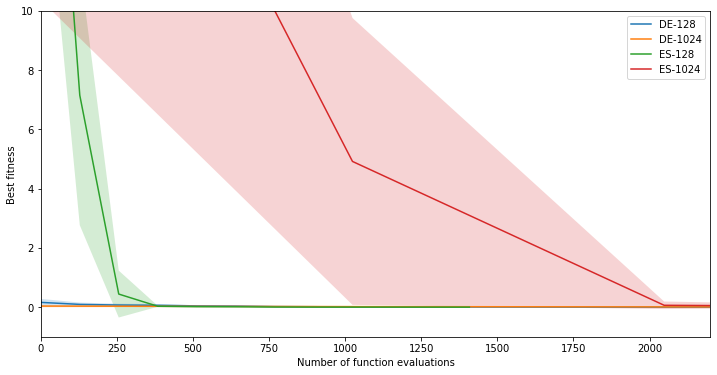

In [ ]:
error1_de_128, error2_de_128 = [], []
for i in range(len(plt_fitness_de_128)):
    error1_de_128.append(plt_fitness_de_128[i] + plt_std_de_128[i])
    error2_de_128.append(plt_fitness_de_128[i] - plt_std_de_128[i])

error1_de_1024, error2_de_1024 = [], []
for i in range(len(plt_fitness_de_1024)):
    error1_de_1024.append(plt_fitness_de_1024[i] + plt_std_de_1024[i])
    error2_de_1024.append(plt_fitness_de_1024[i] - plt_std_de_1024[i])

error1_es_128, error2_es_128 = [], []
for i in range(len(plt_fitness_es_128)):
    error1_es_128.append(plt_fitness_es_128[i] + plt_std_es_128[i])
    error2_es_128.append(plt_fitness_es_128[i] - plt_std_es_128[i])

error1_es_1024, error2_es_1024 = [], []
for i in range(len(plt_fitness_es_1024)):
    error1_es_1024.append(plt_fitness_es_1024[i] + plt_std_es_1024[i])
    error2_es_1024.append(plt_fitness_es_1024[i] - plt_std_es_1024[i])

plt.figure(figsize=(12, 6))
plt.xlim(left=0, right=2200)
plt.ylim(-1, 10)

# DE 128
plt.plot(plt_eval_de_128, plt_fitness_de_128, label='DE-128')
plt.fill_between(plt_eval_de_128, error1_de_128, error2_de_128, alpha=0.2)

# DE 1024
plt.plot(plt_eval_de_1024, plt_fitness_de_1024, label='DE-1024')
plt.fill_between(plt_eval_de_1024, error1_de_1024, error2_de_1024, alpha=0.2)

# ES 128
plt.plot(plt_eval_es_128, plt_fitness_es_128,label='ES-128')
plt.fill_between(plt_eval_es_128, error1_es_128, error2_es_128, alpha=0.2)

# ES 1024
plt.plot(plt_eval_es_1024, plt_fitness_es_1024, label='ES-1024')
plt.fill_between(plt_eval_es_1024, error1_es_1024, error2_es_1024, alpha=0.2)

plt.xlabel('Number of function evaluations')
plt.ylabel('Best fitness')
plt.legend()
plt.savefig('Sphere-2d.png')
plt.show()

### **dimensions (d=10)**

In [ ]:
# DE, popsize = 128
all_results = []

dimension = 10
max_evals = 1e6
fobj = Sphere_f
seed_number = 18520186
popsize = 128
lower_bound = -6
upper_bound = 6

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results)
    seed_number += 1

plt_fitness_de_128 = []
plt_std_de_128 = []
plt_eval_de_128 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_de_128.append(np.mean(fitness))
    plt_std_de_128.append(np.std(fitness))
    plt_eval_de_128.append(np.mean(eval))

In [ ]:
# DE, popsize = 1024
all_results = []

dimension = 10
max_evals = 1e6
fobj = Sphere_f
seed_number = 18520186
popsize = 1024
lower_bound = -6
upper_bound = 6

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results)
    seed_number += 1

plt_fitness_de_1024 = []
plt_std_de_1024 = []
plt_eval_de_1024 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_de_1024.append(np.mean(fitness))
    plt_std_de_1024.append(np.std(fitness))
    plt_eval_de_1024.append(np.mean(eval))

In [ ]:
# ES, popsize = 128
dimension = 10
obj = Sphere_f
max_evals = 1e6
seed_number = 18520186
lower_bound = -6
upper_bound = 6
popsize = 128
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results)
    seed_number += 1

plt_fitness_es_128 = []
plt_std_es_128 = []
plt_eval_es_128 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_es_128.append(np.mean(fitness))
    plt_std_es_128.append(np.std(fitness))
    plt_eval_es_128.append(np.mean(eval))

In [ ]:
# ES, popsize = 1024
dimension = 10
obj = Sphere_f
max_evals = 1e6
seed_number = 18520186
lower_bound = -6
upper_bound = 6
popsize = 1024
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results)
    seed_number += 1

plt_fitness_es_1024 = []
plt_std_es_1024 = []
plt_eval_es_1024 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_es_1024.append(np.mean(fitness))
    plt_std_es_1024.append(np.std(fitness))
    plt_eval_es_1024.append(np.mean(eval))

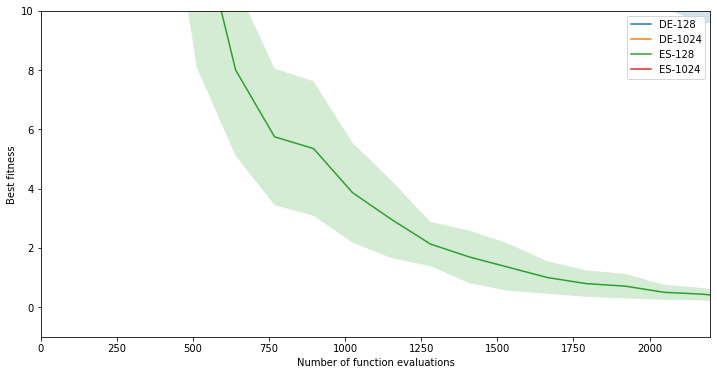

In [ ]:
error1_de_128, error2_de_128 = [], []
for i in range(len(plt_fitness_de_128)):
    error1_de_128.append(plt_fitness_de_128[i] + plt_std_de_128[i])
    error2_de_128.append(plt_fitness_de_128[i] - plt_std_de_128[i])

error1_de_1024, error2_de_1024 = [], []
for i in range(len(plt_fitness_de_1024)):
    error1_de_1024.append(plt_fitness_de_1024[i] + plt_std_de_1024[i])
    error2_de_1024.append(plt_fitness_de_1024[i] - plt_std_de_1024[i])

error1_es_128, error2_es_128 = [], []
for i in range(len(plt_fitness_es_128)):
    error1_es_128.append(plt_fitness_es_128[i] + plt_std_es_128[i])
    error2_es_128.append(plt_fitness_es_128[i] - plt_std_es_128[i])

error1_es_1024, error2_es_1024 = [], []
for i in range(len(plt_fitness_es_1024)):
    error1_es_1024.append(plt_fitness_es_1024[i] + plt_std_es_1024[i])
    error2_es_1024.append(plt_fitness_es_1024[i] - plt_std_es_1024[i])

plt.figure(figsize=(12, 6))
plt.xlim(left=0, right=2200)
plt.ylim(-1, 10)

# DE 128
plt.plot(plt_eval_de_128, plt_fitness_de_128, label='DE-128')
plt.fill_between(plt_eval_de_128, error1_de_128, error2_de_128, alpha=0.2)

# DE 1024
plt.plot(plt_eval_de_1024, plt_fitness_de_1024, label='DE-1024')
plt.fill_between(plt_eval_de_1024, error1_de_1024, error2_de_1024, alpha=0.2)

# ES 128
plt.plot(plt_eval_es_128, plt_fitness_es_128,label='ES-128')
plt.fill_between(plt_eval_es_128, error1_es_128, error2_es_128, alpha=0.2)

# ES 1024
plt.plot(plt_eval_es_1024, plt_fitness_es_1024, label='ES-1024')
plt.fill_between(plt_eval_es_1024, error1_es_1024, error2_es_1024, alpha=0.2)

plt.xlabel('Number of function evaluations')
plt.ylabel('Best fitness')
plt.legend()
plt.savefig('Sphere-10d.png')
plt.show()

## **Hàm Rastrigin**

### **dimensions (d=2)**

In [ ]:
# DE, popsize = 128
all_results = []

dimension = 2
max_evals = 1e5
fobj = Rastrigin_f
seed_number = 18520186
popsize = 128
lower_bound = -6
upper_bound = 6

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results)
    seed_number += 1

plt_fitness_de_128 = []
plt_std_de_128 = []
plt_eval_de_128 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_de_128.append(np.mean(fitness))
    plt_std_de_128.append(np.std(fitness))
    plt_eval_de_128.append(np.mean(eval))

In [ ]:
# DE, popsize = 1024
all_results = []

dimension = 2
max_evals = 1e5
fobj = Rastrigin_f
seed_number = 18520186
popsize = 1024
lower_bound = -6
upper_bound = 6

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results)
    seed_number += 1

plt_fitness_de_1024 = []
plt_std_de_1024 = []
plt_eval_de_1024 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_de_1024.append(np.mean(fitness))
    plt_std_de_1024.append(np.std(fitness))
    plt_eval_de_1024.append(np.mean(eval))

In [ ]:
# ES, popsize = 128
dimension = 2
obj = Rastrigin_f
max_evals = 1e5
seed_number = 18520186
lower_bound = -6
upper_bound = 6
popsize = 128
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results)
    seed_number += 1

plt_fitness_es_128 = []
plt_std_es_128 = []
plt_eval_es_128 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_es_128.append(np.mean(fitness))
    plt_std_es_128.append(np.std(fitness))
    plt_eval_es_128.append(np.mean(eval))

In [ ]:
# ES, popsize = 1024
dimension = 2
obj = Rastrigin_f
max_evals = 1e5
seed_number = 18520186
lower_bound = -6
upper_bound = 6
popsize = 1024
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results)
    seed_number += 1

plt_fitness_es_1024 = []
plt_std_es_1024 = []
plt_eval_es_1024 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_es_1024.append(np.mean(fitness))
    plt_std_es_1024.append(np.std(fitness))
    plt_eval_es_1024.append(np.mean(eval))

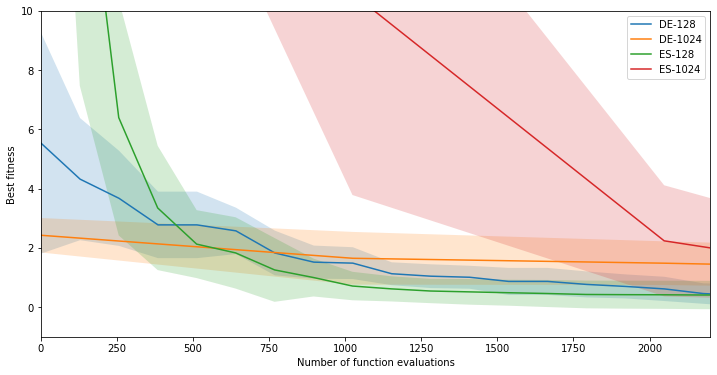

In [ ]:
error1_de_128, error2_de_128 = [], []
for i in range(len(plt_fitness_de_128)):
    error1_de_128.append(plt_fitness_de_128[i] + plt_std_de_128[i])
    error2_de_128.append(plt_fitness_de_128[i] - plt_std_de_128[i])

error1_de_1024, error2_de_1024 = [], []
for i in range(len(plt_fitness_de_1024)):
    error1_de_1024.append(plt_fitness_de_1024[i] + plt_std_de_1024[i])
    error2_de_1024.append(plt_fitness_de_1024[i] - plt_std_de_1024[i])

error1_es_128, error2_es_128 = [], []
for i in range(len(plt_fitness_es_128)):
    error1_es_128.append(plt_fitness_es_128[i] + plt_std_es_128[i])
    error2_es_128.append(plt_fitness_es_128[i] - plt_std_es_128[i])

error1_es_1024, error2_es_1024 = [], []
for i in range(len(plt_fitness_es_1024)):
    error1_es_1024.append(plt_fitness_es_1024[i] + plt_std_es_1024[i])
    error2_es_1024.append(plt_fitness_es_1024[i] - plt_std_es_1024[i])

plt.figure(figsize=(12, 6))
plt.xlim(left=0, right=2200)
plt.ylim(-1, 10)

# DE 128
plt.plot(plt_eval_de_128, plt_fitness_de_128, label='DE-128')
plt.fill_between(plt_eval_de_128, error1_de_128, error2_de_128, alpha=0.2)

# DE 1024
plt.plot(plt_eval_de_1024, plt_fitness_de_1024, label='DE-1024')
plt.fill_between(plt_eval_de_1024, error1_de_1024, error2_de_1024, alpha=0.2)

# ES 128
plt.plot(plt_eval_es_128, plt_fitness_es_128,label='ES-128')
plt.fill_between(plt_eval_es_128, error1_es_128, error2_es_128, alpha=0.2)

# ES 1024
plt.plot(plt_eval_es_1024, plt_fitness_es_1024, label='ES-1024')
plt.fill_between(plt_eval_es_1024, error1_es_1024, error2_es_1024, alpha=0.2)

plt.xlabel('Number of function evaluations')
plt.ylabel('Best fitness')
plt.legend()
plt.savefig('Rastrigin-2d.png')
plt.show()

### **dimensions (d=10)**

In [ ]:
# DE, popsize = 128
all_results = []

dimension = 10
max_evals = 1e6
fobj = Rastrigin_f
seed_number = 18520186
popsize = 128
lower_bound = -6
upper_bound = 6

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results)
    seed_number += 1

plt_fitness_de_128 = []
plt_std_de_128 = []
plt_eval_de_128 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_de_128.append(np.mean(fitness))
    plt_std_de_128.append(np.std(fitness))
    plt_eval_de_128.append(np.mean(eval))

In [ ]:
# DE, popsize = 1024
all_results = []

dimension = 10
max_evals = 1e6
fobj = Rastrigin_f
seed_number = 18520186
popsize = 1024
lower_bound = -6
upper_bound = 6

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results)
    seed_number += 1

plt_fitness_de_1024 = []
plt_std_de_1024 = []
plt_eval_de_1024 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_de_1024.append(np.mean(fitness))
    plt_std_de_1024.append(np.std(fitness))
    plt_eval_de_1024.append(np.mean(eval))

In [ ]:
# ES, popsize = 128
dimension = 10
obj = Rastrigin_f
max_evals = 1e6
seed_number = 18520186
lower_bound = -6
upper_bound = 6
popsize = 128
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results)
    seed_number += 1

plt_fitness_es_128 = []
plt_std_es_128 = []
plt_eval_es_128 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_es_128.append(np.mean(fitness))
    plt_std_es_128.append(np.std(fitness))
    plt_eval_es_128.append(np.mean(eval))

In [ ]:
# ES, popsize = 1024
dimension = 10
obj = Rastrigin_f
max_evals = 1e6
seed_number = 18520186
lower_bound = -6
upper_bound = 6
popsize = 1024
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results)
    seed_number += 1

plt_fitness_es_1024 = []
plt_std_es_1024 = []
plt_eval_es_1024 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_es_1024.append(np.mean(fitness))
    plt_std_es_1024.append(np.std(fitness))
    plt_eval_es_1024.append(np.mean(eval))

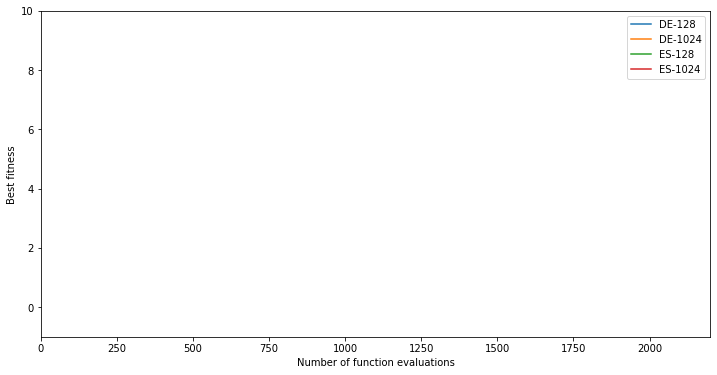

In [ ]:
error1_de_128, error2_de_128 = [], []
for i in range(len(plt_fitness_de_128)):
    error1_de_128.append(plt_fitness_de_128[i] + plt_std_de_128[i])
    error2_de_128.append(plt_fitness_de_128[i] - plt_std_de_128[i])

error1_de_1024, error2_de_1024 = [], []
for i in range(len(plt_fitness_de_1024)):
    error1_de_1024.append(plt_fitness_de_1024[i] + plt_std_de_1024[i])
    error2_de_1024.append(plt_fitness_de_1024[i] - plt_std_de_1024[i])

error1_es_128, error2_es_128 = [], []
for i in range(len(plt_fitness_es_128)):
    error1_es_128.append(plt_fitness_es_128[i] + plt_std_es_128[i])
    error2_es_128.append(plt_fitness_es_128[i] - plt_std_es_128[i])

error1_es_1024, error2_es_1024 = [], []
for i in range(len(plt_fitness_es_1024)):
    error1_es_1024.append(plt_fitness_es_1024[i] + plt_std_es_1024[i])
    error2_es_1024.append(plt_fitness_es_1024[i] - plt_std_es_1024[i])

plt.figure(figsize=(12, 6))
plt.xlim(left=0, right=2200)
plt.ylim(-1, 10)

# DE 128
plt.plot(plt_eval_de_128, plt_fitness_de_128, label='DE-128')
plt.fill_between(plt_eval_de_128, error1_de_128, error2_de_128, alpha=0.2)

# DE 1024
plt.plot(plt_eval_de_1024, plt_fitness_de_1024, label='DE-1024')
plt.fill_between(plt_eval_de_1024, error1_de_1024, error2_de_1024, alpha=0.2)

# ES 128
plt.plot(plt_eval_es_128, plt_fitness_es_128,label='ES-128')
plt.fill_between(plt_eval_es_128, error1_es_128, error2_es_128, alpha=0.2)

# ES 1024
plt.plot(plt_eval_es_1024, plt_fitness_es_1024, label='ES-1024')
plt.fill_between(plt_eval_es_1024, error1_es_1024, error2_es_1024, alpha=0.2)

plt.xlabel('Number of function evaluations')
plt.ylabel('Best fitness')
plt.legend()
plt.savefig('Rastrigin-10d.png')
plt.show()

## **Hàm Rosenbrock**

### **dimensions (d=2)**

In [ ]:
# DE, popsize = 128
all_results = []

dimension = 2
max_evals = 1e5
fobj = Rosenbrock_f
seed_number = 18520186
popsize = 128
lower_bound = -3
upper_bound = 3

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results)
    seed_number += 1

plt_fitness_de_128 = []
plt_std_de_128 = []
plt_eval_de_128 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_de_128.append(np.mean(fitness))
    plt_std_de_128.append(np.std(fitness))
    plt_eval_de_128.append(np.mean(eval))

In [ ]:
# DE, popsize = 1024
all_results = []

dimension = 2
max_evals = 1e5
fobj = Rosenbrock_f
seed_number = 18520186
popsize = 1024
lower_bound = -3
upper_bound = 3

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results)
    seed_number += 1

plt_fitness_de_128 = []
plt_std_de_128 = []
plt_eval_de_128 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_de_128.append(np.mean(fitness))
    plt_std_de_128.append(np.std(fitness))
    plt_eval_de_128.append(np.mean(eval))

In [ ]:
# ES, popsize = 128
dimension = 2
obj = Rosenbrock_f
max_evals = 1e5
seed_number = 18520186
lower_bound = -3
upper_bound = 3
popsize = 128
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results)
    seed_number += 1

plt_fitness_es_128 = []
plt_std_es_128 = []
plt_eval_es_128 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_es_128.append(np.mean(fitness))
    plt_std_es_128.append(np.std(fitness))
    plt_eval_es_128.append(np.mean(eval))

In [ ]:
# ES, popsize = 1024
dimension = 2
obj = Rosenbrock_f
max_evals = 1e5
seed_number = 18520186
lower_bound = -3
upper_bound = 3
popsize = 1024
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results)
    seed_number += 1

plt_fitness_es_1024 = []
plt_std_es_1024 = []
plt_eval_es_1024 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_es_1024.append(np.mean(fitness))
    plt_std_es_1024.append(np.std(fitness))
    plt_eval_es_1024.append(np.mean(eval))

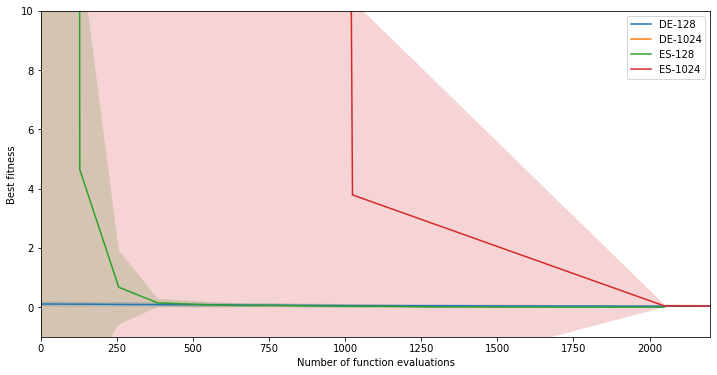

In [ ]:
error1_de_128, error2_de_128 = [], []
for i in range(len(plt_fitness_de_128)):
    error1_de_128.append(plt_fitness_de_128[i] + plt_std_de_128[i])
    error2_de_128.append(plt_fitness_de_128[i] - plt_std_de_128[i])

error1_de_1024, error2_de_1024 = [], []
for i in range(len(plt_fitness_de_1024)):
    error1_de_1024.append(plt_fitness_de_1024[i] + plt_std_de_1024[i])
    error2_de_1024.append(plt_fitness_de_1024[i] - plt_std_de_1024[i])

error1_es_128, error2_es_128 = [], []
for i in range(len(plt_fitness_es_128)):
    error1_es_128.append(plt_fitness_es_128[i] + plt_std_es_128[i])
    error2_es_128.append(plt_fitness_es_128[i] - plt_std_es_128[i])

error1_es_1024, error2_es_1024 = [], []
for i in range(len(plt_fitness_es_1024)):
    error1_es_1024.append(plt_fitness_es_1024[i] + plt_std_es_1024[i])
    error2_es_1024.append(plt_fitness_es_1024[i] - plt_std_es_1024[i])

plt.figure(figsize=(12, 6))
plt.xlim(left=0, right=2200)
plt.ylim(-1, 10)

# DE 128
plt.plot(plt_eval_de_128, plt_fitness_de_128, label='DE-128')
plt.fill_between(plt_eval_de_128, error1_de_128, error2_de_128, alpha=0.2)

# DE 1024
plt.plot(plt_eval_de_1024, plt_fitness_de_1024, label='DE-1024')
plt.fill_between(plt_eval_de_1024, error1_de_1024, error2_de_1024, alpha=0.2)

# ES 128
plt.plot(plt_eval_es_128, plt_fitness_es_128,label='ES-128')
plt.fill_between(plt_eval_es_128, error1_es_128, error2_es_128, alpha=0.2)

# ES 1024
plt.plot(plt_eval_es_1024, plt_fitness_es_1024, label='ES-1024')
plt.fill_between(plt_eval_es_1024, error1_es_1024, error2_es_1024, alpha=0.2)

plt.xlabel('Number of function evaluations')
plt.ylabel('Best fitness')
plt.legend()
plt.savefig('Rosenbrock-2d.png')
plt.show()

### **dimensions (d=10)**

In [ ]:
# DE, popsize = 128
all_results = []

dimension = 10
max_evals = 1e6
fobj = Rosenbrock_f
seed_number = 18520186
popsize = 128
lower_bound = -3
upper_bound = 3

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results)
    seed_number += 1

plt_fitness_de_128 = []
plt_std_de_128 = []
plt_eval_de_128 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_de_128.append(np.mean(fitness))
    plt_std_de_128.append(np.std(fitness))
    plt_eval_de_128.append(np.mean(eval))

In [ ]:
# DE, popsize = 1024
all_results = []

dimension = 10
max_evals = 1e6
fobj = Rosenbrock_f
seed_number = 18520186
popsize = 1024
lower_bound = -3
upper_bound = 3

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results)
    seed_number += 1

plt_fitness_de_128 = []
plt_std_de_128 = []
plt_eval_de_128 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_de_128.append(np.mean(fitness))
    plt_std_de_128.append(np.std(fitness))
    plt_eval_de_128.append(np.mean(eval))

In [ ]:
# ES, popsize = 128
dimension = 10
obj = Rosenbrock_f
max_evals = 1e6
seed_number = 18520186
lower_bound = -3
upper_bound = 3
popsize = 128
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results)
    seed_number += 1

plt_fitness_es_128 = []
plt_std_es_128 = []
plt_eval_es_128 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_es_128.append(np.mean(fitness))
    plt_std_es_128.append(np.std(fitness))
    plt_eval_es_128.append(np.mean(eval))

In [ ]:
# ES, popsize = 1024
dimension = 10
obj = Rosenbrock_f
max_evals = 1e6
seed_number = 18520186
lower_bound = -3
upper_bound = 3
popsize = 1024
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results)
    seed_number += 1

plt_fitness_es_1024 = []
plt_std_es_1024 = []
plt_eval_es_1024 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_es_1024.append(np.mean(fitness))
    plt_std_es_1024.append(np.std(fitness))
    plt_eval_es_1024.append(np.mean(eval))

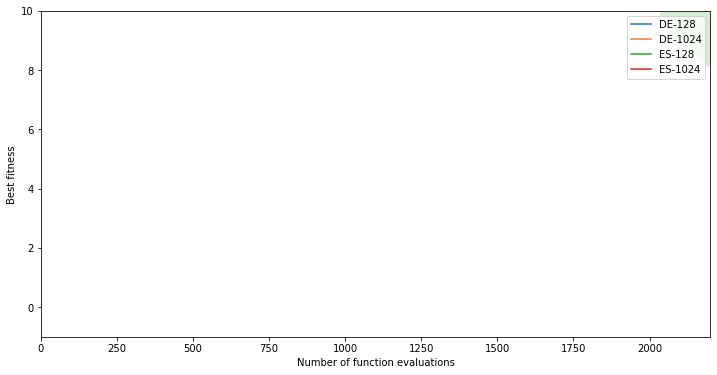

In [ ]:
error1_de_128, error2_de_128 = [], []
for i in range(len(plt_fitness_de_128)):
    error1_de_128.append(plt_fitness_de_128[i] + plt_std_de_128[i])
    error2_de_128.append(plt_fitness_de_128[i] - plt_std_de_128[i])

error1_de_1024, error2_de_1024 = [], []
for i in range(len(plt_fitness_de_1024)):
    error1_de_1024.append(plt_fitness_de_1024[i] + plt_std_de_1024[i])
    error2_de_1024.append(plt_fitness_de_1024[i] - plt_std_de_1024[i])

error1_es_128, error2_es_128 = [], []
for i in range(len(plt_fitness_es_128)):
    error1_es_128.append(plt_fitness_es_128[i] + plt_std_es_128[i])
    error2_es_128.append(plt_fitness_es_128[i] - plt_std_es_128[i])

error1_es_1024, error2_es_1024 = [], []
for i in range(len(plt_fitness_es_1024)):
    error1_es_1024.append(plt_fitness_es_1024[i] + plt_std_es_1024[i])
    error2_es_1024.append(plt_fitness_es_1024[i] - plt_std_es_1024[i])

plt.figure(figsize=(12, 6))
plt.xlim(left=0, right=2200)
plt.ylim(-1, 10)

# DE 128
plt.plot(plt_eval_de_128, plt_fitness_de_128, label='DE-128')
plt.fill_between(plt_eval_de_128, error1_de_128, error2_de_128, alpha=0.2)

# DE 1024
plt.plot(plt_eval_de_1024, plt_fitness_de_1024, label='DE-1024')
plt.fill_between(plt_eval_de_1024, error1_de_1024, error2_de_1024, alpha=0.2)

# ES 128
plt.plot(plt_eval_es_128, plt_fitness_es_128,label='ES-128')
plt.fill_between(plt_eval_es_128, error1_es_128, error2_es_128, alpha=0.2)

# ES 1024
plt.plot(plt_eval_es_1024, plt_fitness_es_1024, label='ES-1024')
plt.fill_between(plt_eval_es_1024, error1_es_1024, error2_es_1024, alpha=0.2)

plt.xlabel('Number of function evaluations')
plt.ylabel('Best fitness')
plt.legend()
plt.savefig('Rosenbrock-10d.png')
plt.show()

## **Hàm Griewank**

### **dimensions (d=2)**

In [ ]:
# DE, popsize = 128
all_results = []

dimension = 2
max_evals = 1e5
fobj = Griewank_f
seed_number = 18520186
popsize = 128
lower_bound = -600
upper_bound = 600

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results)
    seed_number += 1

plt_fitness_de_128 = []
plt_std_de_128 = []
plt_eval_de_128 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_de_128.append(np.mean(fitness))
    plt_std_de_128.append(np.std(fitness))
    plt_eval_de_128.append(np.mean(eval))

In [ ]:
# DE, popsize = 1024
all_results = []

dimension = 2
max_evals = 1e5
fobj_number = 18520186
popsize = 1024
lower_bound = -600
upper_bound = 600

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results)
    seed_number += 1

plt_fitness_de_128 = []
plt_std_de_128 = []
plt_eval_de_128 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_de_128.append(np.mean(fitness))
    plt_std_de_128.append(np.std(fitness))
    plt_eval_de_128.append(np.mean(eval))

In [ ]:
# ES, popsize = 128
dimension = 2
obj = Griewank_f
max_evals = 1e5
seed_number = 18520186
lower_bound = -600
upper_bound = 600
popsize = 128
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results)
    seed_number += 1

plt_fitness_es_128 = []
plt_std_es_128 = []
plt_eval_es_128 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_es_128.append(np.mean(fitness))
    plt_std_es_128.append(np.std(fitness))
    plt_eval_es_128.append(np.mean(eval))

In [ ]:
# ES, popsize = 1024
dimension = 2
obj = Griewank_f
max_evals = 1e5
seed_number = 18520186
lower_bound = -600
upper_bound = 600
popsize = 1024
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results)
    seed_number += 1

plt_fitness_es_1024 = []
plt_std_es_1024 = []
plt_eval_es_1024 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_es_1024.append(np.mean(fitness))
    plt_std_es_1024.append(np.std(fitness))
    plt_eval_es_1024.append(np.mean(eval))

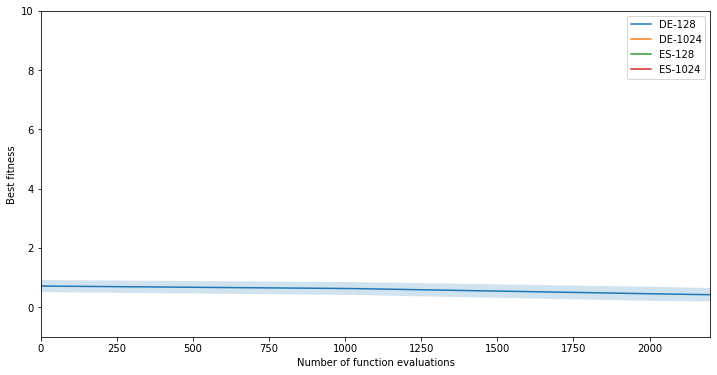

In [ ]:
error1_de_128, error2_de_128 = [], []
for i in range(len(plt_fitness_de_128)):
    error1_de_128.append(plt_fitness_de_128[i] + plt_std_de_128[i])
    error2_de_128.append(plt_fitness_de_128[i] - plt_std_de_128[i])

error1_de_1024, error2_de_1024 = [], []
for i in range(len(plt_fitness_de_1024)):
    error1_de_1024.append(plt_fitness_de_1024[i] + plt_std_de_1024[i])
    error2_de_1024.append(plt_fitness_de_1024[i] - plt_std_de_1024[i])

error1_es_128, error2_es_128 = [], []
for i in range(len(plt_fitness_es_128)):
    error1_es_128.append(plt_fitness_es_128[i] + plt_std_es_128[i])
    error2_es_128.append(plt_fitness_es_128[i] - plt_std_es_128[i])

error1_es_1024, error2_es_1024 = [], []
for i in range(len(plt_fitness_es_1024)):
    error1_es_1024.append(plt_fitness_es_1024[i] + plt_std_es_1024[i])
    error2_es_1024.append(plt_fitness_es_1024[i] - plt_std_es_1024[i])

plt.figure(figsize=(12, 6))
plt.xlim(left=0, right=2200)
plt.ylim(-1, 10)

# DE 128
plt.plot(plt_eval_de_128, plt_fitness_de_128, label='DE-128')
plt.fill_between(plt_eval_de_128, error1_de_128, error2_de_128, alpha=0.2)

# DE 1024
plt.plot(plt_eval_de_1024, plt_fitness_de_1024, label='DE-1024')
plt.fill_between(plt_eval_de_1024, error1_de_1024, error2_de_1024, alpha=0.2)

# ES 128
plt.plot(plt_eval_es_128, plt_fitness_es_128,label='ES-128')
plt.fill_between(plt_eval_es_128, error1_es_128, error2_es_128, alpha=0.2)

# ES 1024
plt.plot(plt_eval_es_1024, plt_fitness_es_1024, label='ES-1024')
plt.fill_between(plt_eval_es_1024, error1_es_1024, error2_es_1024, alpha=0.2)

plt.xlabel('Number of function evaluations')
plt.ylabel('Best fitness')
plt.legend()
plt.savefig('Griewank-2d.png')
plt.show()

### **dimensions (d=10)**

In [ ]:
# DE, popsize = 128
all_results = []

dimension = 10
max_evals = 1e6
fobj = Griewank_f
seed_number = 18520186
popsize = 128
lower_bound = -600
upper_bound = 600

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results)
    seed_number += 1

plt_fitness_de_128 = []
plt_std_de_128 = []
plt_eval_de_128 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_de_128.append(np.mean(fitness))
    plt_std_de_128.append(np.std(fitness))
    plt_eval_de_128.append(np.mean(eval))

In [ ]:
# DE, popsize = 1024
all_results = []

dimension = 10
max_evals = 1e6
fobj = Griewank_f
seed_number = 18520186
popsize = 1024
lower_bound = -600
upper_bound = 600

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results)
    seed_number += 1

plt_fitness_de_128 = []
plt_std_de_128 = []
plt_eval_de_128 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_de_128.append(np.mean(fitness))
    plt_std_de_128.append(np.std(fitness))
    plt_eval_de_128.append(np.mean(eval))

In [ ]:
# ES, popsize = 128
dimension = 10
obj = Griewank_f
max_evals = 1e6
seed_number = 18520186
lower_bound = -600
upper_bound = 600
popsize = 128
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results)
    seed_number += 1

plt_fitness_es_128 = []
plt_std_es_128 = []
plt_eval_es_128 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_es_128.append(np.mean(fitness))
    plt_std_es_128.append(np.std(fitness))
    plt_eval_es_128.append(np.mean(eval))

In [ ]:
# ES, popsize = 1024
dimension = 10
obj = Griewank_f
max_evals = 1e6
seed_number = 18520186
lower_bound = -600
upper_bound = 600
popsize = 1024
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results)
    seed_number += 1

plt_fitness_es_1024 = []
plt_std_es_1024 = []
plt_eval_es_1024 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_es_1024.append(np.mean(fitness))
    plt_std_es_1024.append(np.std(fitness))
    plt_eval_es_1024.append(np.mean(eval))

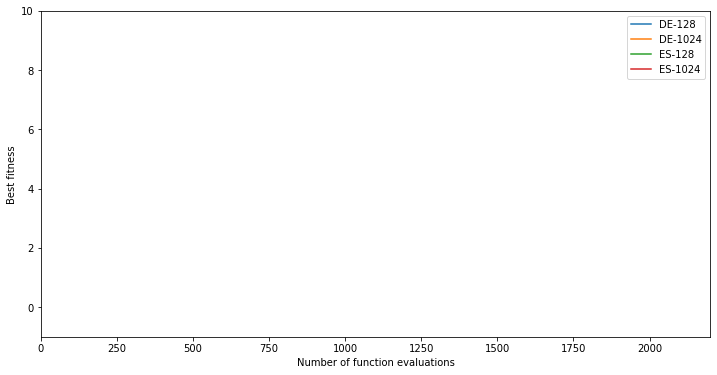

In [ ]:
error1_de_128, error2_de_128 = [], []
for i in range(len(plt_fitness_de_128)):
    error1_de_128.append(plt_fitness_de_128[i] + plt_std_de_128[i])
    error2_de_128.append(plt_fitness_de_128[i] - plt_std_de_128[i])

error1_de_1024, error2_de_1024 = [], []
for i in range(len(plt_fitness_de_1024)):
    error1_de_1024.append(plt_fitness_de_1024[i] + plt_std_de_1024[i])
    error2_de_1024.append(plt_fitness_de_1024[i] - plt_std_de_1024[i])

error1_es_128, error2_es_128 = [], []
for i in range(len(plt_fitness_es_128)):
    error1_es_128.append(plt_fitness_es_128[i] + plt_std_es_128[i])
    error2_es_128.append(plt_fitness_es_128[i] - plt_std_es_128[i])

error1_es_1024, error2_es_1024 = [], []
for i in range(len(plt_fitness_es_1024)):
    error1_es_1024.append(plt_fitness_es_1024[i] + plt_std_es_1024[i])
    error2_es_1024.append(plt_fitness_es_1024[i] - plt_std_es_1024[i])

plt.figure(figsize=(12, 6))
plt.xlim(left=0, right=2200)
plt.ylim(-1, 10)

# DE 128
plt.plot(plt_eval_de_128, plt_fitness_de_128, label='DE-128')
plt.fill_between(plt_eval_de_128, error1_de_128, error2_de_128, alpha=0.2)

# DE 1024
plt.plot(plt_eval_de_1024, plt_fitness_de_1024, label='DE-1024')
plt.fill_between(plt_eval_de_1024, error1_de_1024, error2_de_1024, alpha=0.2)

# ES 128
plt.plot(plt_eval_es_128, plt_fitness_es_128,label='ES-128')
plt.fill_between(plt_eval_es_128, error1_es_128, error2_es_128, alpha=0.2)

# ES 1024
plt.plot(plt_eval_es_1024, plt_fitness_es_1024, label='ES-1024')
plt.fill_between(plt_eval_es_1024, error1_es_1024, error2_es_1024, alpha=0.2)

plt.xlabel('Number of function evaluations')
plt.ylabel('Best fitness')
plt.legend()
plt.savefig('Griewank-10d.png')
plt.show()

## **Hàm Ackley**

### **dimensions (d=2)**

In [ ]:
# DE, popsize = 128
all_results = []

dimension = 2
max_evals = 1e5
fobj = Ackley_f
seed_number = 18520186
popsize = 128
lower_bound = -33
upper_bound = 433

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results)
    seed_number += 1

plt_fitness_de_128 = []
plt_std_de_128 = []
plt_eval_de_128 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_de_128.append(np.mean(fitness))
    plt_std_de_128.append(np.std(fitness))
    plt_eval_de_128.append(np.mean(eval))

In [ ]:
# DE, popsize = 1024
all_results = []

dimension = 2
max_evals = 1e5
fobj = Ackley_f
seed_number = 18520186
popsize = 1024
lower_bound = -33
upper_bound = 433

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results)
    seed_number += 1

plt_fitness_de_128 = []
plt_std_de_128 = []
plt_eval_de_128 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_de_128.append(np.mean(fitness))
    plt_std_de_128.append(np.std(fitness))
    plt_eval_de_128.append(np.mean(eval))

In [ ]:
# ES, popsize = 128
dimension = 2
obj = Ackley_f
max_evals = 1e5
seed_number = 18520186
lower_bound = -33
upper_bound = 433
popsize = 128
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results)
    seed_number += 1

plt_fitness_es_128 = []
plt_std_es_128 = []
plt_eval_es_128 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_es_128.append(np.mean(fitness))
    plt_std_es_128.append(np.std(fitness))
    plt_eval_es_128.append(np.mean(eval))

In [ ]:
# ES, popsize = 128
dimension = 2
obj = Ackley_f
max_evals = 1e5
seed_number = 18520186
lower_bound = -33
upper_bound = 433
popsize = 1024
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results)
    seed_number += 1

plt_fitness_es_1024 = []
plt_std_es_1024 = []
plt_eval_es_1024 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_es_1024.append(np.mean(fitness))
    plt_std_es_1024.append(np.std(fitness))
    plt_eval_es_1024.append(np.mean(eval))

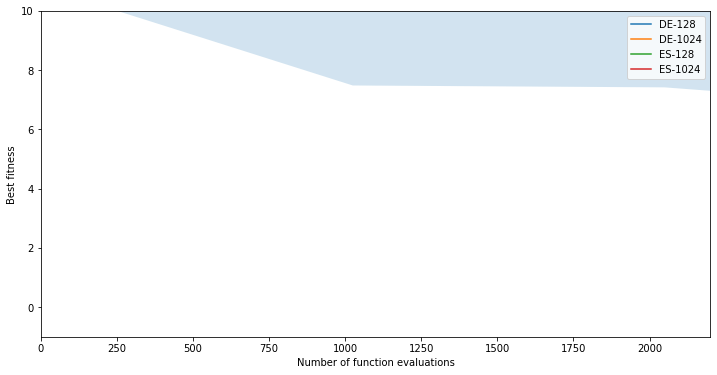

In [ ]:
error1_de_128, error2_de_128 = [], []
for i in range(len(plt_fitness_de_128)):
    error1_de_128.append(plt_fitness_de_128[i] + plt_std_de_128[i])
    error2_de_128.append(plt_fitness_de_128[i] - plt_std_de_128[i])

error1_de_1024, error2_de_1024 = [], []
for i in range(len(plt_fitness_de_1024)):
    error1_de_1024.append(plt_fitness_de_1024[i] + plt_std_de_1024[i])
    error2_de_1024.append(plt_fitness_de_1024[i] - plt_std_de_1024[i])

error1_es_128, error2_es_128 = [], []
for i in range(len(plt_fitness_es_128)):
    error1_es_128.append(plt_fitness_es_128[i] + plt_std_es_128[i])
    error2_es_128.append(plt_fitness_es_128[i] - plt_std_es_128[i])

error1_es_1024, error2_es_1024 = [], []
for i in range(len(plt_fitness_es_1024)):
    error1_es_1024.append(plt_fitness_es_1024[i] + plt_std_es_1024[i])
    error2_es_1024.append(plt_fitness_es_1024[i] - plt_std_es_1024[i])

plt.figure(figsize=(12, 6))
plt.xlim(left=0, right=2200)
plt.ylim(-1, 10)

# DE 128
plt.plot(plt_eval_de_128, plt_fitness_de_128, label='DE-128')
plt.fill_between(plt_eval_de_128, error1_de_128, error2_de_128, alpha=0.2)

# DE 1024
plt.plot(plt_eval_de_1024, plt_fitness_de_1024, label='DE-1024')
plt.fill_between(plt_eval_de_1024, error1_de_1024, error2_de_1024, alpha=0.2)

# ES 128
plt.plot(plt_eval_es_128, plt_fitness_es_128,label='ES-128')
plt.fill_between(plt_eval_es_128, error1_es_128, error2_es_128, alpha=0.2)

# ES 1024
plt.plot(plt_eval_es_1024, plt_fitness_es_1024, label='ES-1024')
plt.fill_between(plt_eval_es_1024, error1_es_1024, error2_es_1024, alpha=0.2)

plt.xlabel('Number of function evaluations')
plt.ylabel('Best fitness')
plt.legend()
plt.savefig('Ackley-2d.png')
plt.show()

### **dimensions (d=10)**

In [ ]:
# DE, popsize = 128
all_results = []

dimension = 10
max_evals = 1e6
fobj = Ackley_f
seed_number = 18520186
popsize = 128
lower_bound = -33
upper_bound = 433

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results)
    seed_number += 1

plt_fitness_de_128 = []
plt_std_de_128 = []
plt_eval_de_128 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_de_128.append(np.mean(fitness))
    plt_std_de_128.append(np.std(fitness))
    plt_eval_de_128.append(np.mean(eval))

In [ ]:
# DE, popsize = 1024
all_results = []

dimension = 10
max_evals = 1e6
fobj = Ackley_f
seed_number = 18520186
popsize = 1024
lower_bound = -33
upper_bound = 433

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(fobj, dimension, [(lower_bound, upper_bound)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results)
    seed_number += 1

plt_fitness_de_128 = []
plt_std_de_128 = []
plt_eval_de_128 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_de_128.append(np.mean(fitness))
    plt_std_de_128.append(np.std(fitness))
    plt_eval_de_128.append(np.mean(eval))

In [ ]:
# ES, popsize = 128
dimension = 10
obj = Ackley_f
max_evals = 1e6
seed_number = 18520186
lower_bound = -33
upper_bound = 433
popsize = 128
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results)
    seed_number += 1

plt_fitness_es_128 = []
plt_std_es_128 = []
plt_eval_es_128 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_es_128.append(np.mean(fitness))
    plt_std_es_128.append(np.std(fitness))
    plt_eval_es_128.append(np.mean(eval))

In [ ]:
# ES, popsize = 1024
dimension = 10
obj = Ackley_f
max_evals = 1e6
seed_number = 18520186
lower_bound = -33
upper_bound = 433
popsize = 1024
bounds = [(lower_bound, upper_bound)]*dimension
np.random.rand(seed_number)
all_results = []

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = ES(fobj, bounds, sigma_init, c_inc, c_dec, popsize, max_evals, dimension)
    all_results.append(results)
    seed_number += 1

plt_fitness_es_1024 = []
plt_std_es_1024 = []
plt_eval_es_1024 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_es_1024.append(np.mean(fitness))
    plt_std_es_1024.append(np.std(fitness))
    plt_eval_es_1024.append(np.mean(eval))

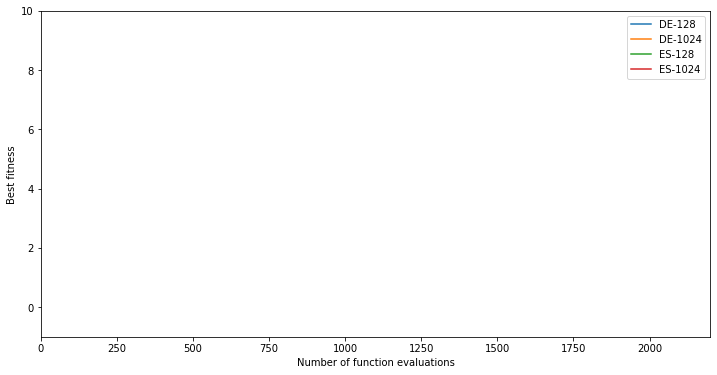

In [ ]:
error1_de_128, error2_de_128 = [], []
for i in range(len(plt_fitness_de_128)):
    error1_de_128.append(plt_fitness_de_128[i] + plt_std_de_128[i])
    error2_de_128.append(plt_fitness_de_128[i] - plt_std_de_128[i])

error1_de_1024, error2_de_1024 = [], []
for i in range(len(plt_fitness_de_1024)):
    error1_de_1024.append(plt_fitness_de_1024[i] + plt_std_de_1024[i])
    error2_de_1024.append(plt_fitness_de_1024[i] - plt_std_de_1024[i])

error1_es_128, error2_es_128 = [], []
for i in range(len(plt_fitness_es_128)):
    error1_es_128.append(plt_fitness_es_128[i] + plt_std_es_128[i])
    error2_es_128.append(plt_fitness_es_128[i] - plt_std_es_128[i])

error1_es_1024, error2_es_1024 = [], []
for i in range(len(plt_fitness_es_1024)):
    error1_es_1024.append(plt_fitness_es_1024[i] + plt_std_es_1024[i])
    error2_es_1024.append(plt_fitness_es_1024[i] - plt_std_es_1024[i])

plt.figure(figsize=(12, 6))
plt.xlim(left=0, right=2200)
plt.ylim(-1, 10)

# DE 128
plt.plot(plt_eval_de_128, plt_fitness_de_128, label='DE-128')
plt.fill_between(plt_eval_de_128, error1_de_128, error2_de_128, alpha=0.2)

# DE 1024
plt.plot(plt_eval_de_1024, plt_fitness_de_1024, label='DE-1024')
plt.fill_between(plt_eval_de_1024, error1_de_1024, error2_de_1024, alpha=0.2)

# ES 128
plt.plot(plt_eval_es_128, plt_fitness_es_128,label='ES-128')
plt.fill_between(plt_eval_es_128, error1_es_128, error2_es_128, alpha=0.2)

# ES 1024
plt.plot(plt_eval_es_1024, plt_fitness_es_1024, label='ES-1024')
plt.fill_between(plt_eval_es_1024, error1_es_1024, error2_es_1024, alpha=0.2)

plt.xlabel('Number of function evaluations')
plt.ylabel('Best fitness')
plt.legend()
plt.savefig('Ackley-10d.png')
plt.show()